# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

# Investigate Same Text
Adel Abu Hashim

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 

> The dataset with comments data with some text processing.

In [1]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import ast
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Leap\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
os.chdir("../Data")

In [3]:
# load commnets data with text processing
df_comments = pd.read_csv('comments_text.csv')

In [4]:
df_comments.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6,#scarlettjohansson #alexandradaddario #emiliac...,"{'nicolekidman', 'kimkardashian', 'johansson',..."
1,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6,very beautiful i love you very much,"{'much', 'love', 'beautiful'}"
2,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7,bombón bello,"{'bello', 'bombón'}"
3,stunning,2020-06-23 07:34:23,17859220648997344,0.0,0.0,2337634847974873088,n,4166540200,dexterisgod,False,https://www.instagram.com/dexterisgod,2020,Jun,23,2020-06-23,7,stunning,{'stunning'}
4,why are you so sweet?,2020-06-23 07:44:30,17889444721569168,0.0,0.0,2337634847974873088,n,8732111508,samuel_co_fer,False,https://www.instagram.com/samuel_co_fer,2020,Jun,23,2020-06-23,7,why are you so sweet?,{'sweet'}


<a id='top'></a>
## Top repeated text





#justiceforjohnnydepp or #amberheardisaliar #amberheardisanbuser, i am

In [5]:
get_top(df_comments, 'tokens', 50, 'token_of_repeated_text', 'n_coments')

,token_of_repeated_text,n_coments
0,set(),124292
1,{'beautiful'},19653
2,{'love'},8451
3,{'nice'},6130
4,{'justiceforjohnnydepp'},5663
5,{'wow'},5466
6,{'gorgeous'},5410
7,{'linda'},3603
8,{'sexy'},3559
9,{'hermosa'},3223


In [6]:
get_top(df_comments, 'tokens', 100, 'token_of_repeated_text', 'n_coments')[49:]

,token_of_repeated_text,n_coments
49,{'restorethesnyderverse'},880
50,{'great'},871
51,{'5'},828
52,"{'nedir', 'fiyat'}",824
53,{'lol'},819
54,{'amo'},812
55,{'movie'},798
56,{'blue'},768
57,"{'amber', 'heard'}",751
58,{'right'},749


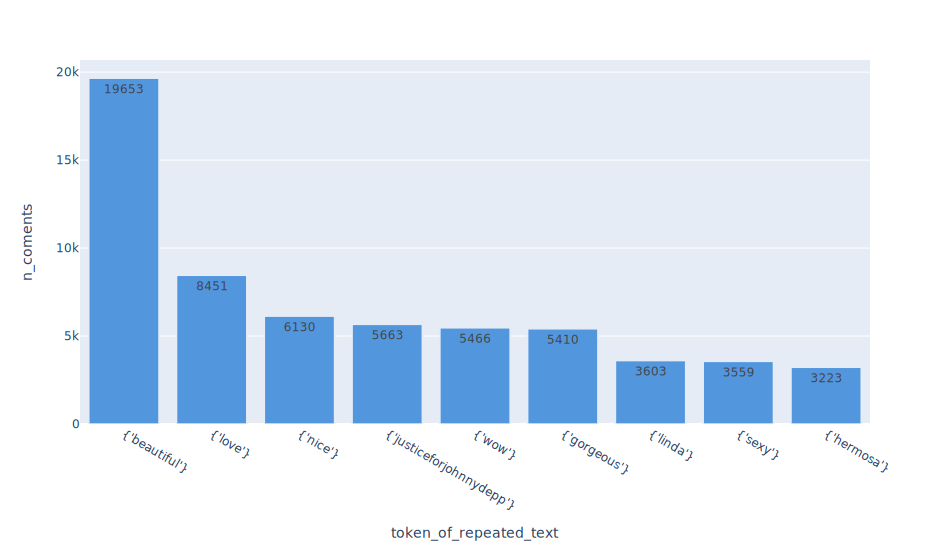

In [7]:
bar(get_top(df_comments, 'tokens', 10, 'token_of_repeated_text', 'n_coments')[1:], 'token_of_repeated_text', 'n_coments', 'a')

<a id='justiceforjohnnydepp'></a>
### justiceforjohnnydepp
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisabuser">amberheardisabuser</a></li>
<li><a href="#bitch">bitch</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>


In [8]:
jd = SameText(df_comments, "{'justiceforjohnnydepp'}")

In [9]:
jd.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
31,#justiceforjohnnydepp,2020-11-06 17:36:10,17843651768465828,0.0,1.0,2436331638714282496,n,7365315835,machelyyyyy,False,https://www.instagram.com/machelyyyyy,2020,Nov,6,2020-11-06,17,#justiceforjohnnydepp,{'justiceforjohnnydepp'}
352,#justiceforjohnnydepp,2020-12-22 09:48:06,17975070697341218,1.0,2.0,2469408055960567296,n,6225572213,thejohnny_deppfan,False,https://www.instagram.com/thejohnny_deppfan,2020,Dec,22,2020-12-22,9,#justiceforjohnnydepp,{'justiceforjohnnydepp'}


In [10]:
jd.n_commnets_unique()

This comment appeared in 429 shape


In [11]:
jd.shapes(15)

#justiceforjohnnydepp                          4862
#justiceforjohnnydepp ❤️                         75
#justiceforjohnnydepp❤                           34
#justiceforjohnnydepp ❤️❤️                       24
#justiceforjohnnydepp 🙌                          20
#justiceforjohnnydepp #justiceforjohnnydepp      15
#justiceforjohnnydepp💖                           14
@mik.plewa #justiceforjohnnydepp                 13
justiceforjohnnydepp                             11
#justiceforjohnnydepp 😢                           9
#justiceforjohnnydepp ✊                           8
#justiceforjohnnydepp ❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️        8
#justiceforjohnnydepp ♥️                          8
#justiceforjohnnydepp ❤️❤️❤️                      8
🤮 #justiceforjohnnydepp                           7
Name: message, dtype: int64

In [12]:
jd.dates()

2020-11-07    347
2020-11-13    243
2020-11-08    170
2020-12-18    169
2020-11-09    158
             ... 
2020-09-23      1
2020-05-05      1
2020-03-30      1
2021-06-19      1
2021-08-18      1
Name: date, Length: 489, dtype: int64

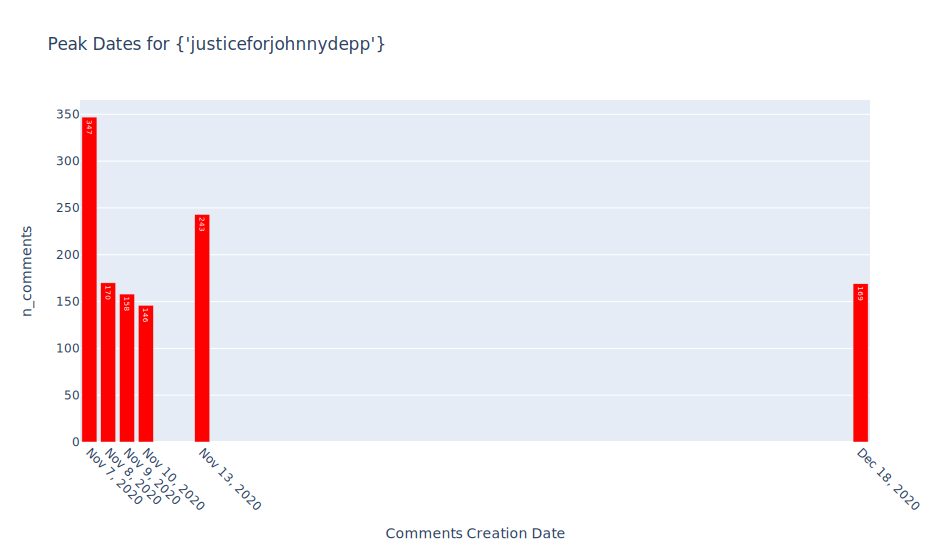

In [13]:
jd.peak(6)

The commentes were made between 2018-08-03 and  2021-08-19
      n_comments
year            
2018           2
2019           7
2020        4219
2021        1435


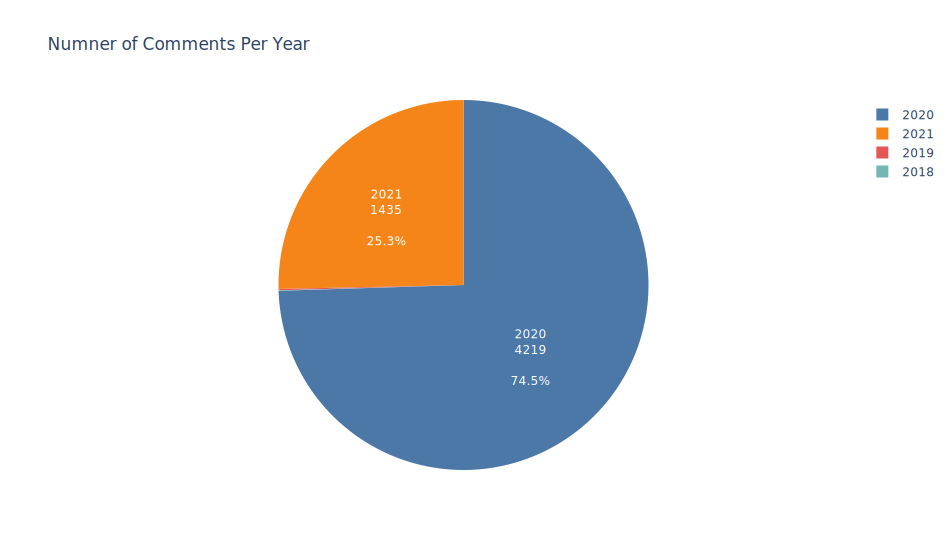

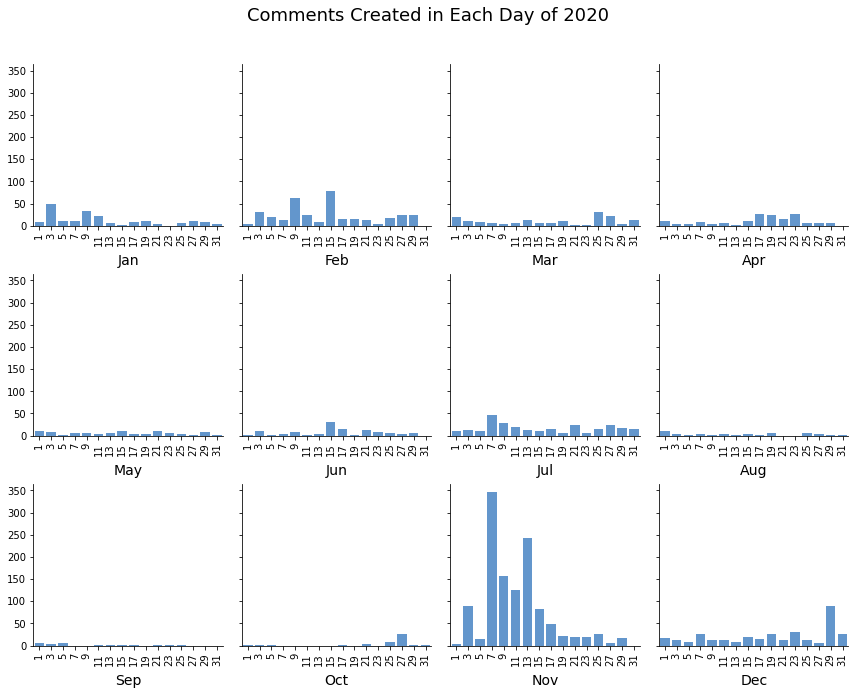

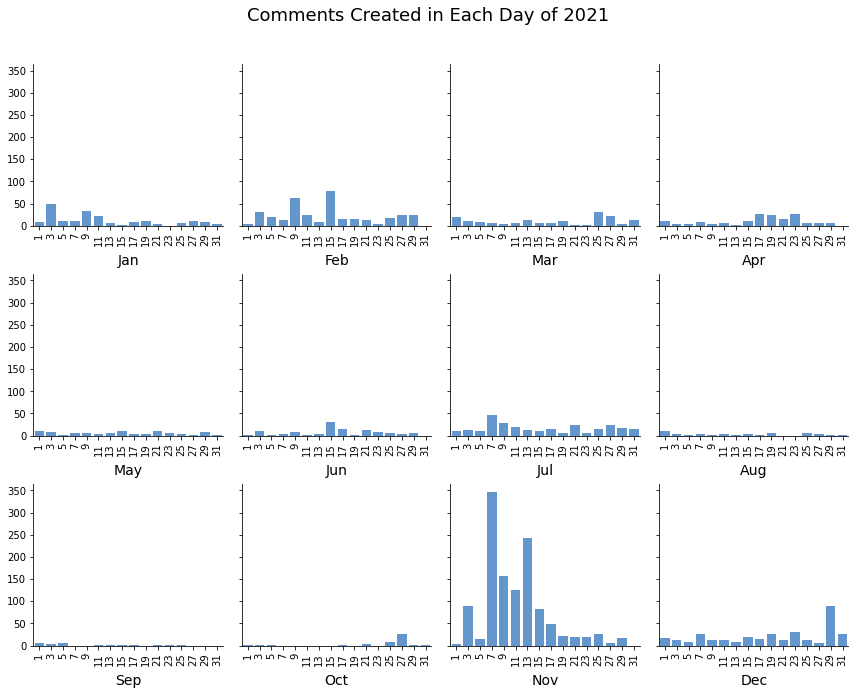

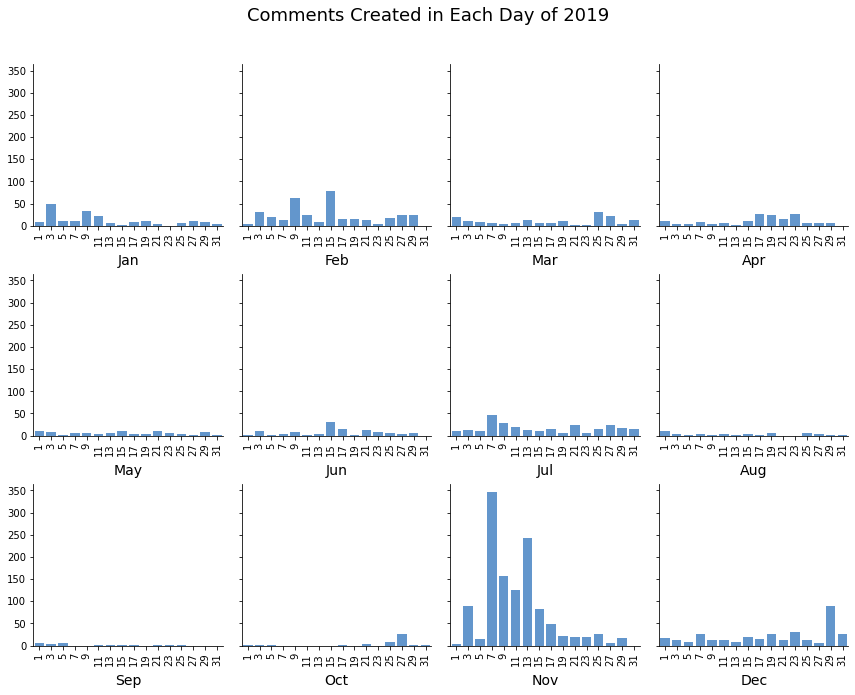

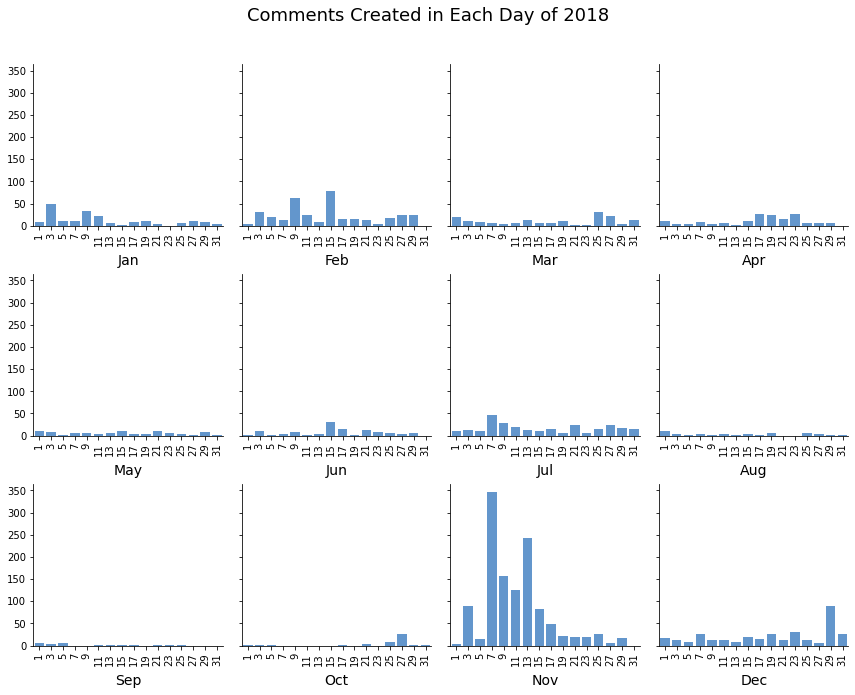

In [14]:
jd.date_info()

In [15]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
1191800,#justiceforjohnnydepp,2020-02-02 10:56:06,18127433167005480,0.0,0.0,2234618545040374528,n,4738883229,stellaefrancesca,False,...,Feb,2,2020-02-02,10,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:15,0.0,0.0,0.0
825184,#justiceforjohnnydepp,2020-02-02 18:29:03,17849590861870334,0.0,1.0,2235065878609621760,n,29125063230,smultronstallete,False,...,Feb,2,2020-02-02,18,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:08,0.0,0.0,0.0
825186,#justiceforjohnnydepp,2020-02-02 18:29:42,17891896801459536,0.0,1.0,2235065878609621760,n,29125063230,smultronstallete,False,...,Feb,2,2020-02-02,18,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:39,0.0,0.0,0.0
825206,#justiceforjohnnydepp,2020-02-02 21:05:43,17863123885660452,0.0,1.0,2235065878609621760,n,28267646684,octavia.area,False,...,Feb,2,2020-02-02,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:08,0.0,0.0,0.0
825207,#justiceforjohnnydepp 😢,2020-02-02 21:05:50,17870250130588944,0.0,1.0,2235065878609621760,n,28267646684,octavia.area,False,...,Feb,2,2020-02-02,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23143,#justiceforjohnnydepp,2021-07-05 20:52:44,17889843887320072,0.0,0.0,2607530456751659008,n,13267277793,just_jameilia,False,...,Jul,5,2021-07-05,20,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:21,0.0,0.0,0.0
279599,#justiceforjohnnydepp,2021-07-05 21:54:02,17967100564402456,0.0,1.0,2611245089148393472,n,3558856714,yecajess,False,...,Jul,5,2021-07-05,21,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:22,0.0,0.0,0.0
1232631,#justiceforjohnnydepp,2021-07-06 02:13:57,17916860146734348,0.0,0.0,2548520577264516608,n,11318725283,lilsands666,False,...,Jul,6,2021-07-06,2,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:17,0.0,0.0,0.0
439054,#justiceforjohnnydepp,2021-07-21 09:11:23,17913863992882964,0.0,1.0,2616101915660791808,n,38788829363,farhan.chow.98,False,...,Jul,21,2021-07-21,9,#justiceforjohnnydepp,{'justiceforjohnnydepp'},0 days 00:00:18,0.0,0.0,0.0


In [16]:
len(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

545

In [17]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

ownage130                   64
mathxy._01                  33
justicie.for.johnny.depp    30
netos.k                     30
becauseitsjohnnydepp        20
                            ..
briisa_0507                  1
aylar._.farhadi              1
talia.nehemia                1
iamflo01                     1
leorot7                      1
Name: username, Length: 545, dtype: int64

In [18]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-07    143
2020-11-13     81
2020-12-18     77
2021-02-15     65
2020-11-06     61
             ... 
2021-04-18      1
2021-07-01      1
2020-07-09      1
2021-06-03      1
2020-07-21      1
Name: date, Length: 168, dtype: int64

In [19]:
list(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['ownage130',
 'mathxy._01',
 'justicie.for.johnny.depp',
 'netos.k',
 'becauseitsjohnnydepp',
 'alexandr_while',
 'azulj.nolasco',
 'litsmryml',
 'cconnny',
 'olvorka',
 'johnnydepptime',
 'you.rine',
 'oh.no.c4rl',
 'ballikaya_defne_7',
 'johnny_depp_073',
 'johnnydepp._.fp',
 'bruises.0945',
 'camiferreira96',
 'violetgbb',
 'jdjazmin12',
 'machelyyyyy',
 'nadia_2030',
 'hani._cockatiel',
 'p.rctr',
 'yahaliza_2005',
 'mackenzilaplante',
 'johnny_1883_gg',
 'johnyiidep_fan',
 'felizxever',
 'karoline_cristina_karol',
 'themaurock_official',
 'elsiesfavv',
 'valentinaluna_12',
 'tmyzhra',
 'iheliwe',
 'oliverosyessi17',
 'oscurita.1313',
 'tom_hiddleston_ir',
 'cat.under.rock',
 '_shay_rae',
 'zgg_70',
 'murphy_eimhin',
 'angi9889',
 'julio_beltrann',
 'gellert1945',
 'chows_lucy_and_logan',
 'beyadeali_tazohour',
 'xsobhnx',
 'maryam_khaledi_77',
 'irrezzaa__',
 'mlegg_erms',
 'thisisxalina',
 'madineh7837',
 'claramaanda',
 'helenonia_silva',
 'zhra.006',
 'johnnyxhoneyy',
 'nachio

<a id='red'></a>
### red
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisabuser">amberheardisabuser</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [20]:
red = SameText(df_comments, "{'red'}")

In [21]:
red.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
29711,red,2020-12-12 00:29:58,17889257659768024,0.0,0.0,2461433123156382720,n,22364216171,tahirdarkub,False,https://www.instagram.com/tahirdarkub,2020,Dec,12,2020-12-12,0,red,{'red'}
29798,red❤️,2020-12-11 19:32:23,18177580201060096,0.0,0.0,2461433123156382720,n,12622401498,somadas104,False,https://www.instagram.com/somadas104,2020,Dec,11,2020-12-11,19,red,{'red'}


In [22]:
red.n_commnets_unique()

This comment appeared in 93 shape


In [23]:
red.shapes(15)

red             1082
red!              10
red!!             10
red one            9
red.               9
red ❤️             6
red 😍              5
red red            4
red❤️              4
red❤               3
red😍               3
red red red        3
red 🔥              3
red🔥🔥🔥             2
red all over       2
Name: message, dtype: int64

In [24]:
red.dates()

2018-04-09    187
2018-04-10    165
2018-04-08    163
2018-06-11    136
2018-06-10     73
             ... 
2020-06-23      1
2020-12-02      1
2018-12-26      1
2018-09-22      1
2018-05-29      1
Name: date, Length: 121, dtype: int64

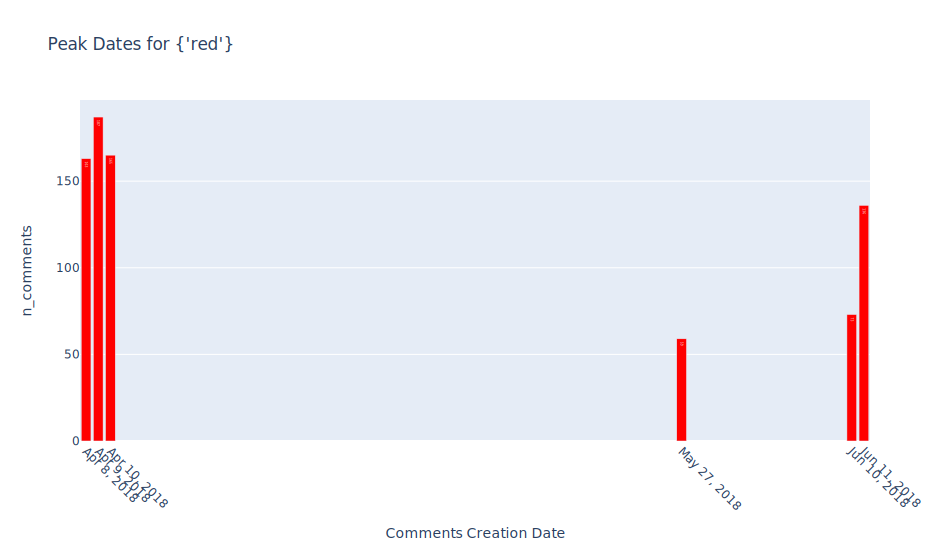

In [25]:
red.peak(6)

The commentes were made between 2018-03-23 and  2021-07-29
      n_comments
year            
2018        1052
2019          21
2020         142
2021          24


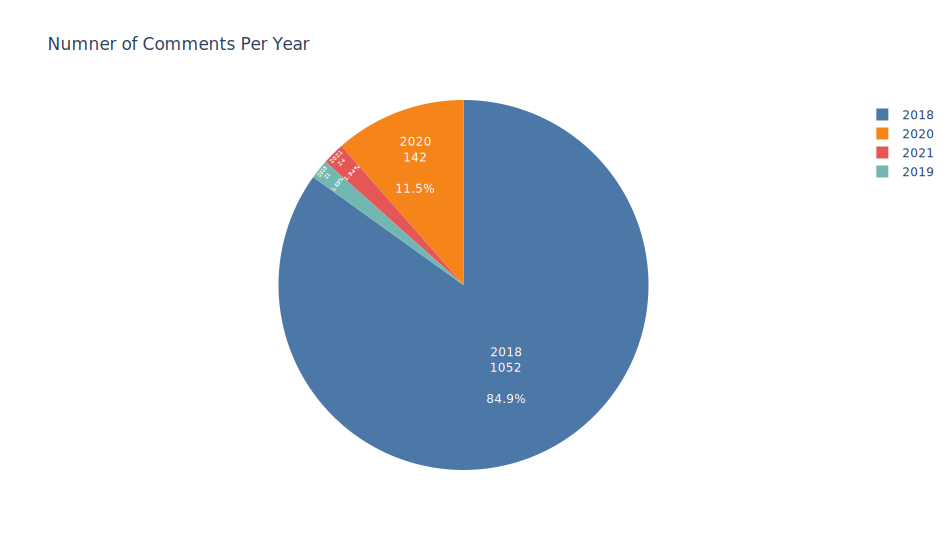

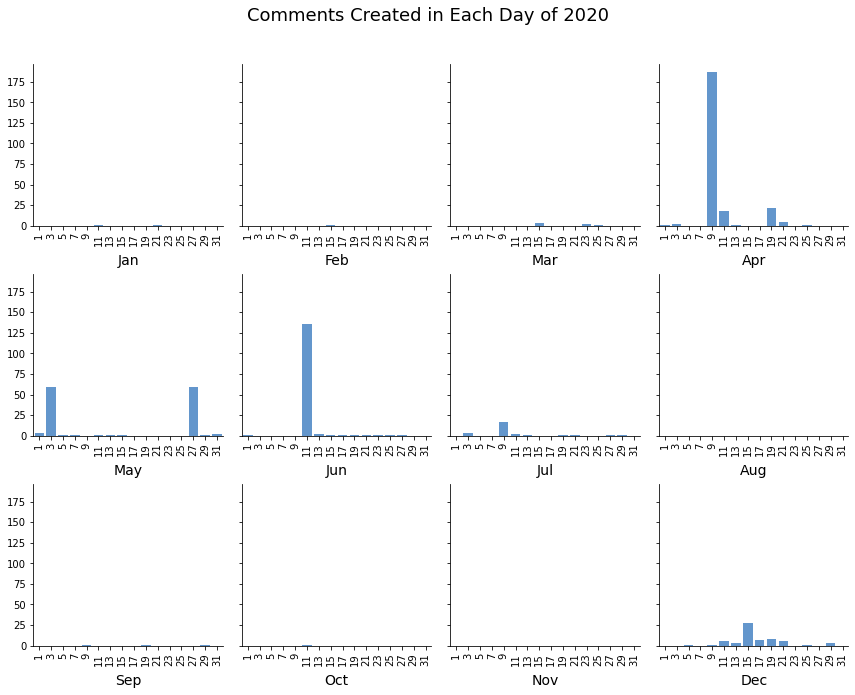

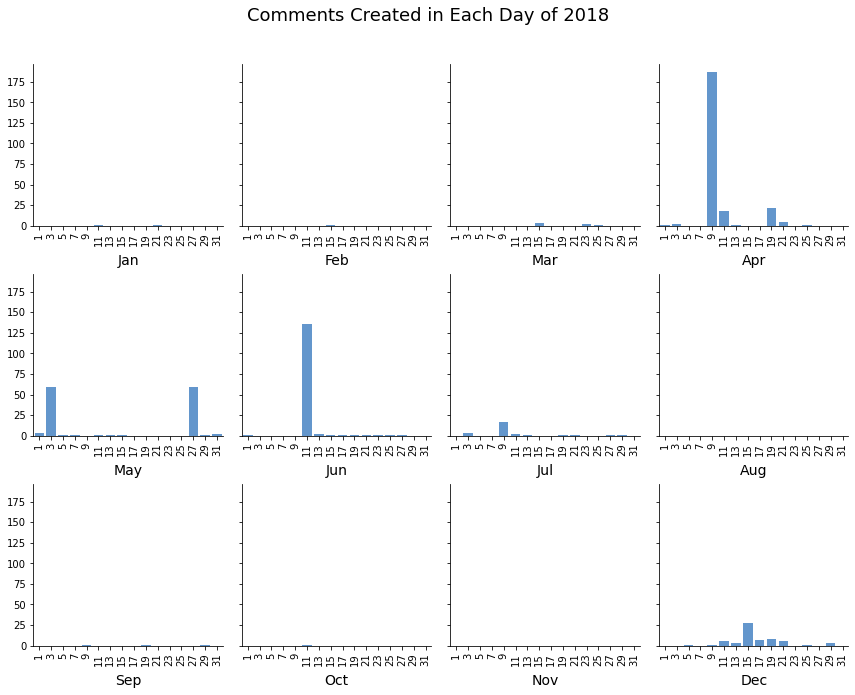

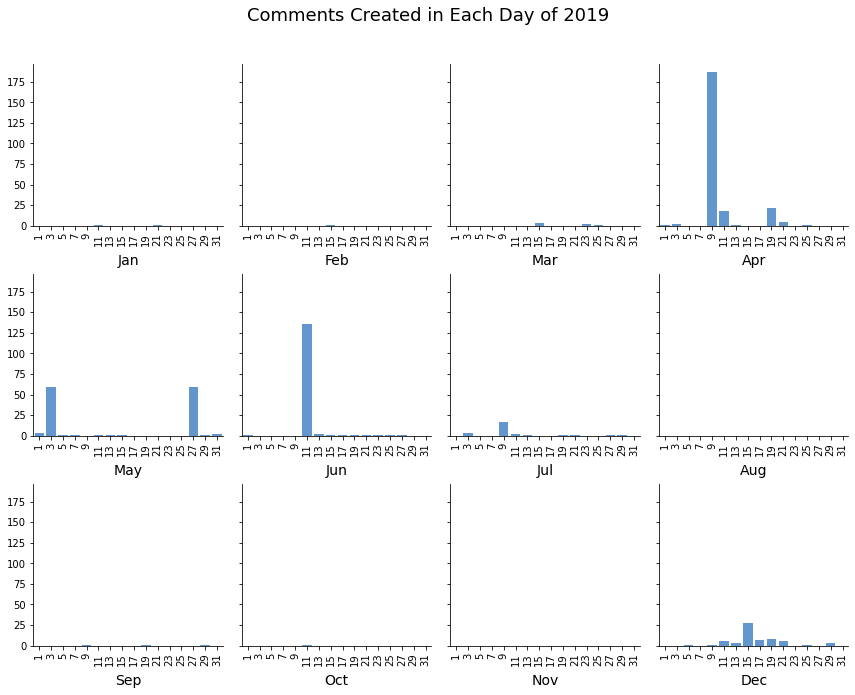

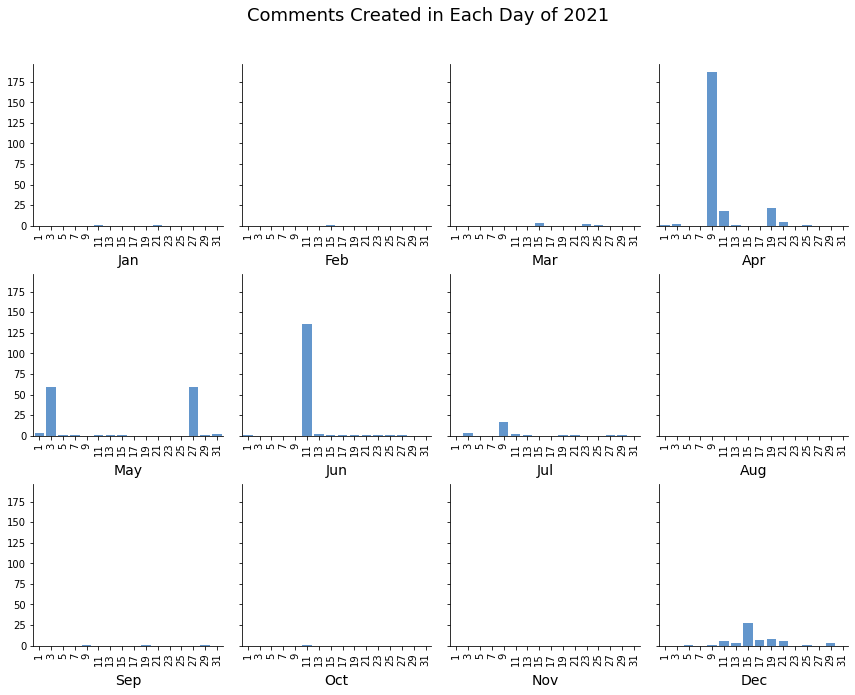

In [26]:
red.date_info()

In [27]:
red.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
881114,red,2018-04-08 20:39:29,17904408643168700,0.0,1.0,1753156255536862976,n,5372056790,felipecori_8,False,...,Apr,8,2018-04-08,20,red,{'red'},0 days 00:00:01,0.0,0.0,0.0
881117,red,2018-04-08 20:40:10,17937083674052876,0.0,0.0,1753156255536862976,n,5677739647,skylerishere_,False,...,Apr,8,2018-04-08,20,red,{'red'},0 days 00:00:41,0.0,0.0,0.0
881118,red,2018-04-08 20:40:12,17878007896205820,0.0,0.0,1753156255536862976,n,4035509768,therealtybriscoe,False,...,Apr,8,2018-04-08,20,red,{'red'},0 days 00:00:02,0.0,0.0,0.0
881120,red,2018-04-08 20:40:44,17904237640175672,0.0,0.0,1753156255536862976,n,2195412640,sadiqis0425,False,...,Apr,8,2018-04-08,20,red,{'red'},0 days 00:00:32,0.0,0.0,0.0
881122,red,2018-04-08 20:41:05,17933469565069218,0.0,0.0,1753156255536862976,n,1529114182,victorvllc,False,...,Apr,8,2018-04-08,20,red,{'red'},0 days 00:00:21,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648395,red,2020-12-14 20:39:15,18126842983159504,0.0,4.0,2464129509925985792,n,25142564156,elvirapuzo85,False,...,Dec,14,2020-12-14,20,red,{'red'},0 days 00:00:00,0.0,0.0,0.0
648416,red💪🏻,2020-12-14 21:16:34,17900409520637234,0.0,1.0,2464129509925985792,n,43613836634,sahartaleb___,False,...,Dec,14,2020-12-14,21,red,{'red'},0 days 00:00:57,0.0,0.0,0.0
648419,red😠,2020-12-14 21:21:49,17917917088492358,0.0,1.0,2464129509925985792,n,2235983505,sumetsochka,False,...,Dec,14,2020-12-14,21,red,{'red'},0 days 00:00:18,0.0,0.0,0.0
648420,red,2020-12-14 21:22:41,17951356558388200,0.0,1.0,2464129509925985792,n,2309643674,kiaw.az,False,...,Dec,14,2020-12-14,21,red,{'red'},0 days 00:00:52,0.0,0.0,0.0


In [28]:
len(red.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

233

In [29]:
red.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

abe_xiong               2
dont_follow0.24         2
monotonia101            2
e.horbie_official       2
batboyz42               2
                       ..
world_of_arrowverse_    1
watchmen_2000           1
ayush.mahapatra_        1
geeksworld              1
iamnoahone              1
Name: username, Length: 233, dtype: int64

In [30]:
red.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2018-04-08    92
2018-04-09    43
2018-04-10    32
2018-06-10    27
2018-06-11    15
2018-05-27    12
2020-12-14     5
2018-05-03     3
2018-04-20     3
2018-05-02     3
2018-06-12     2
2018-04-19     1
2018-04-11     1
2018-12-10     1
2018-07-09     1
Name: date, dtype: int64

In [31]:
list(red.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['abe_xiong',
 'dont_follow0.24',
 'monotonia101',
 'e.horbie_official',
 'batboyz42',
 'sharzmahmood',
 'unkindly_retro18',
 'just.dc.comics',
 'gabilouzzzz',
 'mikellimas12',
 'dylankleinmaier',
 'luizesleite',
 'savannahm2.0',
 'superheroesig',
 '_abdvl._',
 '_jluiz05',
 'henrylupin_',
 'zaykilo',
 'cholo561',
 'kai209',
 '1alisalama',
 'genet_the_great',
 'yulk97',
 'mr.pwinglez_',
 'thenerdyhub',
 'iamrvan',
 'harshilrama',
 'edwardchen7423',
 'ekin.tds',
 'kiaw.az',
 'ducodrawings',
 'ijam10',
 'victorssouza__',
 'eduardo_gonzalez0126',
 'justis_xoxo',
 'keith_calman_',
 'zfafd',
 'papadimon',
 'luxhooh',
 'elvirapuzo85',
 'dc5s_for_me',
 'johnnycrush',
 '21oneup_04_tony19',
 'tyson_and_182_others',
 'jodonnell.13',
 'chloespops1201',
 'ashkn__sh',
 'eric_tran_2434',
 '_.bunny._1',
 'rare_jango',
 '_joboe_',
 'uaren.d',
 'jhardy_24',
 'marquitos_orgulloherculano',
 'sadiqis0425',
 'victorvllc',
 'jesuslaguna89',
 'skylerishere_',
 'diornexus',
 'sergant_dom',
 '_phorusrhacos',
 '

<a id='fuck'></a>
### fuck
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisabuser">amberheardisabuser</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [32]:
fuck = SameText(df_comments, "{'fuck'}")

In [33]:
fuck.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
311,fuck no!,2021-03-11 01:14:12,17908887253671416,0.0,0.0,2507566752144024576,n,42788636,chris_california__831,False,https://www.instagram.com/chris_california__831,2021,Mar,11,2021-03-11,1,fuck no!,{'fuck'}
6707,fuck,2018-03-24 18:37:00,17927802805067942,0.0,0.0,1741639216007327744,n,4134100562,mannydworld,False,https://www.instagram.com/mannydworld,2018,Mar,24,2018-03-24,18,fuck,{'fuck'}


In [34]:
fuck.n_commnets_unique()

This comment appeared in 384 shape


In [35]:
fuck.shapes(15)

fuck her         185
fuck              80
fuck no           75
fuck you          63
fuck off          47
what the fuck     39
fuck that         17
fuck u            15
fuck her.          9
fuck no!           8
fuck it            7
fuck this          6
the fuck?          5
fuck her!          5
fuck 🔥             5
Name: message, dtype: int64

In [36]:
fuck.dates()

2020-11-13    48
2020-11-24    19
2020-11-14    19
2020-12-14    19
2020-11-23    18
              ..
2020-07-15     1
2019-01-02     1
2021-06-30     1
2020-06-02     1
2020-05-21     1
Name: date, Length: 427, dtype: int64

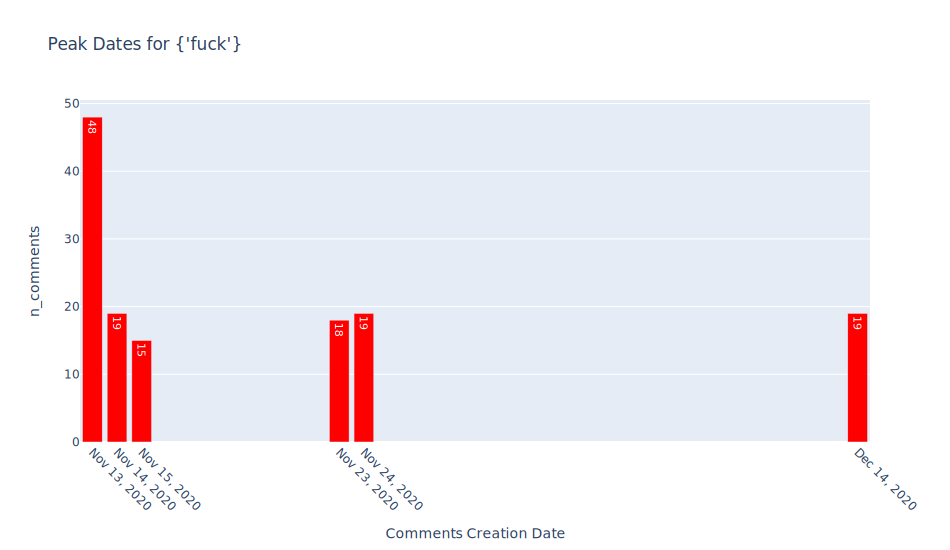

In [37]:
fuck.peak(6)

The commentes were made between 2018-03-14 and  2021-08-06
      n_comments
year            
2018         116
2019          86
2020         580
2021         206


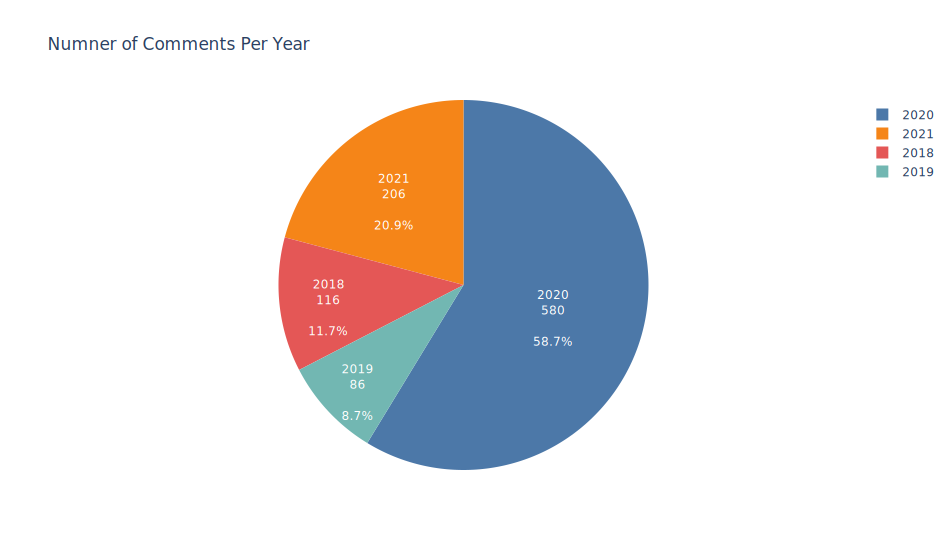

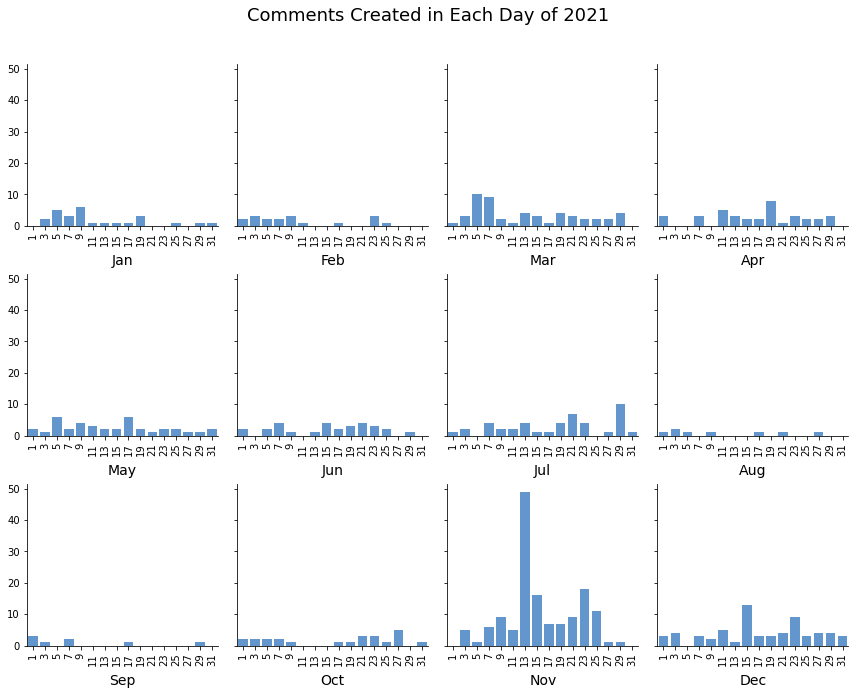

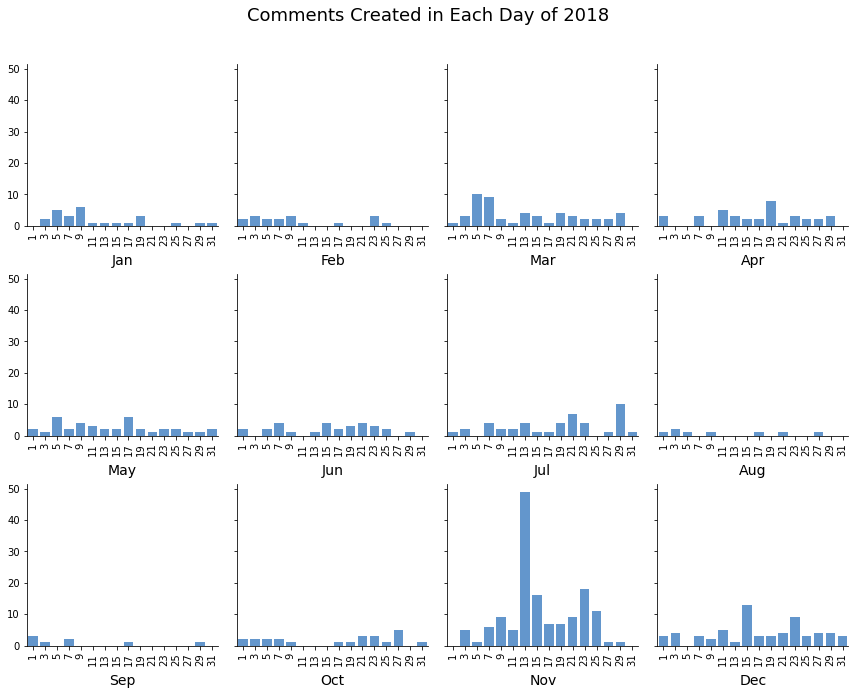

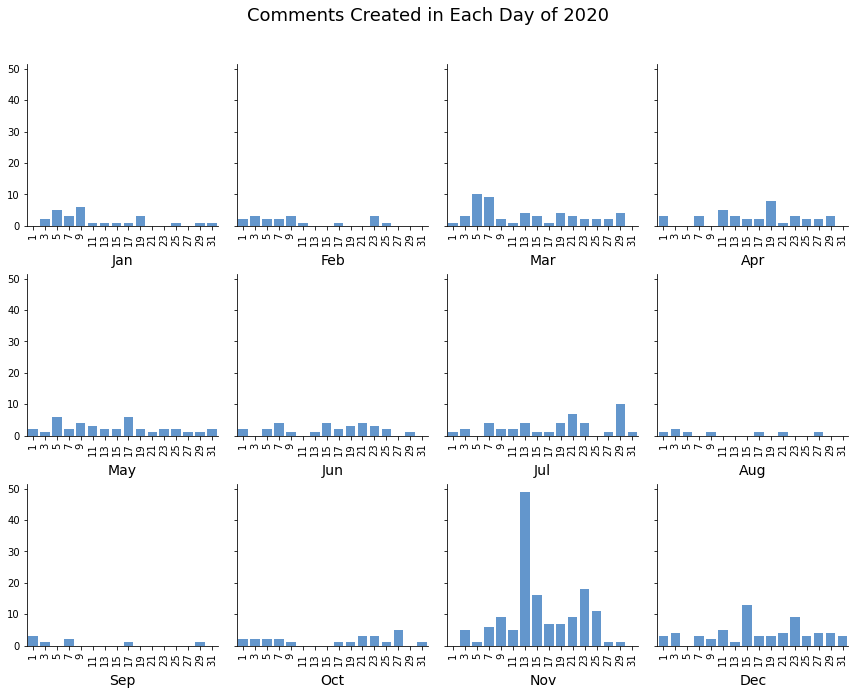

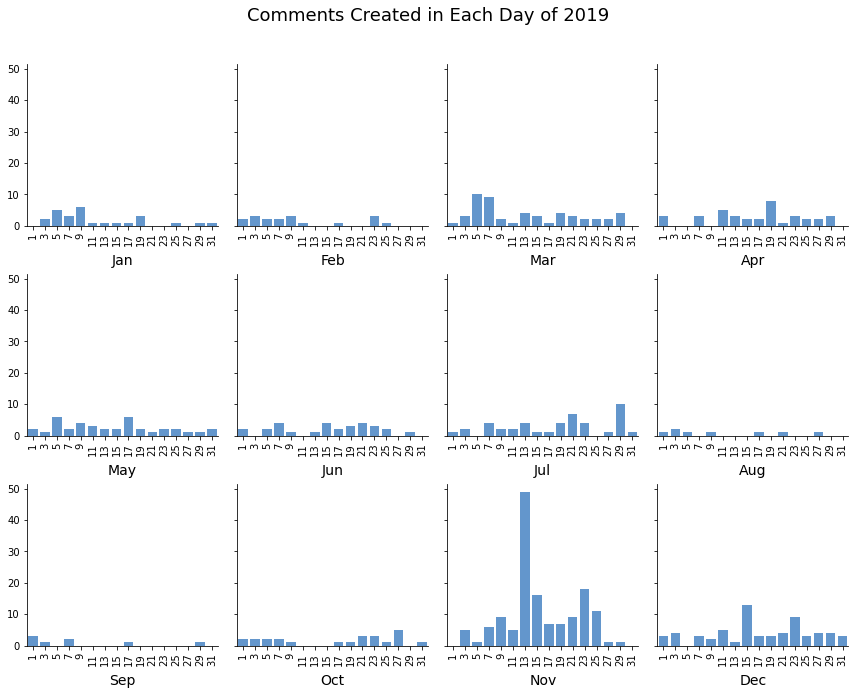

In [38]:
fuck.date_info()

In [39]:
fuck.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
703998,fuck this. no.,2018-07-30 15:21:32,17944113784085700,0.0,1.0,1834884415730529024,n,4002550560,just.dc.comics,False,...,Jul,30,2018-07-30,15,fuck this. no.,{'fuck'},0 days 00:00:18,0.0,0.0,0.0
1247110,fuck,2019-02-04 06:31:55,17856355063328028,0.0,1.0,1971465053200510976,n,6291112232,mystical_petrova,False,...,Feb,4,2019-02-04,6,fuck,{'fuck'},0 days 00:00:04,0.0,0.0,0.0
1294808,what the fuck😐,2020-07-08 19:45:53,17850358628163166,0.0,0.0,2348863105612431872,n,27222255411,bieberdepp,False,...,Jul,8,2020-07-08,19,what the fuck,{'fuck'},0 days 00:00:00,0.0,0.0,0.0
613643,fuck you,2020-07-29 09:04:09,17848061804236980,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,Jul,29,2020-07-29,9,fuck you,{'fuck'},0 days 00:00:02,0.0,0.0,0.0
613644,fuck you,2020-07-29 09:04:13,18154117582033700,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,Jul,29,2020-07-29,9,fuck you,{'fuck'},0 days 00:00:04,0.0,0.0,0.0
613645,fuck her,2020-07-29 09:04:14,18146180068069228,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,Jul,29,2020-07-29,9,fuck her,{'fuck'},0 days 00:00:01,0.0,0.0,0.0
993275,fuck u,2020-08-24 20:22:30,17864863436020180,0.0,0.0,2376909184569769472,n,38713622568,loneshamim_official,False,...,Aug,24,2020-08-24,20,fuck u,{'fuck'},0 days 00:00:09,0.0,0.0,0.0
662768,fuck,2020-10-01 02:17:16,17846737325367284,0.0,0.0,2385017715847743488,n,42829694287,sara22wslp,False,...,Oct,1,2020-10-01,2,fuck,{'fuck'},0 days 00:00:08,0.0,0.0,0.0
701880,what the fuck,2020-11-13 00:50:42,17859633350266608,0.0,6.0,2441092489643747840,n,5988213152,dantepetrella,False,...,Nov,13,2020-11-13,0,what the fuck,{'fuck'},0 days 00:00:05,0.0,0.0,0.0
701712,fuck em then,2020-11-13 01:47:12,17861091788236036,0.0,0.0,2441092489643747840,n,2242147210,cali2approv3d,False,...,Nov,13,2020-11-13,1,fuck em then,{'fuck'},0 days 00:00:50,0.0,0.0,0.0


In [40]:
len(fuck.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

17

In [41]:
fuck.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

hosein.sarsam          15
anthony.apel            3
andmen.1998             2
mobina.n.motammed       1
twoguysoneticket1       1
sara22wslp              1
call.me.chelse          1
mystical_petrova        1
bieberdepp              1
cali2approv3d           1
dantepetrella           1
_.adnaaan__             1
loneshamim_official     1
allison_overby          1
thealifaryan            1
just.dc.comics          1
fuckfaza                1
Name: username, dtype: int64

In [42]:
fuck.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2021-03-07    7
2020-11-13    4
2020-07-29    3
2021-04-11    2
2021-04-14    2
2021-03-05    2
2020-11-28    2
2020-12-14    2
2020-11-18    1
2018-07-30    1
2020-08-24    1
2021-05-26    1
2020-07-08    1
2020-10-01    1
2021-03-19    1
2019-02-04    1
2021-07-22    1
2021-04-02    1
Name: date, dtype: int64

In [43]:
list(fuck.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['hosein.sarsam',
 'anthony.apel',
 'andmen.1998',
 'mobina.n.motammed',
 'twoguysoneticket1',
 'sara22wslp',
 'call.me.chelse',
 'mystical_petrova',
 'bieberdepp',
 'cali2approv3d',
 'dantepetrella',
 '_.adnaaan__',
 'loneshamim_official',
 'allison_overby',
 'thealifaryan',
 'just.dc.comics',
 'fuckfaza']

<a id='johnnydepp'></a>
### johnnydepp
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisanabuser">amberheardisanabuser</a></li>
<li><a href="#bitch">bitch</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [44]:
jd = SameText(df_comments, "{'johnnydepp'}")

In [45]:
jd.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
4124,@johnnydepp,2020-04-18 11:06:46,18108673351120448,0.0,0.0,2242882880333473280,n,1441261892,mompreneurof6,False,https://www.instagram.com/mompreneurof6,2020,Apr,18,2020-04-18,11,@johnnydepp,{'johnnydepp'}
7621,@johnnydepp @johnnydepp.cl 🙌,2021-06-15 04:35:11,17876667587426594,0.0,1.0,2596223551650236928,n,6011964892,sparrowdepp3,False,https://www.instagram.com/sparrowdepp3,2021,Jun,15,2021-06-15,4,@johnnydepp @johnnydepp.cl,{'johnnydepp'}


In [46]:
jd.n_commnets_unique()

This comment appeared in 148 shape


In [47]:
jd.shapes(15)

@johnnydepp                                            381
#johnnydepp                                             42
@johnnydepp ❤️                                          16
@johnnydepp 💕                                            8
@johnnydepp 💜                                            6
@johnnydepp💙                                             5
@johnnydepp 💙                                            4
@johnnydepp ❤️❤️❤️❤️                                     3
@johnnydepp "we are with you"♥                           3
@johnnydepp 😂                                            3
@johnnydepp 🔥                                            3
@johnnydepp 💚                                            3
johnnydepp                                               3
@johnnydepp ♥️                                           2
just a face of a liar💩🤦🏻‍♀️😂justice for #johnnydepp      2
Name: message, dtype: int64

In [48]:
jd.dates()

2020-11-02    120
2020-11-03     48
2020-08-13     25
2020-08-03     21
2020-08-14     16
             ... 
2020-12-19      1
2020-08-08      1
2021-03-21      1
2021-01-10      1
2020-09-15      1
Name: date, Length: 185, dtype: int64

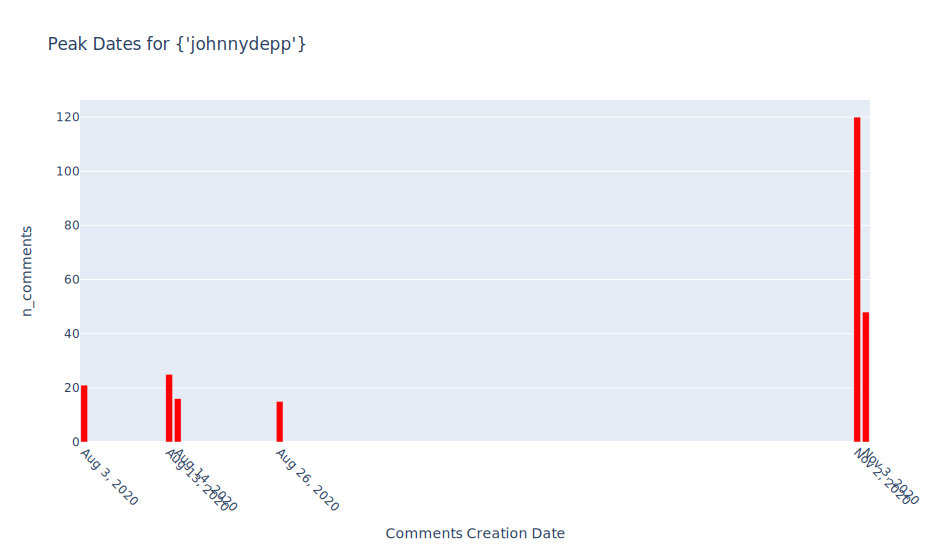

In [49]:
jd.peak(6)

The commentes were made between 2018-02-10 and  2021-08-13
      n_comments
year            
2018           4
2019           1
2020         469
2021         148


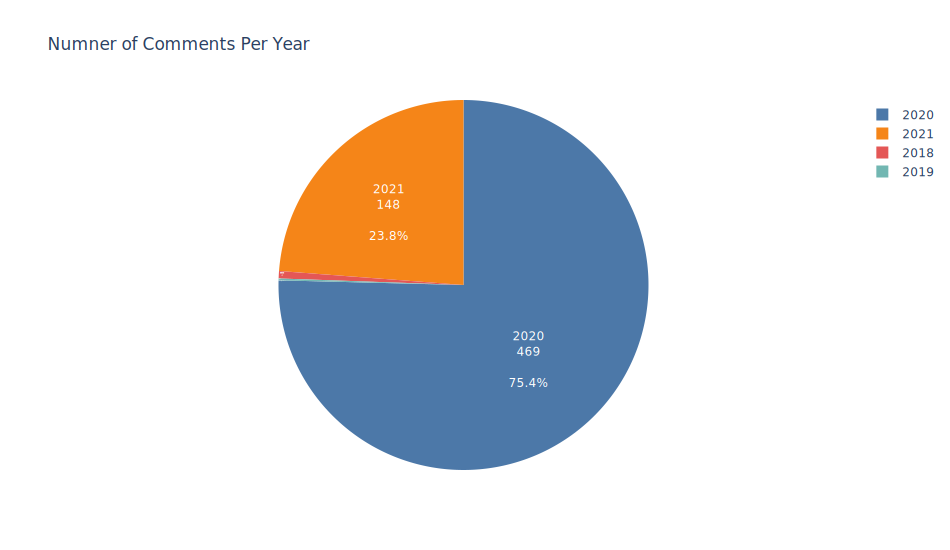

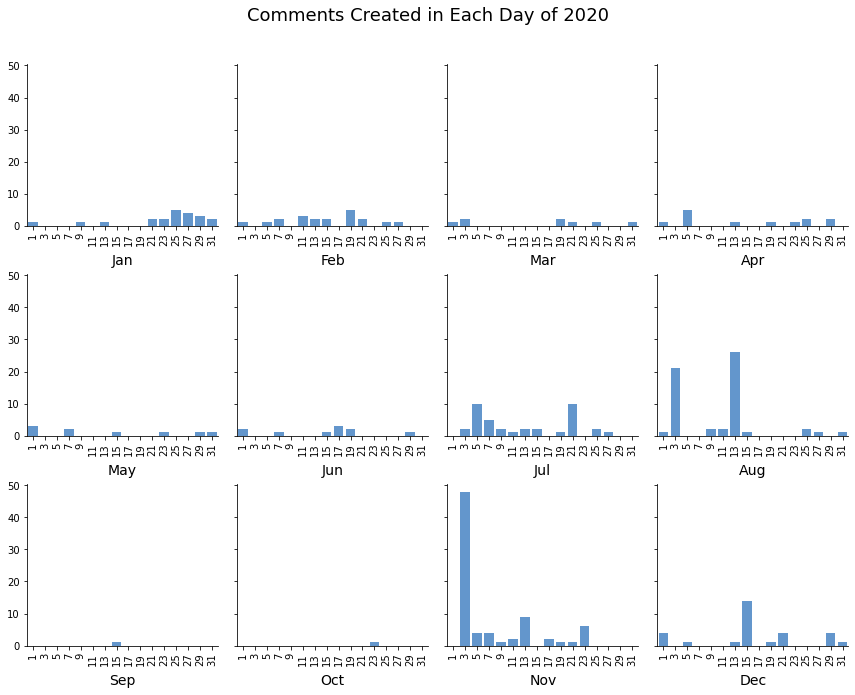

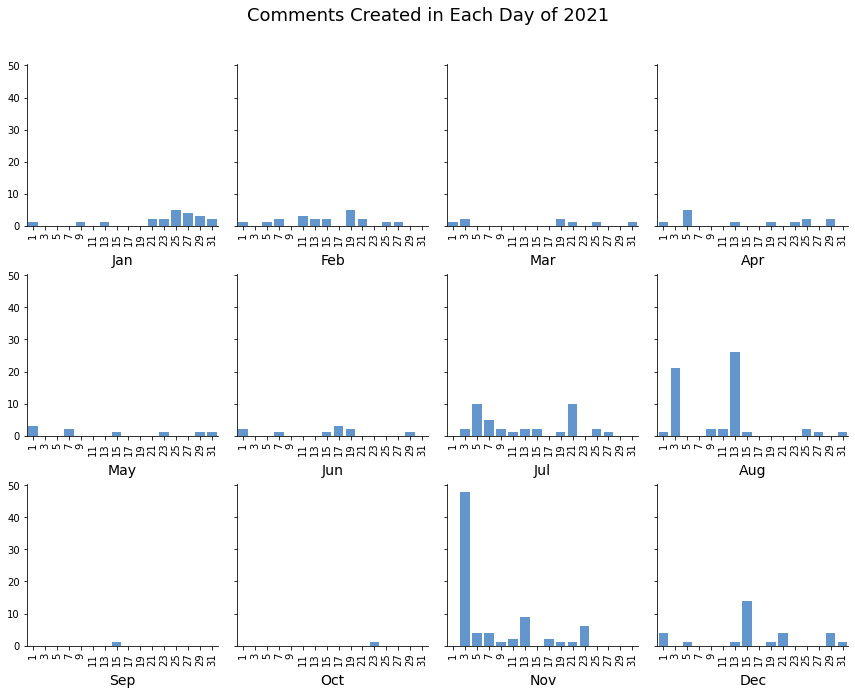

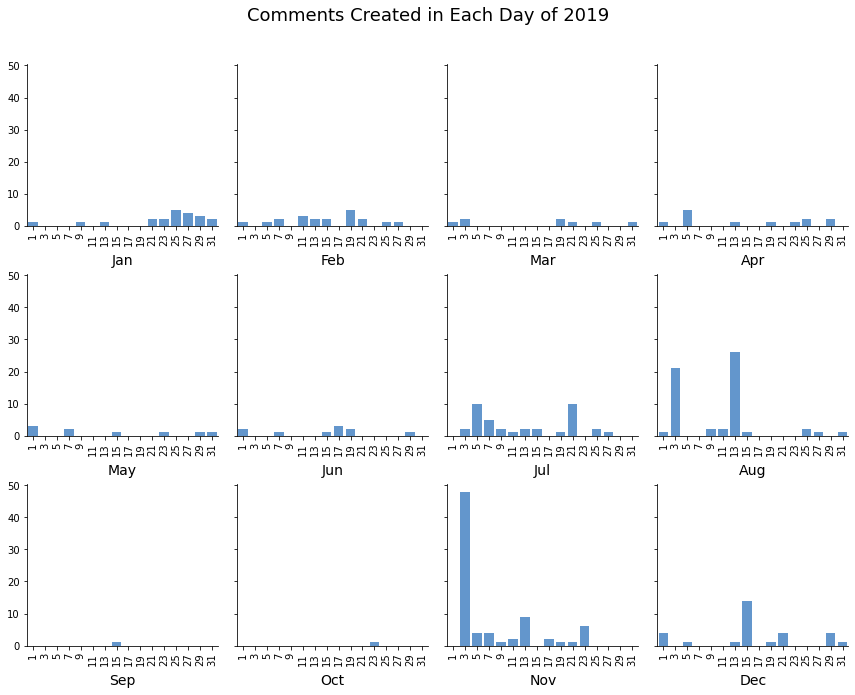

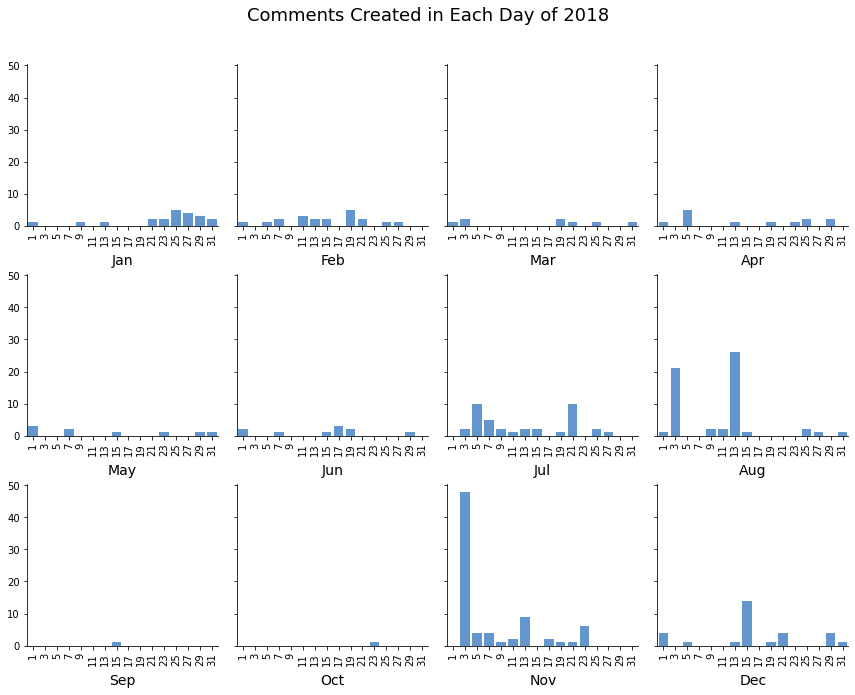

In [50]:
jd.date_info()

In [51]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
746318,#johnnydepp,2018-02-10 18:57:13,17910453229112538,0.0,0.0,1684941435018044416,n,2194277189,jjforlife.y,False,...,Feb,10,2018-02-10,18,#johnnydepp,{'johnnydepp'},0 days 00:00:07,0.0,0.0,0.0
1138194,@johnnydepp,2020-06-30 15:05:58,18015226330304628,0.0,2.0,2342950723368841216,n,12029614163,inmn_hstm,False,...,Jun,30,2020-06-30,15,@johnnydepp,{'johnnydepp'},0 days 00:00:10,0.0,0.0,0.0
1138195,@johnnydepp,2020-06-30 15:06:08,17878594450712180,0.0,2.0,2342950723368841216,n,12029614163,inmn_hstm,False,...,Jun,30,2020-06-30,15,@johnnydepp,{'johnnydepp'},0 days 00:00:10,0.0,0.0,0.0
18382,@johnnydepp 💜,2020-07-05 18:05:55,17844957536255768,0.0,1.0,2346596933296266752,n,33655292307,j0ohnnydepp,False,...,Jul,5,2020-07-05,18,@johnnydepp,{'johnnydepp'},0 days 00:00:42,0.0,0.0,0.0
18383,@johnnydepp 💜,2020-07-05 18:05:55,17928629803395402,0.0,1.0,2346596933296266752,n,33655292307,j0ohnnydepp,False,...,Jul,5,2020-07-05,18,@johnnydepp,{'johnnydepp'},0 days 00:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322728,@johnnydepp,2021-04-05 22:15:58,17885348129148484,0.0,0.0,2433649528107118080,n,33915725897,sara24_4yio,False,...,Apr,5,2021-04-05,22,@johnnydepp,{'johnnydepp'},0 days 00:00:07,0.0,0.0,0.0
1322729,@johnnydepp,2021-04-05 22:16:06,18146797312094416,0.0,0.0,2433649528107118080,n,33915725897,sara24_4yio,False,...,Apr,5,2021-04-05,22,@johnnydepp,{'johnnydepp'},0 days 00:00:08,0.0,0.0,0.0
1322730,@johnnydepp,2021-04-05 22:16:12,17902633585771468,0.0,0.0,2433649528107118080,n,33915725897,sara24_4yio,False,...,Apr,5,2021-04-05,22,@johnnydepp,{'johnnydepp'},0 days 00:00:06,0.0,0.0,0.0
1322731,@johnnydepp,2021-04-05 22:16:21,18083580802252436,0.0,0.0,2433649528107118080,n,33915725897,sara24_4yio,False,...,Apr,5,2021-04-05,22,@johnnydepp,{'johnnydepp'},0 days 00:00:09,0.0,0.0,0.0


In [52]:
len(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

67

In [53]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

_jas_min_pr._           20
mar._.mj                15
nargess1485             12
aida_parsa86            11
why.becauseofwhynils     9
                        ..
_naomi_sayuri            1
thatgorlyouknow          1
wnnqn                    1
okakart                  1
19omid86                 1
Name: username, Length: 67, dtype: int64

In [54]:
jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-02    101
2020-11-03     40
2020-08-13     12
2020-12-15     11
2020-08-14     10
2020-07-21      9
2020-07-05      8
2020-10-02      7
2020-11-06      7
2020-08-26      7
2020-11-23      5
2021-02-14      4
2021-04-05      4
2020-08-28      4
2020-11-10      4
2020-11-13      4
2020-11-05      3
2020-06-30      2
2021-02-18      2
2020-07-07      2
2020-08-03      2
2021-02-10      1
2021-01-25      1
2020-08-24      1
2018-02-10      1
2020-09-24      1
2020-11-04      1
2021-06-20      1
2020-11-07      1
2021-02-22      1
2021-02-19      1
2021-01-28      1
2021-02-21      1
2020-07-06      1
Name: date, dtype: int64

In [55]:
list(jd.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['_jas_min_pr._',
 'mar._.mj',
 'nargess1485',
 'aida_parsa86',
 'why.becauseofwhynils',
 'johnny_depp_073',
 'johnnydepp.lovers.2020',
 'elina.5489',
 'grindelwald.ir',
 'johnnydeppfaans',
 'parmi_da88',
 'tini_karol_our_idols',
 'mariamfarzam',
 'kimia.nikzad',
 'johnnydeppfanturkey58',
 'deppvid.ir',
 'depphead.area',
 'fctbgcdsdrg',
 'jackieboydepp2',
 'cityof_.stars',
 'haj_johnnydepp',
 'madineh7837',
 'johnnydepp.artist',
 'expectosnape',
 'j0ohnnydepp',
 'sara24_4yio',
 '_nikax.l_',
 'depphead_ir',
 '_anersisyannn',
 'johnnydepp_fnp',
 'meryy_forsterova',
 'drarry_lgbt',
 'johnyiidep_fan',
 '____diamondsss',
 'art_diaris',
 '_johnny_depp.1',
 'deppheditz',
 'noooo234567',
 'empire.of.lilyrose.depp',
 'johnny.depp_tr',
 'taranehalidoosti_purple',
 'inmn_hstm',
 'johnnydeppism',
 'i.am.captain.jack.sparrow',
 'imia_sh',
 'babikate6',
 'marisol._torres',
 'netflix_.serials',
 'nimriae',
 'jchnnydpp',
 'ladawhatyoudoing',
 'rayhanafreitas_',
 'machelyyyyy',
 'milad.mrsh',
 'jjforli

<a id='amberheardisanabuser'></a>
### amberheardisanabuser
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisanabuser">amberheardisanabuser</a></li>
<li><a href="#bitch">bitch</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [56]:
amberheardisanabuser = SameText(df_comments, "{'amberheardisanabuser'}")

In [57]:
amberheardisanabuser.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
6062,#amberheardisanabuser,2021-01-04 10:35:58,17892481600794708,0.0,1.0,2455472034631451136,n,29803639,spirit_ualspirit,False,https://www.instagram.com/spirit_ualspirit,2021,Jan,4,2021-01-04,10,#amberheardisanabuser,{'amberheardisanabuser'}
10688,#amberheardisanabuser,2020-11-11 19:07:01,17876513899968318,0.0,1.0,2438882288443426304,n,4537577699,youreignbyjazi,False,https://www.instagram.com/youreignbyjazi,2020,Nov,11,2020-11-11,19,#amberheardisanabuser,{'amberheardisanabuser'}


In [58]:
amberheardisanabuser.n_commnets_unique()

This comment appeared in 49 shape


In [59]:
amberheardisanabuser.shapes(15)

#amberheardisanabuser                                                                                            432
#amberheardisanabuser 🤢                                                                                            6
#amberheardisanabuser 🤮                                                                                            3
🤢🤢🤢 #amberheardisanabuser                                                                                          2
#amberheardisanabuser 🤡                                                                                            2
#amberheardisanabuser 🙌                                                                                            2
#amberheardisanabuser 👿                                                                                            2
🤢🤮🤮#amberheardisanabuser                                                                                           1
#amberheardisanabuser ! 👎👿🤮                                     

In [60]:
amberheardisanabuser.dates()

2020-12-18    43
2020-12-29    22
2020-12-19    18
2020-11-09    12
2020-11-08    11
              ..
2021-07-21     1
2021-06-14     1
2020-07-08     1
2020-03-28     1
2021-08-02     1
Name: date, Length: 194, dtype: int64

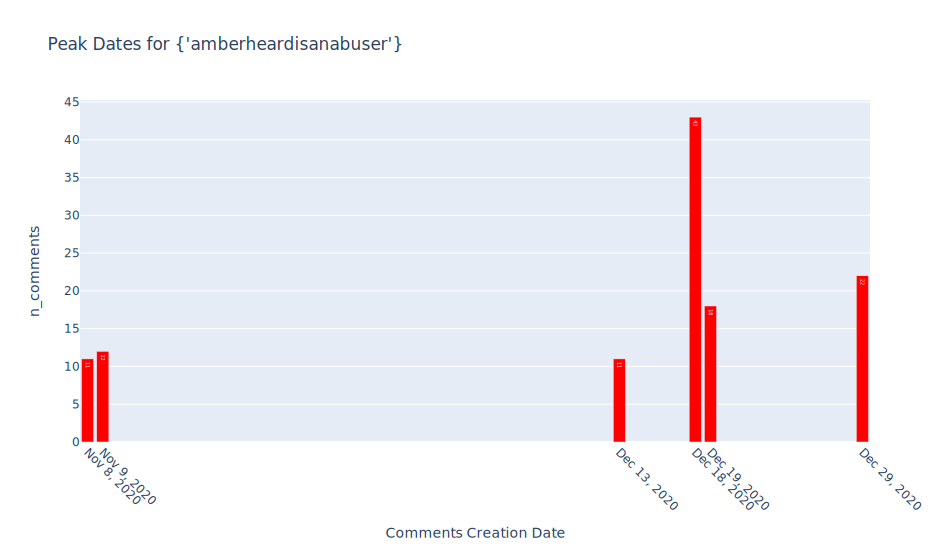

In [61]:
amberheardisanabuser.peak(6)

The commentes were made between 2019-03-13 and  2021-08-18
      n_comments
year            
2019          10
2020         354
2021         127


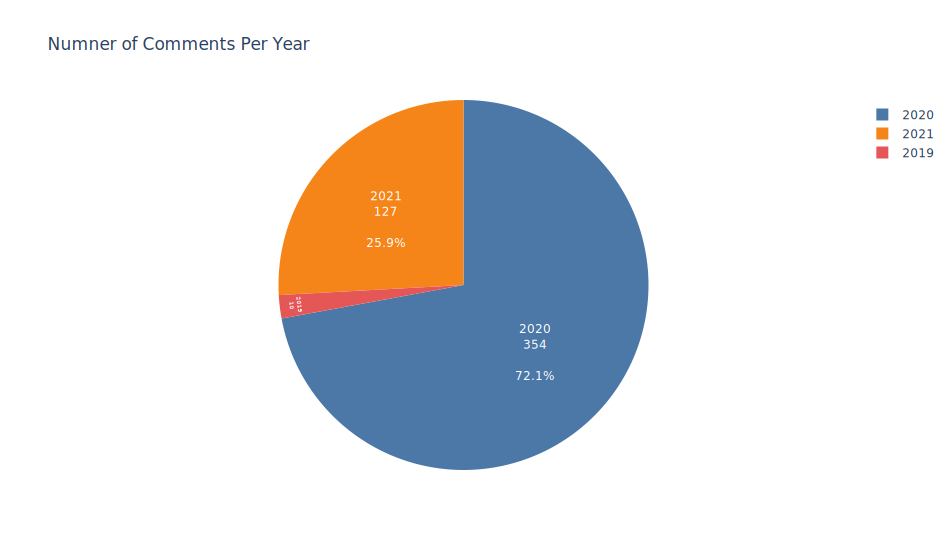

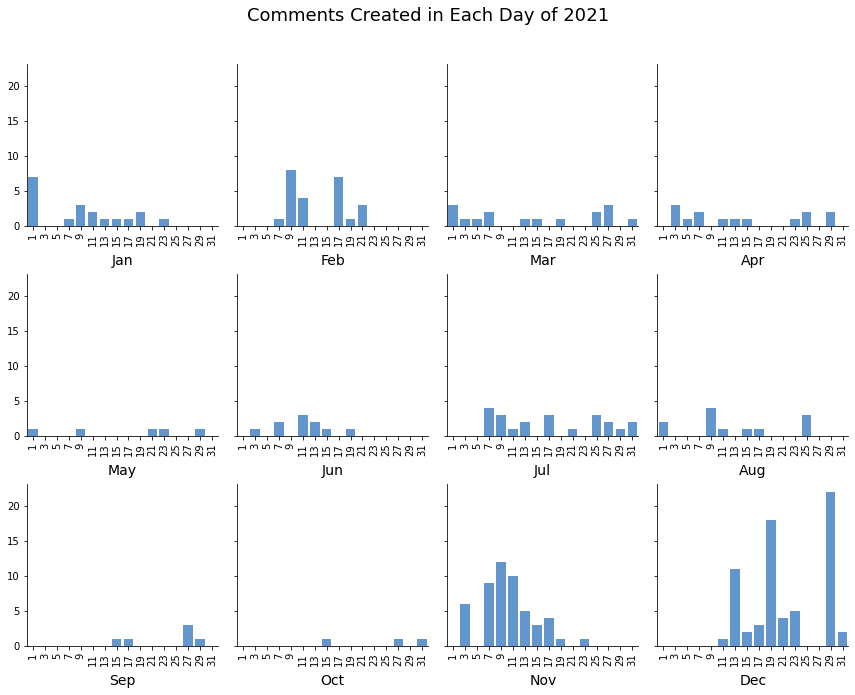

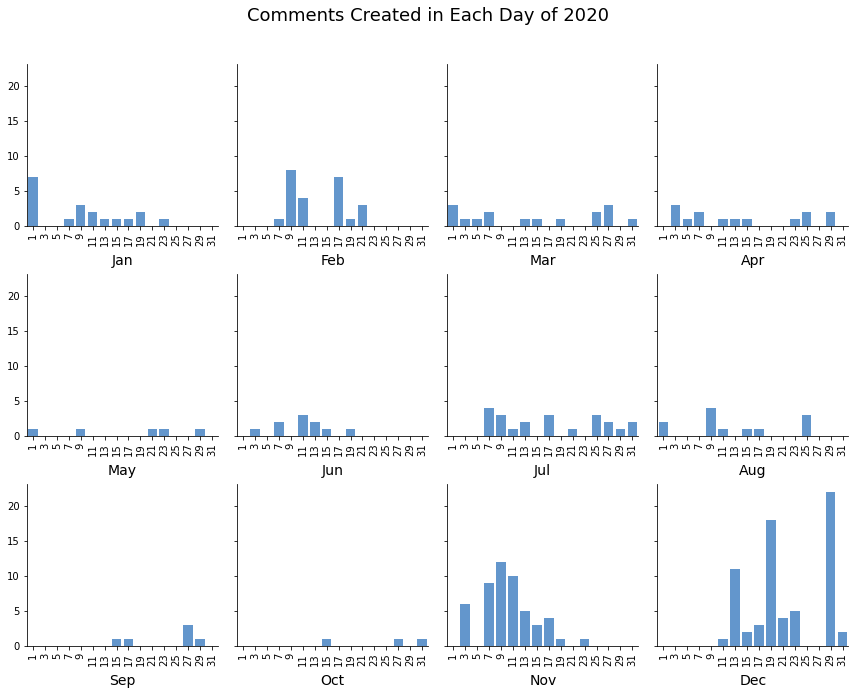

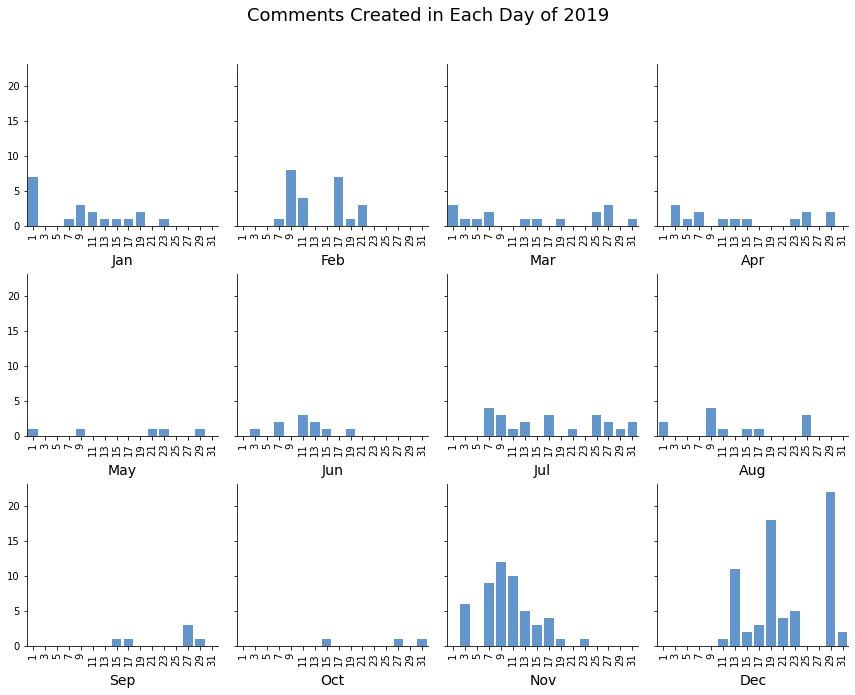

In [62]:
amberheardisanabuser.date_info()

In [63]:
amberheardisanabuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
42803,#amberheardisanabuser,2019-06-11 00:36:43,18040977955145200,0.0,0.0,2062782549740210944,n,11577955146,shiniganmii,False,...,Jun,11,2019-06-11,0,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:54,0.0,0.0,0.0
1195734,#amberheardisanabuser,2020-02-04 00:53:07,18120118813066312,0.0,0.0,2235969357677441536,n,15721056019,labatiperra1_oficial,False,...,Feb,4,2020-02-04,0,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:11,0.0,0.0,0.0
1330492,#amberheardisanabuser,2020-02-09 18:02:30,17915419759384356,1.0,1.0,2239892113161119744,n,21747064914,freyja_beads,False,...,Feb,9,2020-02-09,18,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:31,0.0,0.0,0.0
621475,#amberheardisanabuser,2020-02-11 10:34:40,17856088759774584,0.0,0.0,2240102418388278784,n,3305740188,racheltw__,False,...,Feb,11,2020-02-11,10,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:42,0.0,0.0,0.0
904669,💩💩💩💩💩💩💩 #amberheardisanabuser,2020-04-03 02:24:56,17851996318933760,0.0,0.0,2278555564501731840,n,11577955146,shiniganmii,False,...,Apr,3,2020-04-03,2,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:53,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48999,#amberheardisanabuser,2021-07-02 11:02:57,18124672981211772,0.0,11.0,2608507042662897152,n,1954635674,tanjajurgec,False,...,Jul,2,2021-07-02,11,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:47,0.0,0.0,0.0
1138147,#amberheardisanabuser,2021-07-02 11:03:22,17891525723204392,0.0,0.0,2608525357871081984,n,1954635674,tanjajurgec,False,...,Jul,2,2021-07-02,11,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:25,0.0,0.0,0.0
252906,#amberheardisanabuser,2021-07-02 11:04:13,17957599900454430,0.0,10.0,2608482705400468480,n,1954635674,tanjajurgec,False,...,Jul,2,2021-07-02,11,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:51,0.0,0.0,0.0
708294,#amberheardisanabuser,2021-07-08 09:41:50,18009747610323052,0.0,5.0,2613115182912191488,n,13802617588,nathanaeldavid_ignotuslux,False,...,Jul,8,2021-07-08,9,#amberheardisanabuser,{'amberheardisanabuser'},0 days 00:00:57,0.0,0.0,0.0


In [64]:
len(amberheardisanabuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

40

In [65]:
amberheardisanabuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

fans.depphead                6
amn666sia                    6
marie_kennedyxx              4
tanjajurgec                  3
divulgaaa.bahia              3
ballikaya_defne_7            3
johnnydepp_fnp               2
its_offical_sophie1          2
youreignbyjazi               2
shiniganmii                  2
zhra.006                     2
alic.sara20                  2
shellpoll26                  2
llsweet_                     1
racheltw__                   1
alessiainnocenzii            1
vict.or7363                  1
_connie_svd                  1
johnny.depp.is.innocent      1
vandevanderbilt              1
majjciii                     1
finnx07x                     1
crea.tive1345                1
sxphie.ritxhie               1
lovylysilva                  1
_depp_fan__                  1
labatiperra1_oficial         1
jdbestmoments                1
freyja_beads                 1
tomenage17                   1
truth.magicc                 1
em_fauch                     1
khrisfai

In [66]:
amberheardisanabuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-12-19    6
2020-11-08    6
2020-12-18    6
2020-11-09    5
2020-12-29    4
2021-07-02    3
2021-01-28    3
2020-11-11    3
2020-11-12    3
2020-09-27    2
2021-02-17    2
2020-11-13    2
2020-12-14    2
2020-12-13    2
2020-11-30    1
2020-02-04    1
2019-06-11    1
2020-04-03    1
2020-07-25    1
2020-11-10    1
2021-01-01    1
2021-02-24    1
2021-01-20    1
2020-12-23    1
2020-02-11    1
2021-07-08    1
2020-02-09    1
2020-11-07    1
2021-05-08    1
2021-01-14    1
2021-08-18    1
Name: date, dtype: int64

In [67]:
list(amberheardisanabuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['fans.depphead',
 'amn666sia',
 'marie_kennedyxx',
 'tanjajurgec',
 'divulgaaa.bahia',
 'ballikaya_defne_7',
 'johnnydepp_fnp',
 'its_offical_sophie1',
 'youreignbyjazi',
 'shiniganmii',
 'zhra.006',
 'alic.sara20',
 'shellpoll26',
 'llsweet_',
 'racheltw__',
 'alessiainnocenzii',
 'vict.or7363',
 '_connie_svd',
 'johnny.depp.is.innocent',
 'vandevanderbilt',
 'majjciii',
 'finnx07x',
 'crea.tive1345',
 'sxphie.ritxhie',
 'lovylysilva',
 '_depp_fan__',
 'labatiperra1_oficial',
 'jdbestmoments',
 'freyja_beads',
 'tomenage17',
 'truth.magicc',
 'em_fauch',
 'khrisfairbs',
 'v.i.c.k.y22',
 'itsbigbadwolf_',
 'nathanaeldavid_ignotuslux',
 'iamatefehr',
 '_delaram.s',
 'jette.crn',
 'm3hwi5h']

<a id='bitch'></a>
### bitch
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisanabuser">amberheardisanabuser</a></li>
<li><a href="#bitch">bitch</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [68]:
bitch = SameText(df_comments, "{'bitch'}")

In [69]:
bitch.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
2007,😒bitch,2020-05-28 12:33:49,18108118336137032,0.0,0.0,2318954103417754624,n,28017117210,fati._.elf,False,https://www.instagram.com/fati._.elf,2020,May,28,2020-05-28,12,bitch,{'bitch'}
13241,bitch,2020-10-02 21:14:21,18121283734084804,0.0,0.0,2410871684390144512,n,21224014173,ariel_d2234,False,https://www.instagram.com/ariel_d2234,2020,Oct,2,2020-10-02,21,bitch,{'bitch'}


In [70]:
bitch.n_commnets_unique()

This comment appeared in 204 shape


In [71]:
bitch.shapes(15)

bitch             305
what a bitch       25
she is a bitch     12
she’s a bitch      11
this bitch         10
such a bitch        9
bitch.              8
that bitch          8
a bitch             6
she's a bitch       6
bitch!              6
the bitch           4
bitch...            4
she is bitch        4
die bitch           4
Name: message, dtype: int64

In [72]:
bitch.dates()

2020-11-13    24
2020-11-10    18
2020-11-17    15
2020-11-14    14
2020-11-15    11
              ..
2021-02-28     1
2020-10-21     1
2021-01-31     1
2019-10-19     1
2020-03-22     1
Name: date, Length: 330, dtype: int64

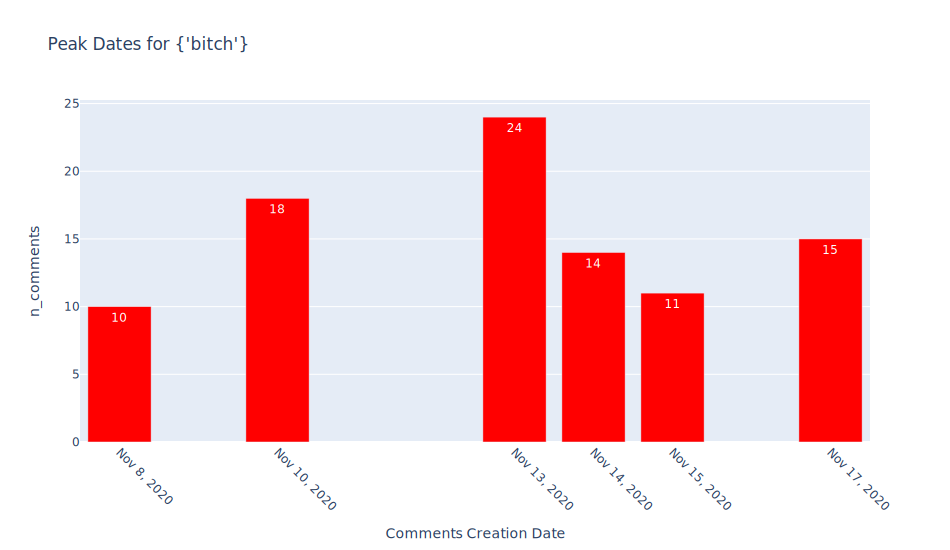

In [73]:
bitch.peak(6)

The commentes were made between 2018-03-15 and  2021-07-27
      n_comments
year            
2018          24
2019          49
2020         439
2021         123


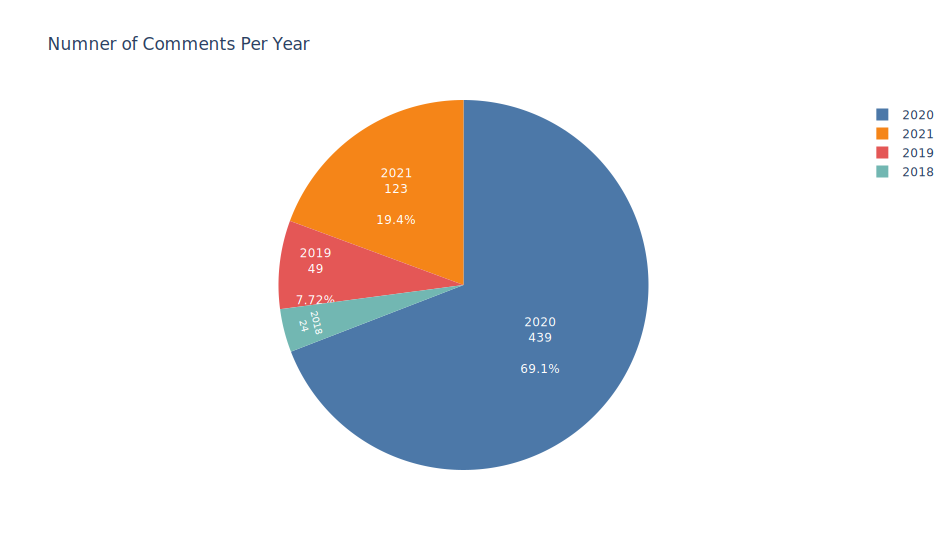

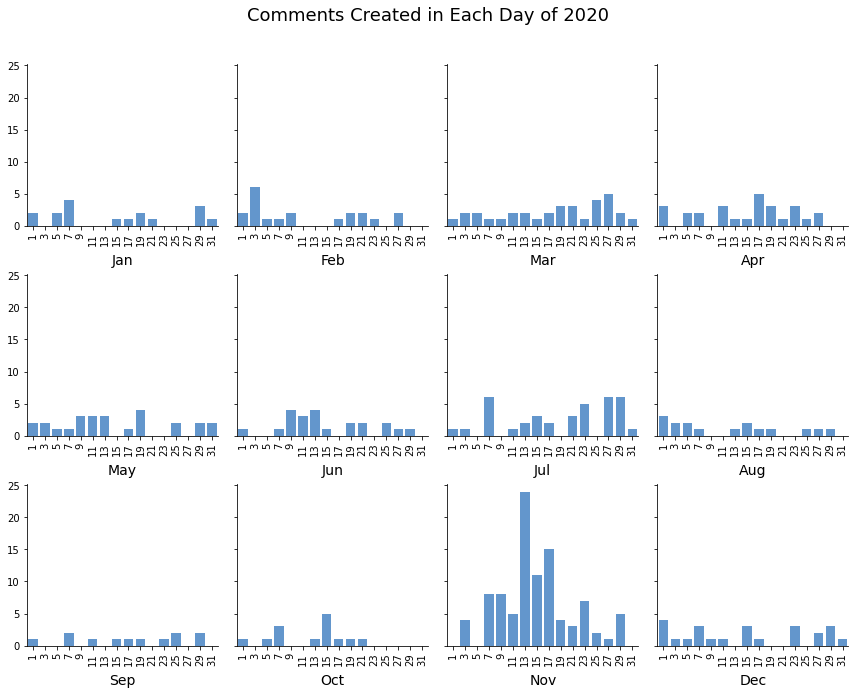

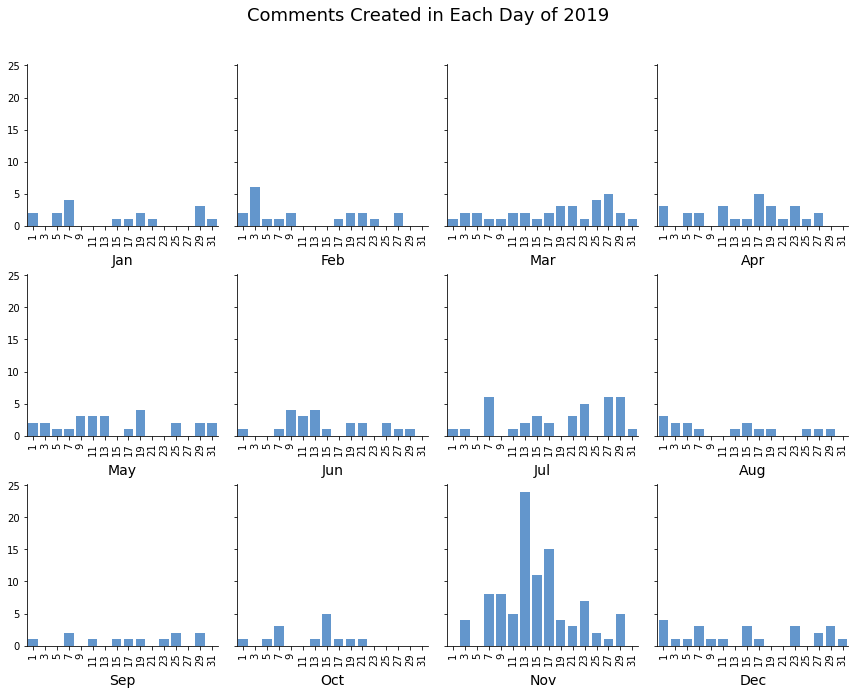

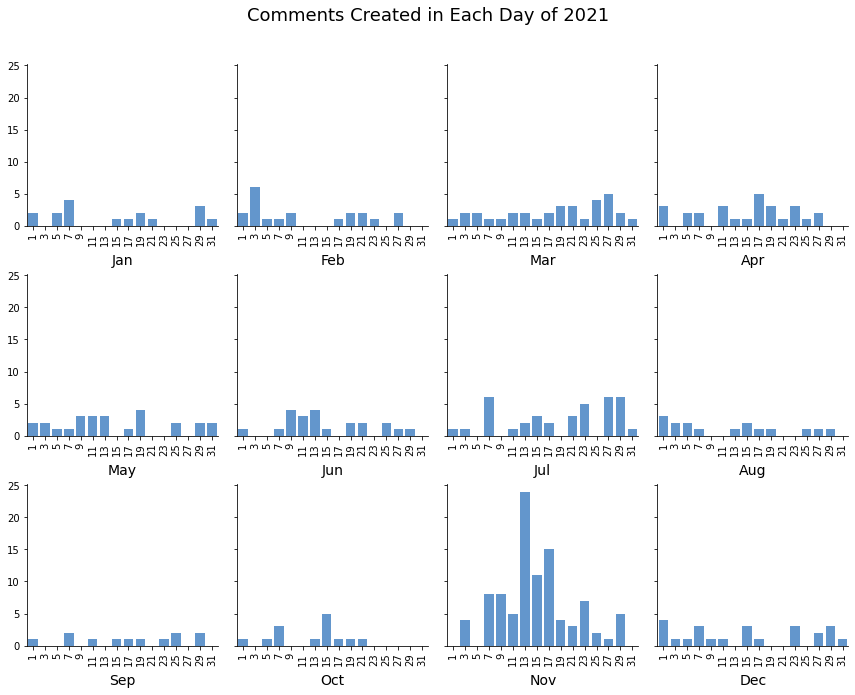

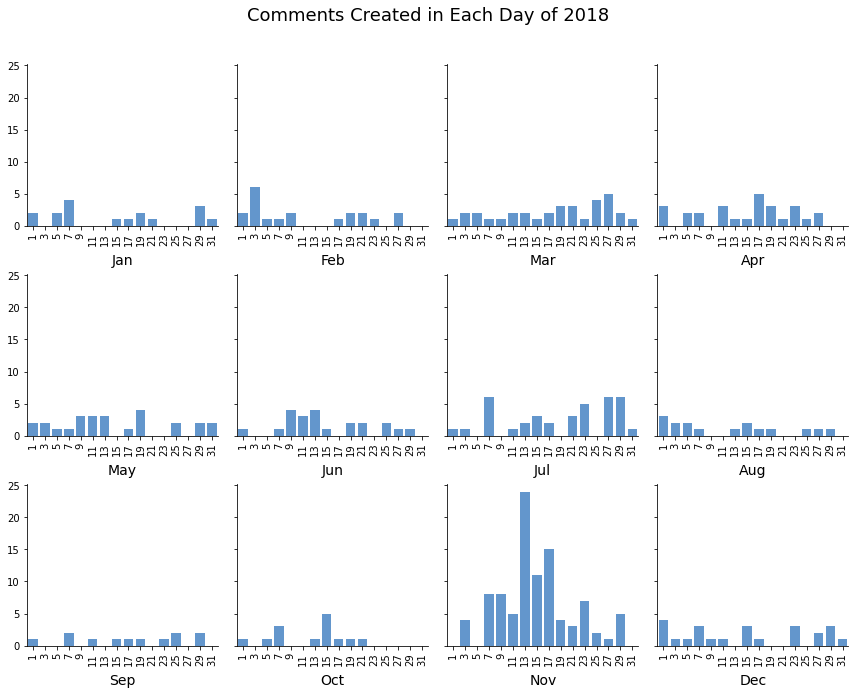

In [74]:
bitch.date_info()

In [75]:
bitch.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
1229089,bitch,2019-03-08 17:26:20,18026222842118680,0.0,0.0,1985099304046877440,n,5939912790,fan_page_johnny_depp_,False,...,Mar,8,2019-03-08,17,bitch,{'bitch'},0 days 00:00:16,0.0,0.0,0.0
501768,bitch,2019-03-08 17:26:37,17977972660210946,0.0,1.0,1985668774775715584,n,5939912790,fan_page_johnny_depp_,False,...,Mar,8,2019-03-08,17,bitch,{'bitch'},0 days 00:00:17,0.0,0.0,0.0
522123,she is very bitch 🖓🖓🖓🖓🖓💩💩💩💩,2020-04-08 01:34:53,17852283517952664,0.0,0.0,2282245534171745536,n,17436168751,troll.juve,False,...,Apr,8,2020-04-08,1,she is very bitch,{'bitch'},0 days 00:00:15,0.0,0.0,0.0
487558,bitch,2020-05-16 03:22:55,17865379399808328,0.0,0.0,2309988291977200128,n,6888785154,adamelsharkawy_bigz,False,...,May,16,2020-05-16,3,bitch,{'bitch'},0 days 00:00:39,0.0,0.0,0.0
651021,bitch,2020-08-06 20:14:50,17890045375612116,0.0,0.0,2367574519165341696,n,16846227655,lazy.star.arts,False,...,Aug,6,2020-08-06,20,bitch,{'bitch'},0 days 00:00:08,0.0,0.0,0.0
1137802,she’s a bitch,2020-11-08 21:39:57,17872490417046656,0.0,0.0,2437740775658571776,n,8450281000,kiranstauch,False,...,Nov,8,2020-11-08,21,she’s a bitch,{'bitch'},0 days 00:00:32,0.0,0.0,0.0
330085,bitch,2020-11-10 17:34:48,17877023923958774,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,Nov,10,2020-11-10,17,bitch,{'bitch'},0 days 00:00:03,0.0,0.0,0.0
330086,bitch,2020-11-10 17:34:49,17914249486492694,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,Nov,10,2020-11-10,17,bitch,{'bitch'},0 days 00:00:01,0.0,0.0,0.0
330087,bitch,2020-11-10 17:34:51,17868838523068712,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,Nov,10,2020-11-10,17,bitch,{'bitch'},0 days 00:00:02,0.0,0.0,0.0
330088,bitch,2020-11-10 17:34:53,18016508680288180,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,Nov,10,2020-11-10,17,bitch,{'bitch'},0 days 00:00:02,0.0,0.0,0.0


In [76]:
len(bitch.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

9

In [77]:
bitch.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

florachirico             8
fan_page_johnny_depp_    2
mattnash8506             1
troll.juve               1
hamidreza66_.rezapoor    1
adamelsharkawy_bigz      1
kiranstauch              1
kudzmaboss               1
lazy.star.arts           1
Name: username, dtype: int64

In [78]:
bitch.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-10    8
2019-03-08    2
2020-11-13    1
2020-08-06    1
2020-11-14    1
2021-01-06    1
2020-11-08    1
2020-04-08    1
2020-05-16    1
Name: date, dtype: int64

In [79]:
list(bitch.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['florachirico',
 'fan_page_johnny_depp_',
 'mattnash8506',
 'troll.juve',
 'hamidreza66_.rezapoor',
 'adamelsharkawy_bigz',
 'kiranstauch',
 'kudzmaboss',
 'lazy.star.arts']

<a id='abuser'></a>
### abuser
<ul>
<li><a href="#justiceforjohnnydepp">justiceforjohnnydepp</a></li>
<li><a href="#red">red</a></li>
<li><a href="#fuck">fuck</a></li>
<li><a href="#johnnydepp">johnnydepp</a></li>
<li><a href="#amberheardisabuser">amberheardisabuser</a></li>
<li><a href="#bitch">bitch</a></li>
<li><a href="#abuser">abuser</a></li>
</ul>

In [80]:
abuser = SameText(df_comments, "{'abuser'}")

In [81]:
abuser.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour,clean_text,tokens
449,abuser,2020-06-02 03:33:14,17855522417019074,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,https://www.instagram.com/rashidrazarr,2020,Jun,2,2020-06-02,3,abuser,{'abuser'}
634,abuser,2021-01-20 00:04:36,17927162719491116,0.0,0.0,2489954445721169408,n,479691086,theashwindsor,False,https://www.instagram.com/theashwindsor,2021,Jan,20,2021-01-20,0,abuser,{'abuser'}


In [82]:
abuser.n_commnets_unique()

This comment appeared in 202 shape


In [83]:
abuser.shapes(15)

abuser              346
she is an abuser     21
she’s an abuser      20
abuser.              20
#abuser              15
she's an abuser      12
abuser 🤮              7
she’s an abuser.      6
abuser 👎🏿             6
abuser💕               6
abuser!               6
the abuser            5
abuser 🤢              4
an abuser             4
she is a abuser       4
Name: message, dtype: int64

In [84]:
abuser.dates()

2020-11-12    18
2020-11-11    14
2020-02-20    13
2020-02-09    11
2020-11-15     9
              ..
2019-05-09     1
2019-04-11     1
2020-02-29     1
2020-02-25     1
2019-03-17     1
Name: date, Length: 326, dtype: int64

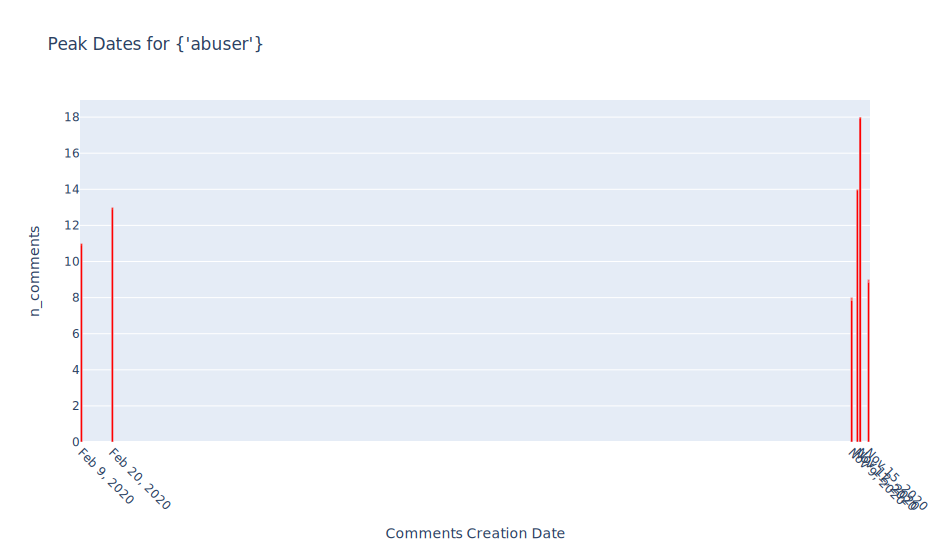

In [85]:
abuser.peak(6)

The commentes were made between 2018-08-01 and  2021-08-27
      n_comments
year            
2018           4
2019          39
2020         469
2021         179


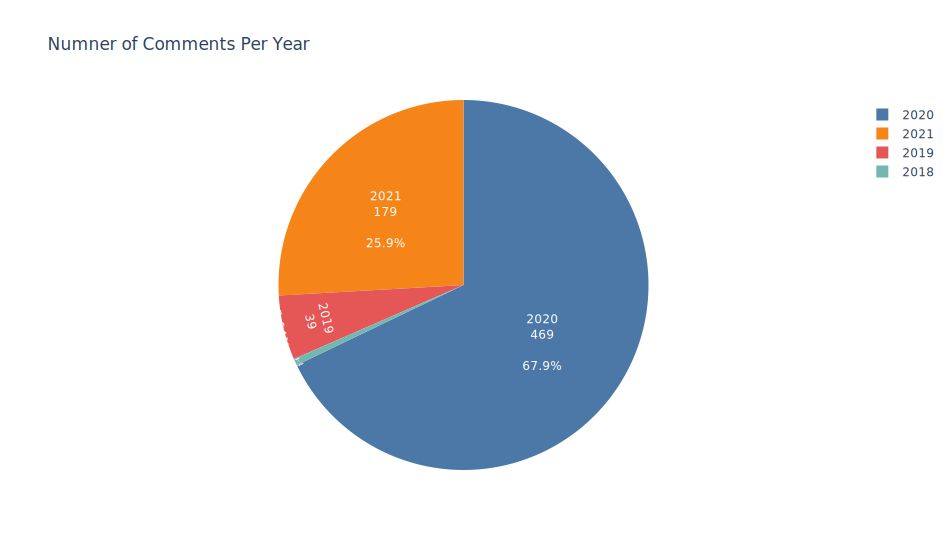

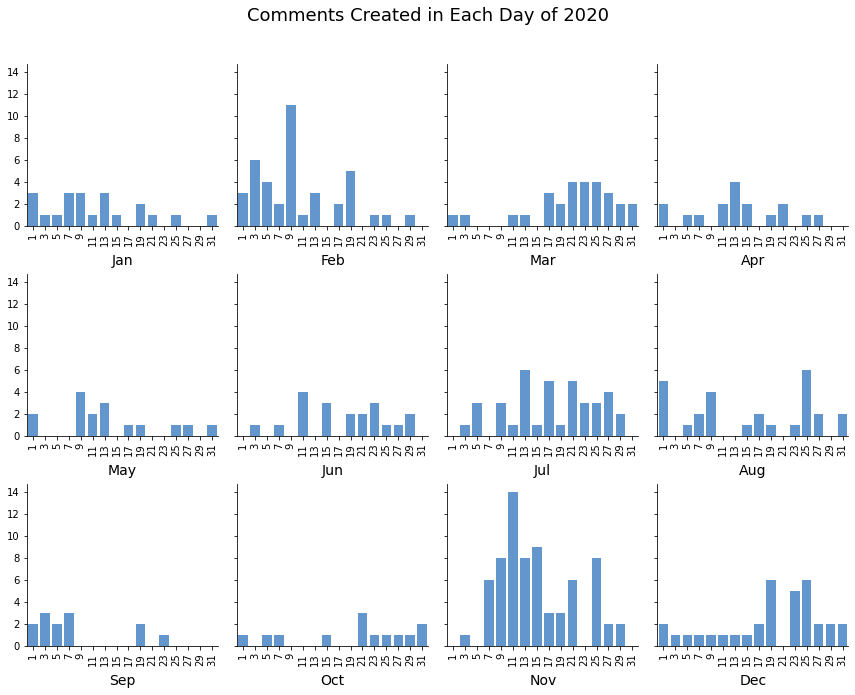

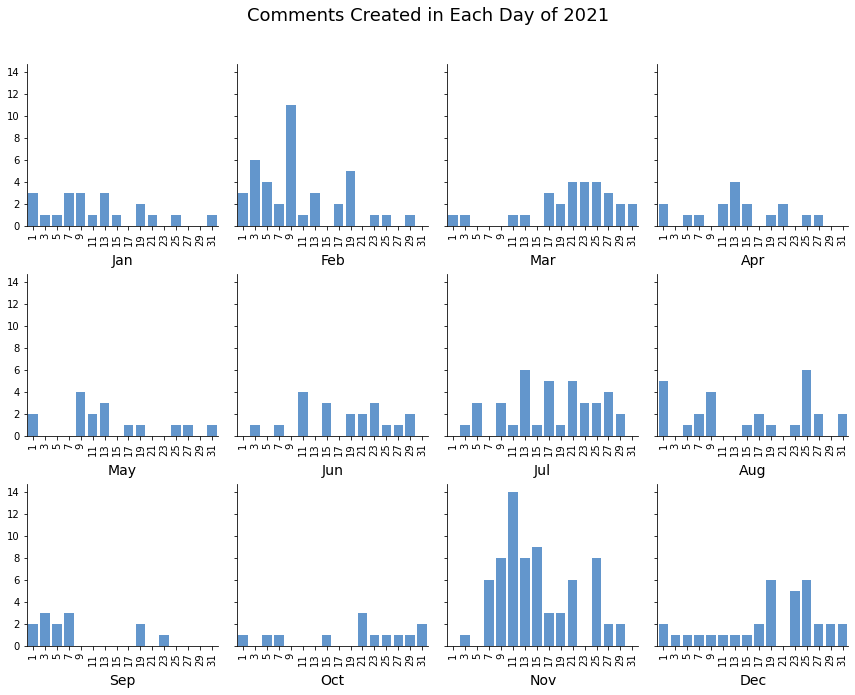

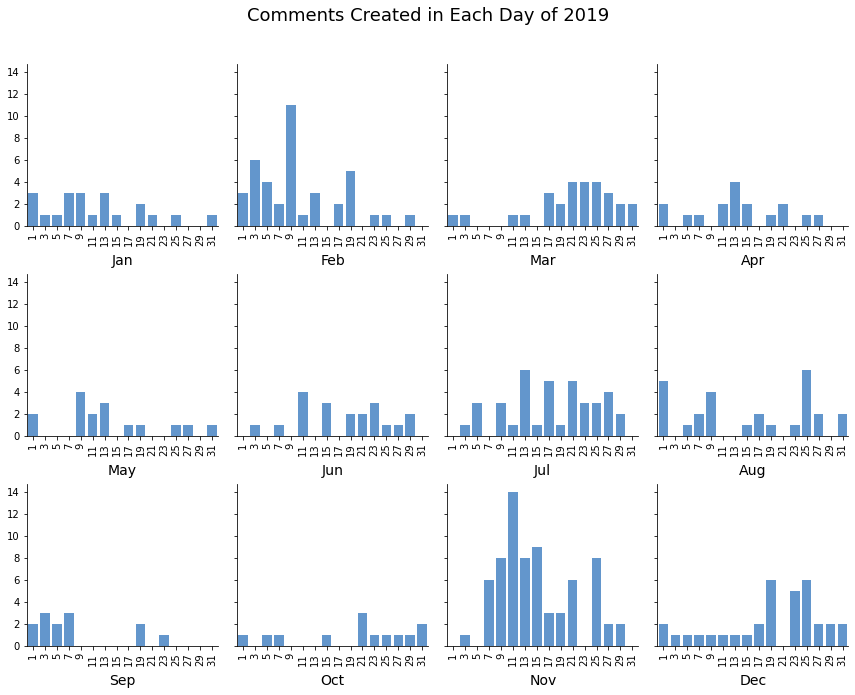

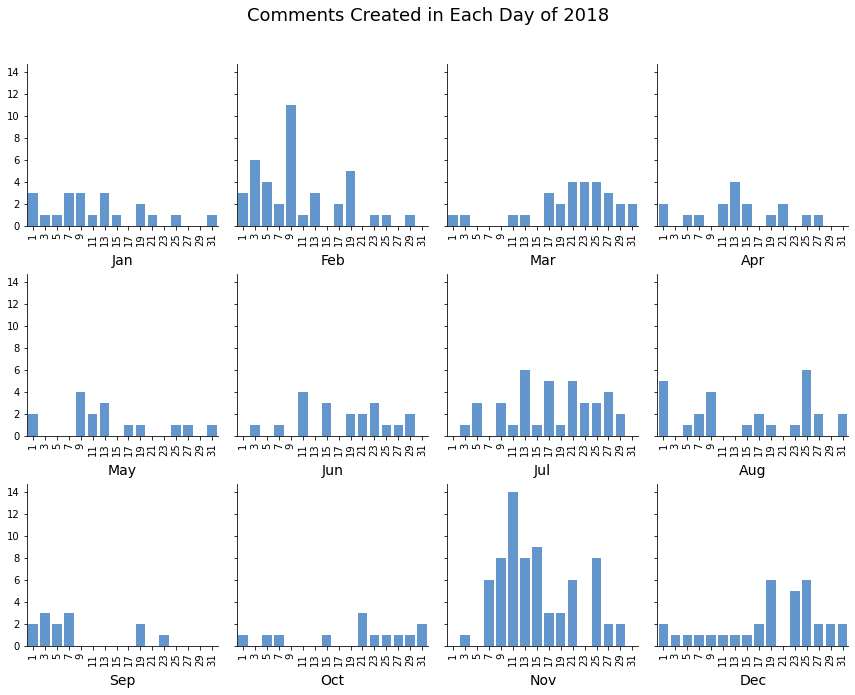

In [86]:
abuser.date_info()

In [87]:
abuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,diff,days,hours,minutes
961414,@ya_itsbianca she’s an abuser,2019-11-10 02:09:35,17882053750444878,NaN,2.0,2172733325314526464,18042982330202736,5638405846,jov4lyfe,True,...,Nov,10,2019-11-10,2,@ya_itsbianca she’s an abuser,{'abuser'},0 days 00:00:28,0.0,0.0,0.0
961399,@roman_reigns4234 she’s an abuser,2019-11-10 02:10:58,17853600715645996,NaN,2.0,2172733325314526464,18080094295189332,5638405846,jov4lyfe,True,...,Nov,10,2019-11-10,2,@roman_reigns4234 she’s an abuser,{'abuser'},0 days 00:00:05,0.0,0.0,0.0
961339,@peppered__ she’s an abuser,2019-11-10 02:11:24,17849732134710176,NaN,0.0,2172733325314526464,18080785786142088,5638405846,jov4lyfe,True,...,Nov,10,2019-11-10,2,@peppered__ she’s an abuser,{'abuser'},0 days 00:00:26,0.0,0.0,0.0
1219184,#abuser,2020-02-02 09:03:38,17870008615589434,0.0,1.0,2234783109899626752,n,10450781962,gravesveraniego,False,...,Feb,2,2020-02-02,9,#abuser,{'abuser'},0 days 00:00:04,0.0,0.0,0.0
107195,abuser,2020-02-06 10:41:05,17844359917945592,0.0,0.0,2237716588123688704,n,4137159689,gentlyhands,False,...,Feb,6,2020-02-06,10,abuser,{'abuser'},0 days 00:00:02,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76576,abuser 👎🏿,2021-06-10 21:11:23,17877183389399918,0.0,0.0,2581080313982604288,n,47047202725,marymagdalene_27,False,...,Jun,10,2021-06-10,21,abuser,{'abuser'},0 days 00:00:37,0.0,0.0,0.0
298765,abuser 👎🏿,2021-06-10 21:11:36,17910745402863866,0.0,0.0,2581236137986890752,n,47047202725,marymagdalene_27,False,...,Jun,10,2021-06-10,21,abuser,{'abuser'},0 days 00:00:13,0.0,0.0,0.0
139561,abuser 🙅🏽‍♀️,2021-06-11 23:30:24,17901408518000848,0.0,0.0,2593008441506973696,n,47047202725,marymagdalene_27,False,...,Jun,11,2021-06-11,23,abuser ‍♀,{'abuser'},0 days 00:00:27,0.0,0.0,0.0
1254521,she’s an abuser.,2021-07-21 00:30:02,17935419472570474,0.0,2.0,2622202537958978560,n,47897666763,jem.weaver,False,...,Jul,21,2021-07-21,0,she’s an abuser.,{'abuser'},0 days 00:00:34,0.0,0.0,0.0


In [88]:
len(abuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

34

In [89]:
abuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

arielapisces                10
lisa_lavaleebaby             6
marymagdalene_27             5
nerheeiram                   3
jov4lyfe                     3
andre_skywalker2005          3
jared_m716                   2
gentlyhands                  2
skseeha                      2
reid.wilks                   2
bby.rona                     2
liloandstitches_             2
beancat42                    2
mvgkg._                      1
shifftychameleon             1
jklockk                      1
jem.weaver                   1
want.it.now.clothing         1
obeymichyydollie             1
amndme                       1
multi.fandoom.aesthetics     1
conor_longley_               1
catartresse                  1
babygirltashx                1
jdjazmin12                   1
timv777                      1
mxhaliaa                     1
lina.pulatova                1
macthamenace                 1
gravesveraniego              1
georgebouaoun                1
marie_kennedyxx              1
archknig

In [90]:
abuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-02-20    10
2020-11-12     8
2021-06-10     4
2020-11-13     3
2020-12-10     3
2019-11-10     3
2020-11-11     3
2021-01-12     2
2020-12-25     2
2020-12-14     2
2020-09-07     2
2020-03-04     2
2020-02-06     2
2020-02-14     1
2021-01-09     1
2020-11-10     1
2020-02-09     1
2020-11-21     1
2020-08-09     1
2021-06-11     1
2020-11-15     1
2020-09-19     1
2020-08-25     1
2021-07-26     1
2020-11-28     1
2020-11-29     1
2020-02-02     1
2021-01-20     1
2020-12-23     1
2020-11-20     1
2021-01-01     1
2021-07-21     1
Name: date, dtype: int64

In [91]:
list(abuser.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['arielapisces',
 'lisa_lavaleebaby',
 'marymagdalene_27',
 'nerheeiram',
 'jov4lyfe',
 'andre_skywalker2005',
 'jared_m716',
 'gentlyhands',
 'skseeha',
 'reid.wilks',
 'bby.rona',
 'liloandstitches_',
 'beancat42',
 'mvgkg._',
 'shifftychameleon',
 'jklockk',
 'jem.weaver',
 'want.it.now.clothing',
 'obeymichyydollie',
 'amndme',
 'multi.fandoom.aesthetics',
 'conor_longley_',
 'catartresse',
 'babygirltashx',
 'jdjazmin12',
 'timv777',
 'mxhaliaa',
 'lina.pulatova',
 'macthamenace',
 'gravesveraniego',
 'georgebouaoun',
 'marie_kennedyxx',
 'archknightt',
 'afh.zl']

### Languages

In [92]:
df_comments['clean_text']

0          #scarlettjohansson #alexandradaddario #emiliac...
1                       very beautiful i love you very much 
2                                              bombón bello 
3                                                   stunning
4                                      why are you so sweet?
                                 ...                        
1434513                              hermosa como una diosa 
1434514    truly the most beautiful sexiest lady in this ...
1434515                                                 damn
1434516                                            beautiful
1434517                                                  wow
Name: clean_text, Length: 1434518, dtype: object

In [93]:
df_comments['clean_text'].head(100).apply(lambda x: TextBlob(x).detect_language() if len(x) >= 3 else 'unknown').value_counts()

en         65
es          8
unknown     7
ar          7
fr          2
fa          2
pt          2
it          2
co          1
su          1
jw          1
hu          1
ja          1
Name: clean_text, dtype: int64

## Sentiment Analysis

In [94]:
sia = SentimentIntensityAnalyzer()

In [95]:
sia.polarity_scores("liar")

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5106}

In [96]:
top = get_top(df_comments, 'tokens', 100, 'token_of_repeated_text', 'n_coments')[1:]

In [97]:
top['token_of_repeated_text'] = top['token_of_repeated_text'].map(ast.literal_eval)

In [98]:
top['len'] = top['token_of_repeated_text'].map(len)

In [99]:
top = top.query("len==1")

In [100]:
top['sen'] = top.query("len==1").token_of_repeated_text.apply(lambda x: list(x)[0]).map(sia.polarity_scores)

In [101]:
top['sen'][1]

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}

In [102]:
top['neg'] = top['sen'].apply(lambda x: x['neg'])
top['pos'] = top['sen'].apply(lambda x: x['pos'])
top['neu'] = top['sen'].apply(lambda x: x['neu'])
top['compound'] = top['sen'].apply(lambda x: x['compound'])
top.drop(columns=['sen'], inplace=True)

In [103]:
top.query('neg==1')

,token_of_repeated_text,n_coments,len,neg,pos,neu,compound
45,{fuck},988,1,1.0,0.0,0.0,-0.5423
64,{abuser},691,1,1.0,0.0,0.0,-0.5574
66,{damn},656,1,1.0,0.0,0.0,-0.4019
67,{bitch},635,1,1.0,0.0,0.0,-0.5859
81,{wtf},515,1,1.0,0.0,0.0,-0.5859


In [104]:
df_comments['nltk'] = df_comments.clean_text.map(sia.polarity_scores)

In [105]:
df_comments['neg'] = df_comments['nltk'].apply(lambda x: x['neg'])
df_comments['neu'] = df_comments['nltk'].apply(lambda x: x['neu'])
df_comments['pos'] = df_comments['nltk'].apply(lambda x: x['pos'])

In [106]:
neg = df_comments.query("neg > 0.7")
neg.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
140,damn❤️🔥,2021-05-26 18:20:41,17904712792912808,1.0,1.0,2582226441222863360,n,27603887986,kabirloveswaffles,False,...,May,26,2021-05-26,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
311,fuck no!,2021-03-11 01:14:12,17908887253671416,0.0,0.0,2507566752144024576,n,42788636,chris_california__831,False,...,Mar,11,2021-03-11,1,fuck no!,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
449,abuser,2020-06-02 03:33:14,17855522417019074,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,...,Jun,2,2020-06-02,3,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
450,maniac,2020-06-02 03:33:26,17907048154443380,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,...,Jun,2,2020-06-02,3,maniac,{'maniac'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
470,damn😍,2019-10-03 18:23:17,17876322472443392,0.0,0.0,2145406120948505600,n,7761050186,heavenlyjelena,False,...,Oct,3,2019-10-03,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0


In [107]:
get_top(neg, 'tokens', 50, 'token_of_repeated_text', 'n_coments')

,token_of_repeated_text,n_coments
0,set(),2303
1,{'fuck'},736
2,{'damn'},579
3,{'bitch'},536
4,{'abuser'},492
5,{'wtf'},430
6,{'fake'},325
7,"{'bitch', 'fuck'}",211
8,{'disgusting'},206
9,{'hell'},161


In [108]:
neg.username.value_counts()

murphydarlene          54
pimp_tee41             46
hosein.sarsam          25
vincentantonygaahl     21
marymagdalene_27       21
                       ..
hamid__hrh              1
lucythelittlecalico     1
mlyrasalviano           1
dukesh_schnei           1
vaneyanezleiva          1
Name: username, Length: 14582, dtype: int64

In [109]:
neg

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
140,damn❤️🔥,2021-05-26 18:20:41,17904712792912808,1.0,1.0,2582226441222863360,n,27603887986,kabirloveswaffles,False,...,May,26,2021-05-26,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
311,fuck no!,2021-03-11 01:14:12,17908887253671416,0.0,0.0,2507566752144024576,n,42788636,chris_california__831,False,...,Mar,11,2021-03-11,1,fuck no!,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
449,abuser,2020-06-02 03:33:14,17855522417019074,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,...,Jun,2,2020-06-02,3,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
450,maniac,2020-06-02 03:33:26,17907048154443380,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,...,Jun,2,2020-06-02,3,maniac,{'maniac'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
470,damn😍,2019-10-03 18:23:17,17876322472443392,0.0,0.0,2145406120948505600,n,7761050186,heavenlyjelena,False,...,Oct,3,2019-10-03,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434245,bad bunny,2021-02-04 23:54:14,17874945044136934,0.0,0.0,2501045780046403072,n,3206506992,rafaomoss,False,...,Feb,4,2021-02-04,23,bad bunny,"{'bunny', 'bad'}","{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0
1434316,@carolinerichardson2 ridiculous 😂,2021-02-04 21:55:01,18181478053068344,NaN,0.0,2501045780046403072,18190860631034288,7900091665,anki.1612,True,...,Feb,4,2021-02-04,21,@carolinerichardson2 ridiculous,"{'carolinerichardson2', 'ridiculous'}","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.714,0.286,0.0
1434388,pwolikku freaky❤️,2018-10-21 09:31:09,17964948715143384,0.0,1.0,1894877819029241600,n,7005260670,anoop_yadhavu,False,...,Oct,21,2018-10-21,9,pwolikku freaky,"{'freaky', 'pwolikku'}","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.714,0.286,0.0
1434441,fuck you bitch go to hell #justiceforjohnnydepp,2020-04-15 06:12:53,17879018464594864,0.0,2.0,2287184439750218496,n,28958908275,sexion31,False,...,Apr,15,2020-04-15,6,fuck you bitch go to hell #justiceforjohnnydepp,"{'fuck', 'go', 'bitch', 'justiceforjohnnydepp'...","{'neg': 0.748, 'neu': 0.252, 'pos': 0.0, 'comp...",0.748,0.252,0.0


In [110]:
neg[neg.tokens.str.contains(r'amber')]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
1939,amber shit,2021-02-04 11:32:50,17882188013022344,0.0,0.0,2501470194445040128,n,4614822272,mhhch,False,...,Feb,4,2021-02-04,11,amber shit,"{'amber', 'shit'}","{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'comp...",0.783,0.217,0.0
9480,fuck amber,2020-09-06 02:50:31,17877846082810788,0.0,0.0,2390110189421393920,n,3980632071,jess_the_mess77,False,...,Sep,6,2020-09-06,2,fuck amber,"{'amber', 'fuck'}","{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0
18334,i hate amber👿👿👿👿👿👿👿👿,2020-07-06 09:09:36,17872784506811200,2.0,2.0,2346596933296266752,n,36883362954,johnnydepp_fan1jd,False,...,Jul,6,2020-07-06,9,i hate amber,"{'hate', 'amber'}","{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'comp...",0.787,0.213,0.0
18376,@amberheard fuck u bitch,2020-07-05 18:00:31,17852571080106452,0.0,0.0,2346596933296266752,n,36392220999,sherlockfanzone,False,...,Jul,5,2020-07-05,18,@amberheard fuck u bitch,"{'bitch', 'amberheard', 'fuck'}","{'neg': 0.88, 'neu': 0.12, 'pos': 0.0, 'compou...",0.880,0.120,0.0
19164,fuck amber,2021-08-09 12:13:23,17897092082298220,0.0,0.0,2610340800944475136,n,12734794317,raha1379f,False,...,Aug,9,2021-08-09,12,fuck amber,"{'amber', 'fuck'}","{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401194,fu amber,2020-07-23 00:32:09,17857020359092794,0.0,1.0,2359083540417978368,n,17652296508,h.o.s.e.n.82,False,...,Jul,23,2020-07-23,0,fu amber,{'amber'},"{'neg': 0.825, 'neu': 0.175, 'pos': 0.0, 'comp...",0.825,0.175,0.0
1405709,wtf bitch ? @amberheard,2020-12-15 15:36:04,18048132517279692,0.0,0.0,2459030980178097152,n,3882185411,alirezw_ft,False,...,Dec,15,2020-12-15,15,wtf bitch ? @amberheard,"{'wtf', 'bitch', 'amberheard'}","{'neg': 0.884, 'neu': 0.116, 'pos': 0.0, 'comp...",0.884,0.116,0.0
1415519,hell to the yes!!!! fuck that cunt @amberheard,2020-06-04 05:41:51,17843569601200772,0.0,0.0,2323465097073564672,n,182133842,blancanieves4,False,...,Jun,4,2020-06-04,5,hell to the yes!!!! fuck that cunt @amberheard,"{'cunt', 'yes', 'amberheard', 'fuck', 'hell'}","{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...",0.714,0.286,0.0
1427306,fuck amber,2020-09-07 23:28:55,17937578911390648,0.0,0.0,2393053123253973504,n,2957662025,blacknwhite_wishes,False,...,Sep,7,2020-09-07,23,fuck amber,"{'amber', 'fuck'}","{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0


In [111]:
neg[neg.tokens.str.contains(r'amber')].username.value_counts()

dana__milash                14
depptime_                    8
marymagdalene_27             5
val.verhoeff                 4
natchayaleejin               3
                            ..
tayibaxo                     1
grandpas_lost_wheelchair     1
sad_nibba17                  1
goddess_del_rey_             1
roswithaewald                1
Name: username, Length: 472, dtype: int64

In [112]:
neg[neg.tokens.str.contains(r'amber')].tokens.value_counts()

{'amber', 'fuck'}                                                                              137
{'amberheard', 'fuck'}                                                                          39
{'kill', 'amber'}                                                                               26
{'hate', 'amber'}                                                                               25
{'bitch', 'amber'}                                                                              19
                                                                                              ... 
{'scumbag', 'domestic', 'amber', 'turd', 'abusing'}                                              1
{'make', 'suffer', 'wht', 'domestic', 'amber', 'ass', 'bitch', 'violence', 'johny', 'fuck'}      1
{'disgusting', 'abuser', 'amber', 'heard'}                                                       1
{'lying', 'amberheard'}                                                                          1
{'nasty', 

In [113]:
neg[neg.tokens.str.contains(r'dep')].tokens.value_counts()

{'bitch', 'justiceforjohnnydepp', 'fuck'}                9
{'abuser', 'justiceforjohnnydepp'}                       6
{'kill', 'amber', 'justiceforjohnnydepp'}                3
{'bitch', 'justiceforjohnnydepp'}                        3
{'liar', 'justiceforjohnnydepp'}                         3
                                                        ..
{'waste', 'justiceforjohnnydepp', 'evil', 'space'}       1
{'justiceforjohnnydepp', 'bullshit'}                     1
{'johnny', 'hate', 'johnnydepp', 'love', 'poor'}         1
{'bitch', 'abused', 'johnny', 'depp'}                    1
{'justiceforjohnnydepp', 'little', 'whore', 'coward'}    1
Name: tokens, Length: 66, dtype: int64

In [114]:
neg['datetime'] = pd.to_datetime(neg["datetime"])

In [115]:
neg = neg.sort_values("datetime")

In [116]:
neg[neg.tokens == "{'amber', 'fuck'}"].datetime.diff().dt.components.iloc[:, 0:3].query('days==0 and hours == 0')

,days,hours,minutes
1344623,0.0,0.0,1.0
376056,0.0,0.0,20.0
89096,0.0,0.0,0.0
1357662,0.0,0.0,57.0
1259490,0.0,0.0,31.0
900111,0.0,0.0,53.0


In [119]:
neg["datetime"] = pd.to_datetime(neg["datetime"])
neg = neg.sort_values("datetime")
neg["diff"] = neg.datetime.diff()
neg = pd.concat([neg, neg["diff"].dt.components.iloc[:, 0:3]], axis=1)

In [120]:
neg.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
1010484,fake,2016-11-24 04:37:23,17844671281151890,0.0,0.0,1389984234218743040,n,2049928720,umadbro__okay,False,...,fake,{'fake'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,NaT,NaN,NaN,NaN
578188,@87eomma dead! 😂😂😂,2017-11-20 18:19:55,17912895229037640,NaN,1.0,1652293776704360704,17902744924068104,316472313,dameriqac,True,...,@87eomma dead!,"{'dead', '87eomma'}","{'neg': 0.821, 'neu': 0.179, 'pos': 0.0, 'comp...",0.821,0.179,0.0,361 days 13:42:32,361.0,13.0,42.0
250843,very dangers,2018-03-05 17:33:18,17910399265089244,0.0,0.0,1728381924458930432,n,6640469970,s_i_sachin,False,...,very dangers,{'dangers'},"{'neg': 0.777, 'neu': 0.223, 'pos': 0.0, 'comp...",0.777,0.223,0.0,104 days 23:13:23,104.0,23.0,13.0
599334,savage 101,2018-03-13 03:33:16,17930108311017120,0.0,0.0,1733766274968111104,n,313841074,wthomas80,False,...,savage 101,"{'savage', '101'}","{'neg': 0.75, 'neu': 0.25, 'pos': 0.0, 'compou...",0.750,0.250,0.0,7 days 09:59:58,7.0,9.0,59.0
599336,dead 😂😂💀,2018-03-13 03:49:17,17902420786157408,0.0,0.0,1733766274968111104,n,5682117369,5kylah_,False,...,dead,{'dead'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:16:01,0.0,0.0,16.0


In [124]:
get_top(neg, 'tokens', 50, 'token_of_repeated_text', 'n_coments')[1:]

,token_of_repeated_text,n_coments
1,{'fuck'},736
2,{'damn'},579
3,{'bitch'},536
4,{'abuser'},492
5,{'wtf'},430
6,{'fake'},325
7,"{'bitch', 'fuck'}",211
8,{'disgusting'},206
9,{'hell'},161
10,{'gross'},147


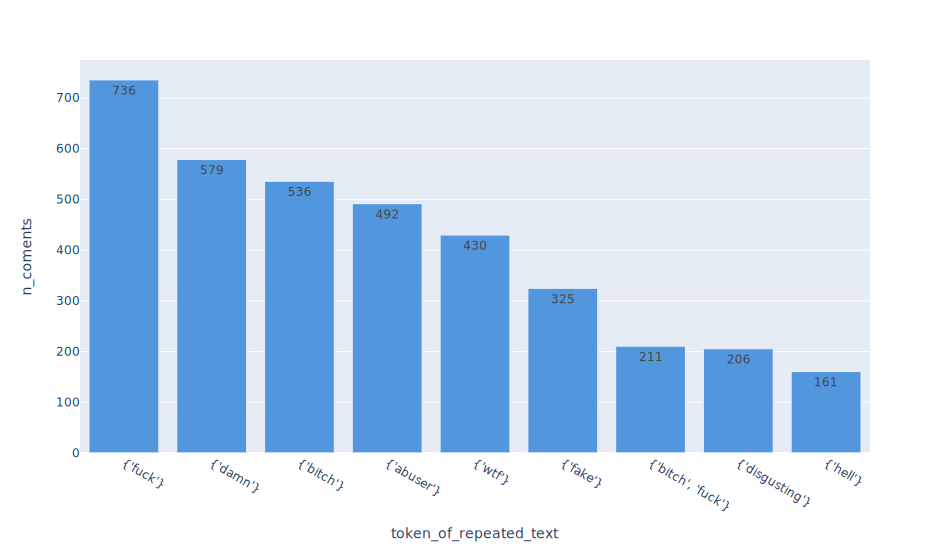

In [125]:
bar(get_top(neg, 'tokens', 10, 'token_of_repeated_text', 'n_coments')[1:], 'token_of_repeated_text', 'n_coments', 'a')

<a id='fuck'></a>
### fuck
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [126]:
fuc = SameText(df_comments, "{'fuck'}")

In [127]:
fuc.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
311,fuck no!,2021-03-11 01:14:12,17908887253671416,0.0,0.0,2507566752144024576,n,42788636,chris_california__831,False,...,Mar,11,2021-03-11,1,fuck no!,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
6707,fuck,2018-03-24 18:37:00,17927802805067942,0.0,0.0,1741639216007327744,n,4134100562,mannydworld,False,...,Mar,24,2018-03-24,18,fuck,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0


In [128]:
fuc.n_commnets_unique()

This comment appeared in 384 shape


In [129]:
fuc.shapes(15)

fuck her         185
fuck              80
fuck no           75
fuck you          63
fuck off          47
what the fuck     39
fuck that         17
fuck u            15
fuck her.          9
fuck no!           8
fuck it            7
fuck this          6
the fuck?          5
fuck her!          5
fuck 🔥             5
Name: message, dtype: int64

In [130]:
fuc.dates()

2020-11-13    48
2020-11-24    19
2020-11-14    19
2020-12-14    19
2020-11-23    18
              ..
2020-07-15     1
2019-01-02     1
2021-06-30     1
2020-06-02     1
2020-05-21     1
Name: date, Length: 427, dtype: int64

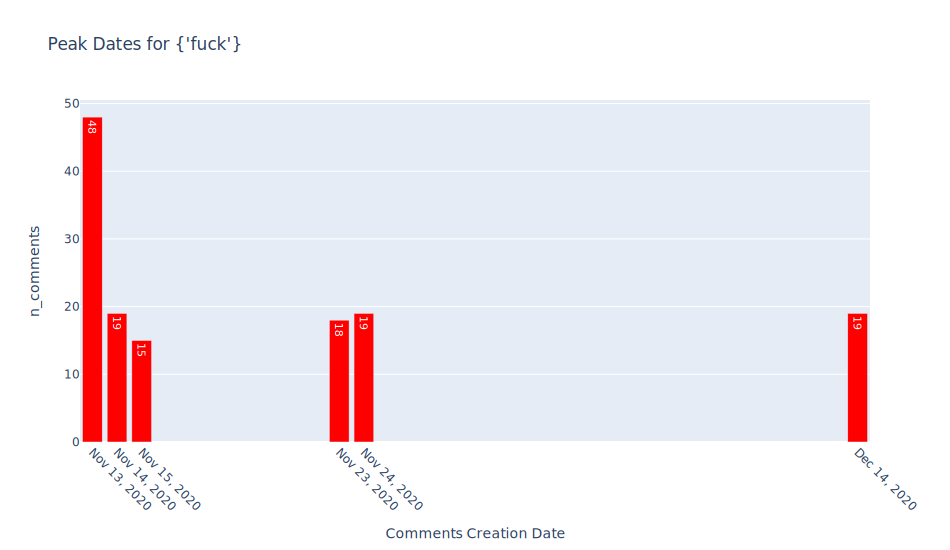

In [131]:
fuc.peak(6)

The commentes were made between 2018-03-14 and  2021-08-06
      n_comments
year            
2018         116
2019          86
2020         580
2021         206


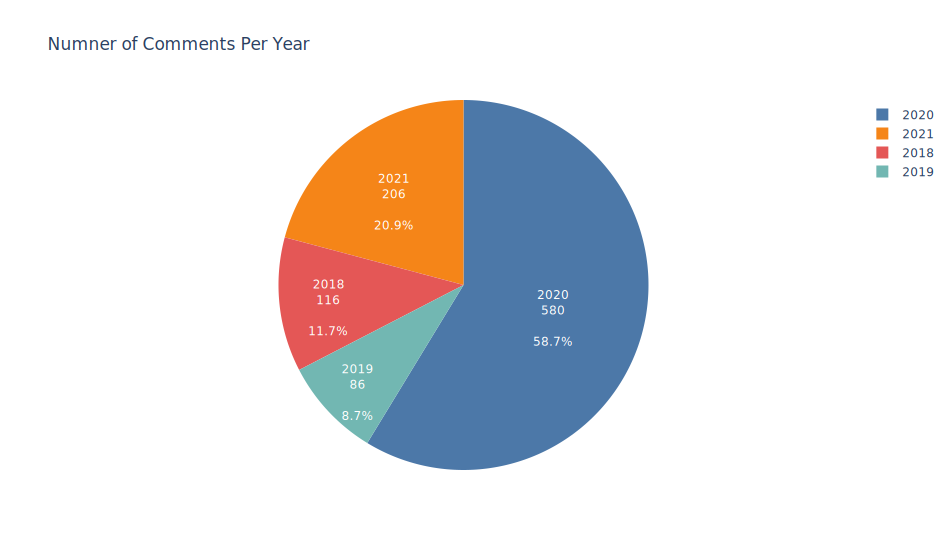

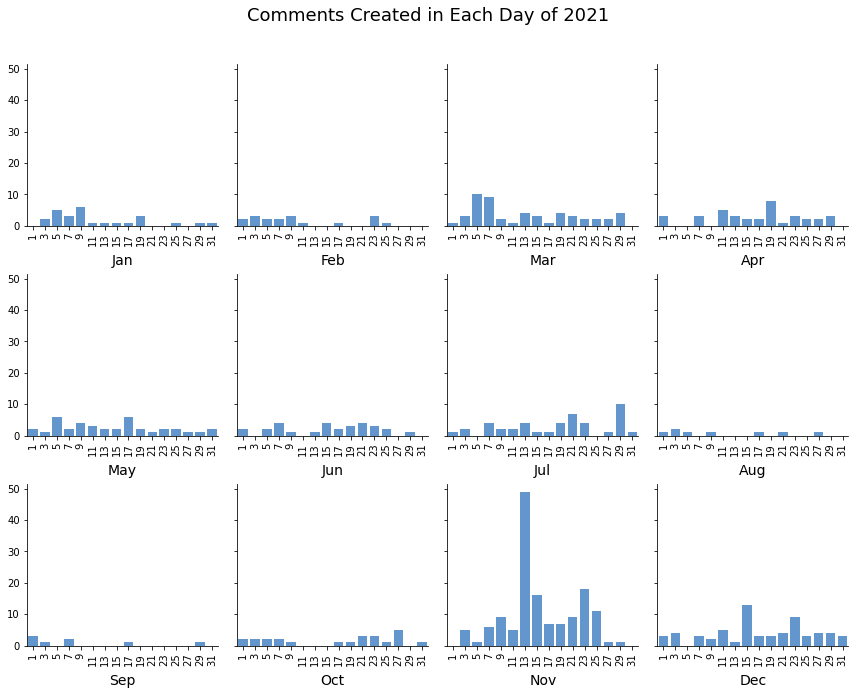

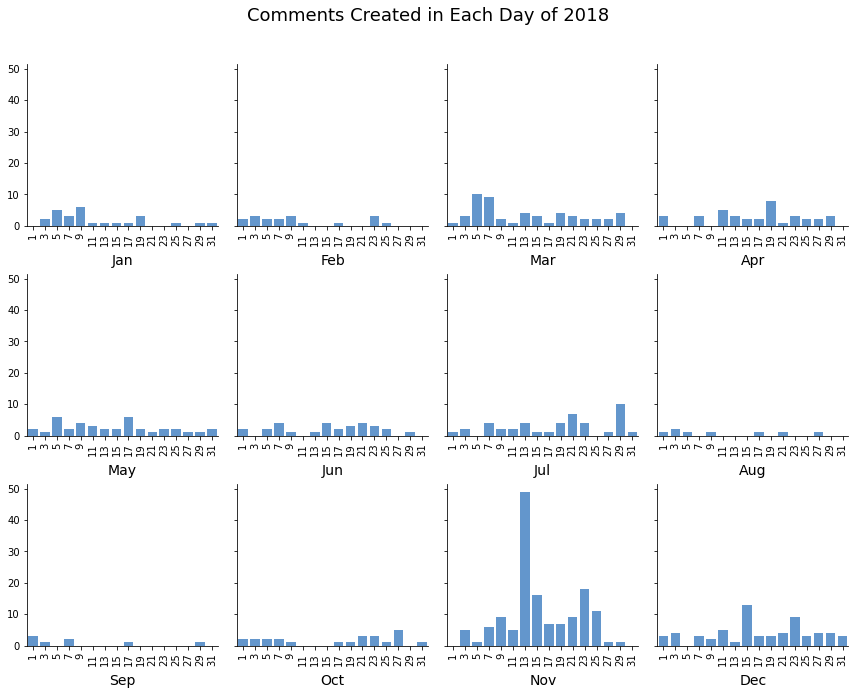

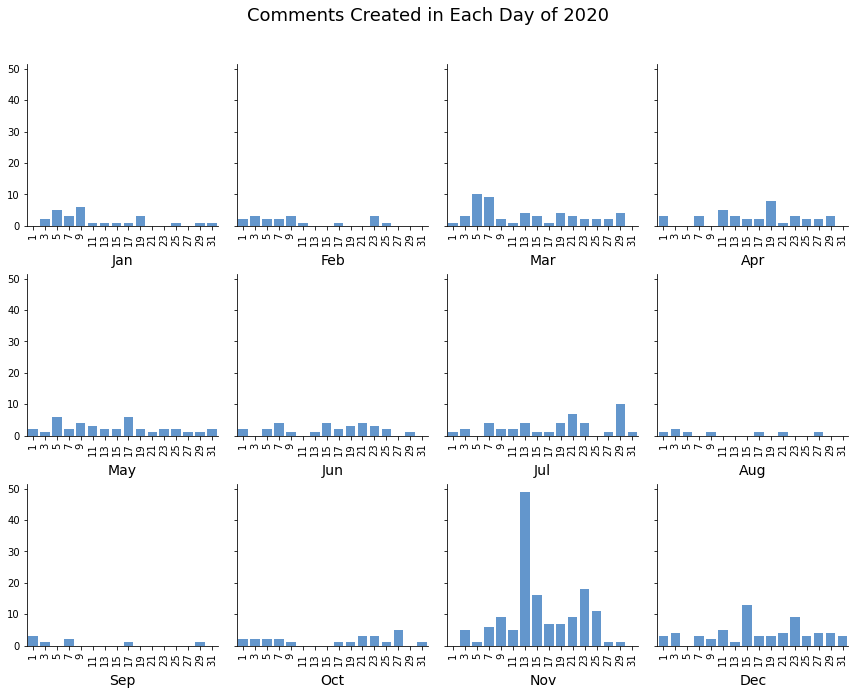

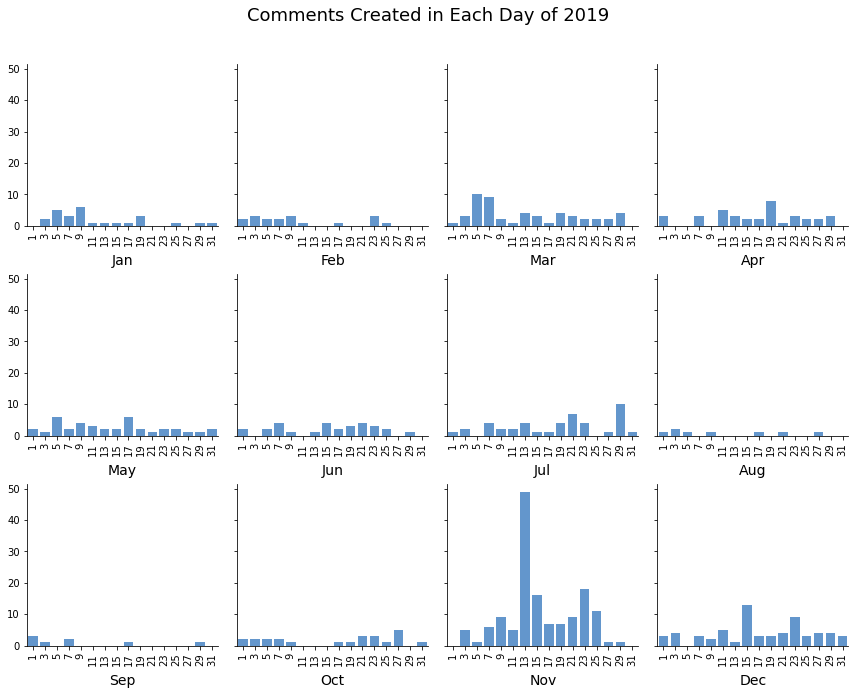

In [132]:
fuc.date_info()

In [134]:
fuc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
703998,fuck this. no.,2018-07-30 15:21:32,17944113784085700,0.0,1.0,1834884415730529024,n,4002550560,just.dc.comics,False,...,fuck this. no.,{'fuck'},"{'neg': 0.851, 'neu': 0.149, 'pos': 0.0, 'comp...",0.851,0.149,0.0,0 days 00:00:18,0.0,0.0,0.0
1247110,fuck,2019-02-04 06:31:55,17856355063328028,0.0,1.0,1971465053200510976,n,6291112232,mystical_petrova,False,...,fuck,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:04,0.0,0.0,0.0
1294808,what the fuck😐,2020-07-08 19:45:53,17850358628163166,0.0,0.0,2348863105612431872,n,27222255411,bieberdepp,False,...,what the fuck,{'fuck'},"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.364,0.0,0 days 00:00:00,0.0,0.0,0.0
613643,fuck you,2020-07-29 09:04:09,17848061804236980,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,fuck you,{'fuck'},"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0,0 days 00:00:02,0.0,0.0,0.0
613644,fuck you,2020-07-29 09:04:13,18154117582033700,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,fuck you,{'fuck'},"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0,0 days 00:00:04,0.0,0.0,0.0
613645,fuck her,2020-07-29 09:04:14,18146180068069228,0.0,0.0,2358886038704110592,n,4521967692,anthony.apel,False,...,fuck her,{'fuck'},"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",0.778,0.222,0.0,0 days 00:00:01,0.0,0.0,0.0
993275,fuck u,2020-08-24 20:22:30,17864863436020180,0.0,0.0,2376909184569769472,n,38713622568,loneshamim_official,False,...,fuck u,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:09,0.0,0.0,0.0
662768,fuck,2020-10-01 02:17:16,17846737325367284,0.0,0.0,2385017715847743488,n,42829694287,sara22wslp,False,...,fuck,{'fuck'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:08,0.0,0.0,0.0
701880,what the fuck,2020-11-13 00:50:42,17859633350266608,0.0,6.0,2441092489643747840,n,5988213152,dantepetrella,False,...,what the fuck,{'fuck'},"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.364,0.0,0 days 00:00:05,0.0,0.0,0.0
701712,fuck em then,2020-11-13 01:47:12,17861091788236036,0.0,0.0,2441092489643747840,n,2242147210,cali2approv3d,False,...,fuck em then,{'fuck'},"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.364,0.0,0 days 00:00:50,0.0,0.0,0.0


In [135]:
len(fuc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

17

In [136]:
fuc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

hosein.sarsam          15
anthony.apel            3
andmen.1998             2
mobina.n.motammed       1
twoguysoneticket1       1
sara22wslp              1
call.me.chelse          1
mystical_petrova        1
bieberdepp              1
cali2approv3d           1
dantepetrella           1
_.adnaaan__             1
loneshamim_official     1
allison_overby          1
thealifaryan            1
just.dc.comics          1
fuckfaza                1
Name: username, dtype: int64

In [137]:
fuc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2021-03-07    7
2020-11-13    4
2020-07-29    3
2021-04-11    2
2021-04-14    2
2021-03-05    2
2020-11-28    2
2020-12-14    2
2020-11-18    1
2018-07-30    1
2020-08-24    1
2021-05-26    1
2020-07-08    1
2020-10-01    1
2021-03-19    1
2019-02-04    1
2021-07-22    1
2021-04-02    1
Name: date, dtype: int64

In [138]:
list(fuc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['hosein.sarsam',
 'anthony.apel',
 'andmen.1998',
 'mobina.n.motammed',
 'twoguysoneticket1',
 'sara22wslp',
 'call.me.chelse',
 'mystical_petrova',
 'bieberdepp',
 'cali2approv3d',
 'dantepetrella',
 '_.adnaaan__',
 'loneshamim_official',
 'allison_overby',
 'thealifaryan',
 'just.dc.comics',
 'fuckfaza']

<a id='damn'></a>
### damn
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [146]:
dam = SameText(df_comments, "{'damn'}")

In [147]:
dam.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
140,damn❤️🔥,2021-05-26 18:20:41,17904712792912808,1.0,1.0,2582226441222863360,n,27603887986,kabirloveswaffles,False,...,May,26,2021-05-26,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
470,damn😍,2019-10-03 18:23:17,17876322472443392,0.0,0.0,2145406120948505600,n,7761050186,heavenlyjelena,False,...,Oct,3,2019-10-03,18,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0


In [148]:
dam.n_commnets_unique()

This comment appeared in 286 shape


In [150]:
dam.shapes(15)

damn        155
damn😉        32
damn!        32
damn!!!      31
damn!!       23
damn🔥        11
damn it      11
damn!!!!     10
damn 😍        8
damn.         8
damn 🔥        8
damn🔥🔥🔥       7
damn❤️💣       7
damn...       5
damn😍         5
Name: message, dtype: int64

In [151]:
dam.dates()

2021-04-24    7
2021-06-17    7
2018-07-21    6
2018-07-19    5
2019-08-26    5
             ..
2018-12-08    1
2021-01-19    1
2020-08-31    1
2020-12-17    1
2020-05-21    1
Name: date, Length: 433, dtype: int64

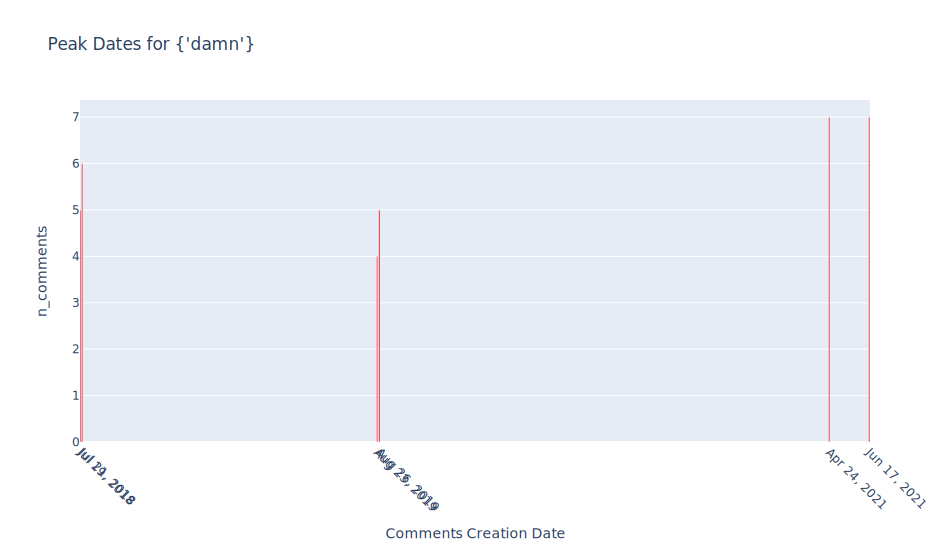

In [152]:
dam.peak(6)

The commentes were made between 2018-03-23 and  2021-07-31
      n_comments
year            
2018          89
2019         181
2020         199
2021         187


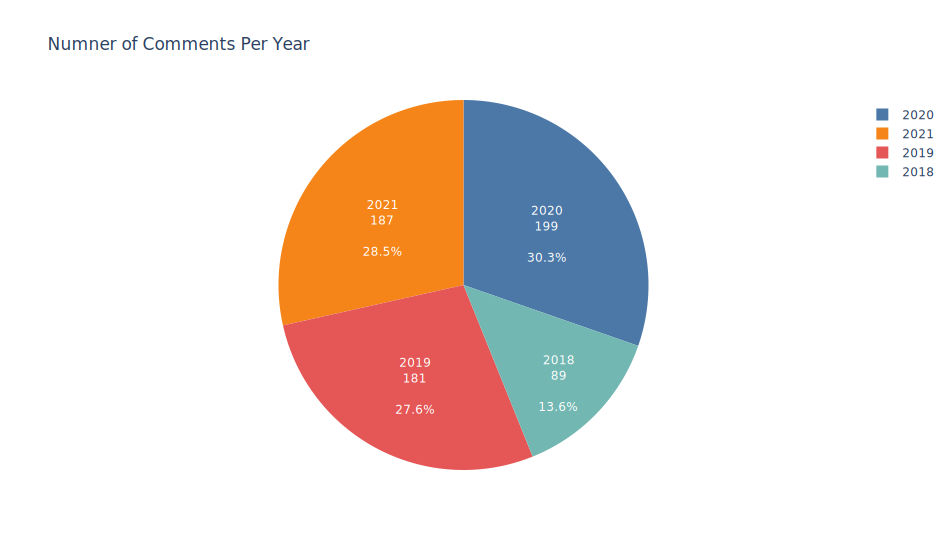

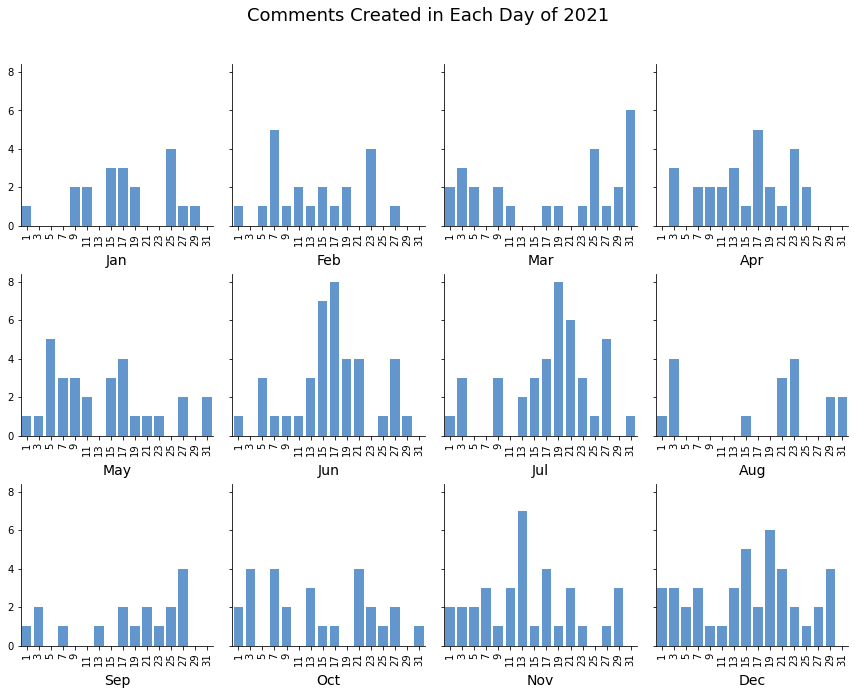

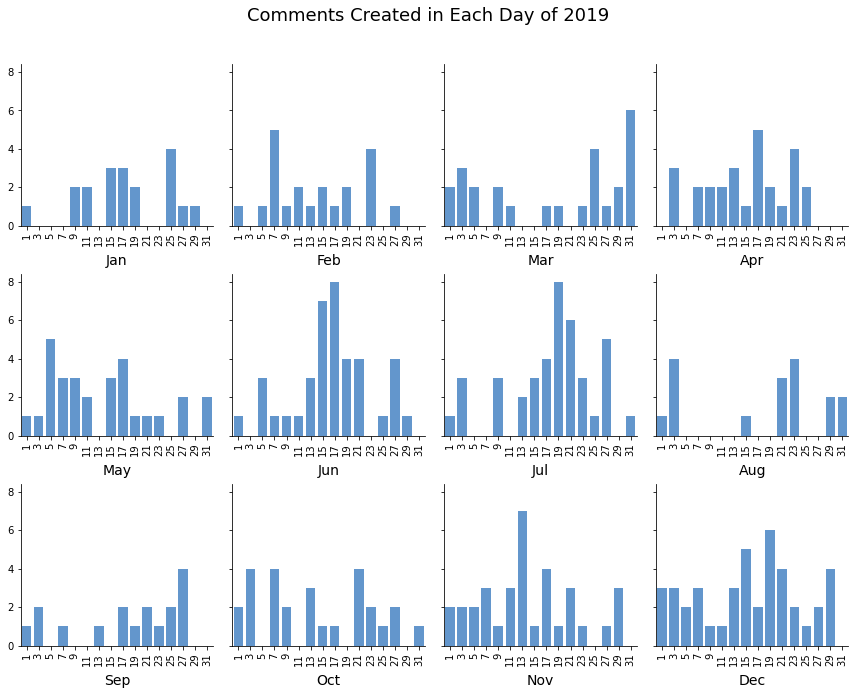

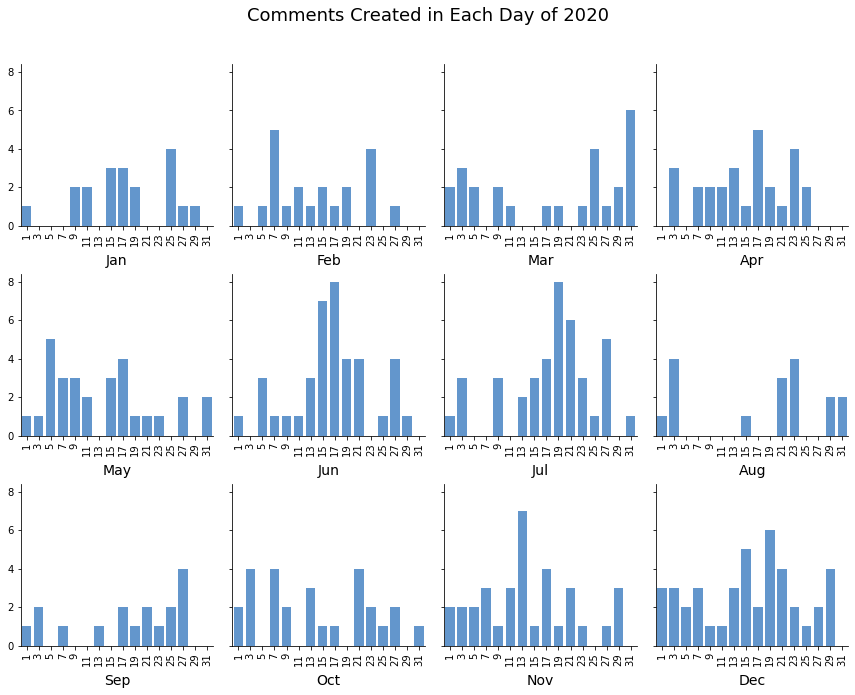

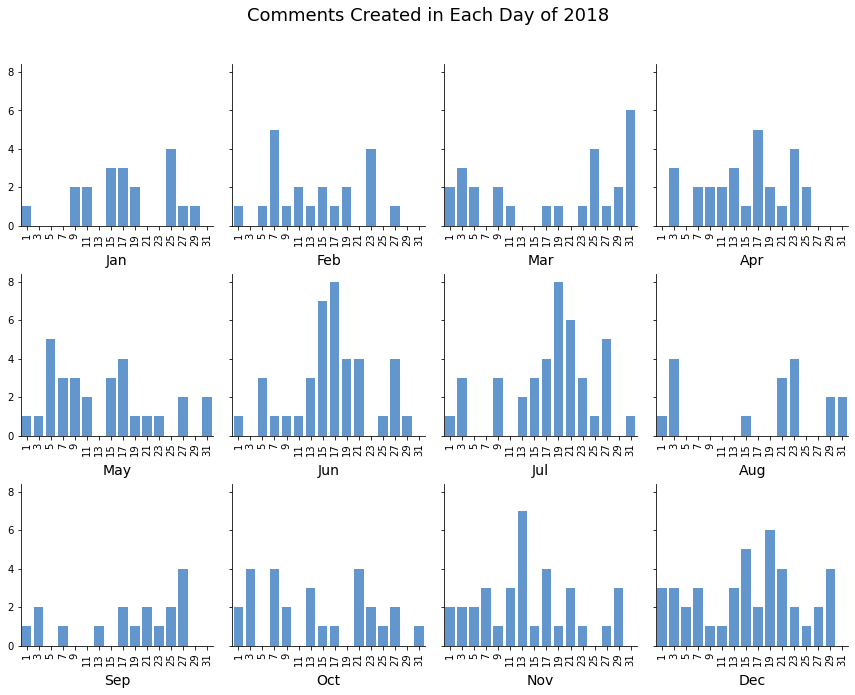

In [153]:
dam.date_info()

In [154]:
dam.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
921381,damn😉,2019-08-23 02:28:13,17847697072575460,0.0,0.0,2116175918099971840,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:15,0.0,0.0,0.0
63039,damn😉,2019-08-23 02:28:26,18069760936127824,0.0,0.0,2116236254990483200,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:13,0.0,0.0,0.0
713769,damn😉,2019-08-26 21:34:34,18085890214075028,0.0,0.0,2119135347741580288,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:11,0.0,0.0,0.0
1346318,damn😉,2019-08-26 21:34:50,17847703870572424,0.0,0.0,2118621731704006656,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:16,0.0,0.0,0.0
166416,damn😉,2019-08-26 21:35:02,17886231325395592,0.0,0.0,2119014510009362176,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:12,0.0,0.0,0.0
568069,damn 😉,2019-10-07 19:04:57,17845763281684488,0.0,0.0,2149515647142236672,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:13,0.0,0.0,0.0
877631,damn😉,2019-10-30 01:18:28,17862478123547150,0.0,0.0,2165460674758409216,n,2520475284,murphydarlene,False,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:15,0.0,0.0,0.0
173323,damn,2021-04-19 20:14:58,17893334963046400,NaN,0.0,2555461911735053824,17934099157511292,15048936134,jjjoutsi,True,...,damn,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:00,0.0,0.0,0.0
836719,damn!!!,2021-04-24 19:48:57,17905888255810280,0.0,0.0,2553322805699350016,n,37232190897,pimp_tee41,False,...,damn!!!,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:13,0.0,0.0,0.0
647391,damn!,2021-04-24 19:49:15,17924095033596504,0.0,0.0,2549752607910161920,n,37232190897,pimp_tee41,False,...,damn!,{'damn'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:18,0.0,0.0,0.0


In [155]:
len(dam.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

4

In [156]:
dam.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

murphydarlene    7
pimp_tee41       5
jjjoutsi         1
stevesaitta      1
Name: username, dtype: int64

In [157]:
dam.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2021-04-24    5
2019-08-26    3
2019-08-23    2
2021-07-03    1
2019-10-30    1
2019-10-07    1
2021-04-19    1
Name: date, dtype: int64

In [160]:
list(dam.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['murphydarlene', 'pimp_tee41', 'jjjoutsi', 'stevesaitta']

<a id='bitch'></a>
### b*tch
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [161]:
bc = SameText(df_comments, "{'bitch'}")

In [162]:
bc.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
2007,😒bitch,2020-05-28 12:33:49,18108118336137032,0.0,0.0,2318954103417754624,n,28017117210,fati._.elf,False,...,May,28,2020-05-28,12,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
13241,bitch,2020-10-02 21:14:21,18121283734084804,0.0,0.0,2410871684390144512,n,21224014173,ariel_d2234,False,...,Oct,2,2020-10-02,21,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0


In [163]:
bc.n_commnets_unique()

This comment appeared in 204 shape


In [164]:
bc.shapes(15)

bitch             305
what a bitch       25
she is a bitch     12
she’s a bitch      11
this bitch         10
such a bitch        9
bitch.              8
that bitch          8
a bitch             6
she's a bitch       6
bitch!              6
the bitch           4
bitch...            4
she is bitch        4
die bitch           4
Name: message, dtype: int64

In [165]:
bc.dates()

2020-11-13    24
2020-11-10    18
2020-11-17    15
2020-11-14    14
2020-11-15    11
              ..
2021-02-28     1
2020-10-21     1
2021-01-31     1
2019-10-19     1
2020-03-22     1
Name: date, Length: 330, dtype: int64

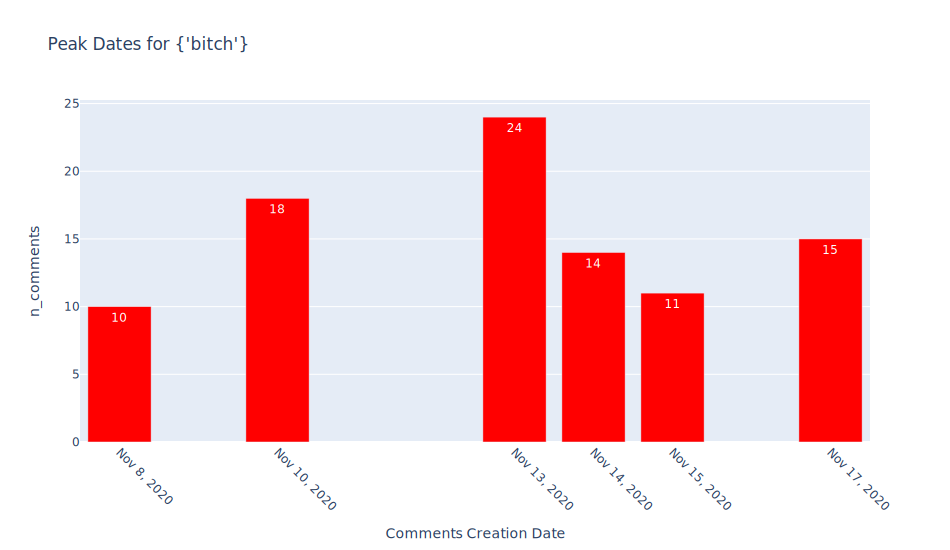

In [166]:
bc.peak(6)

The commentes were made between 2018-03-15 and  2021-07-27
      n_comments
year            
2018          24
2019          49
2020         439
2021         123


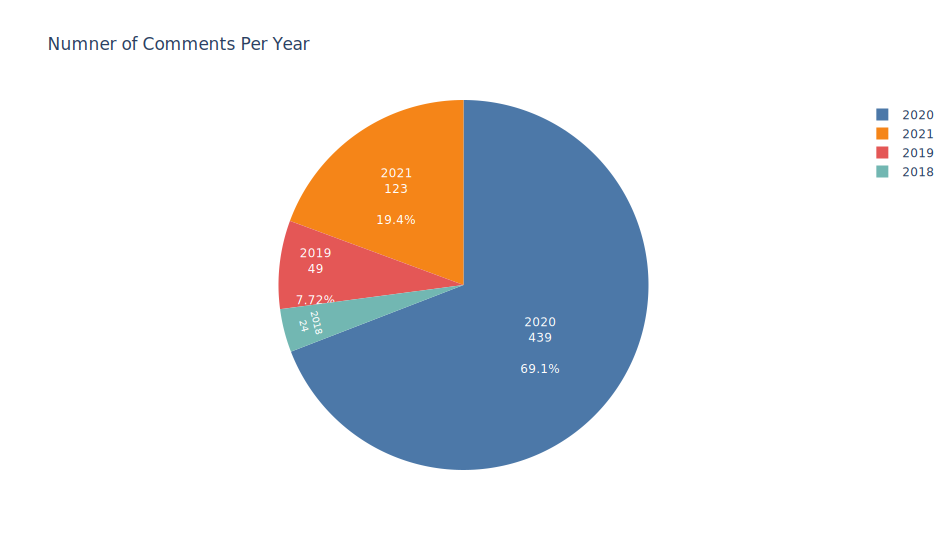

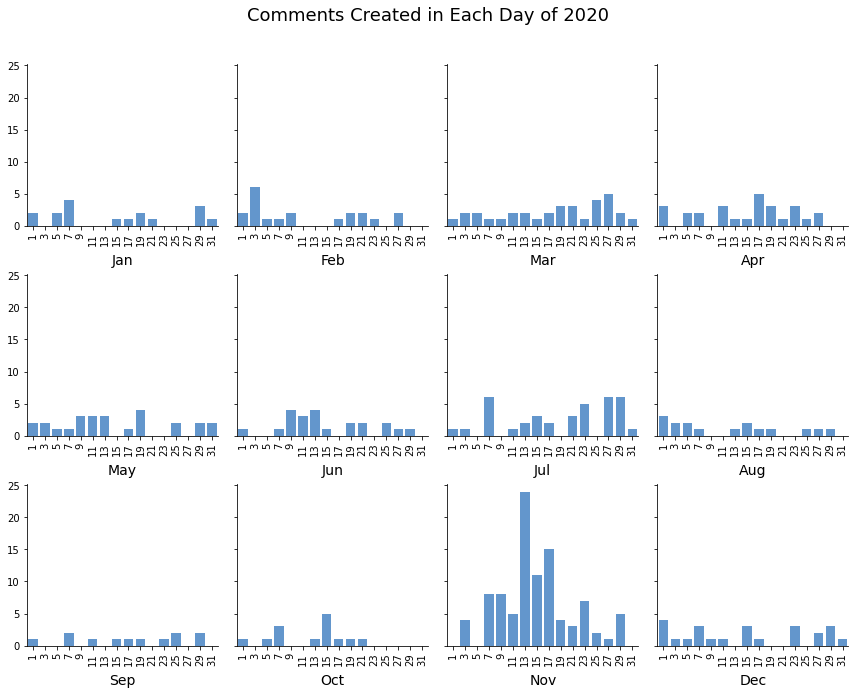

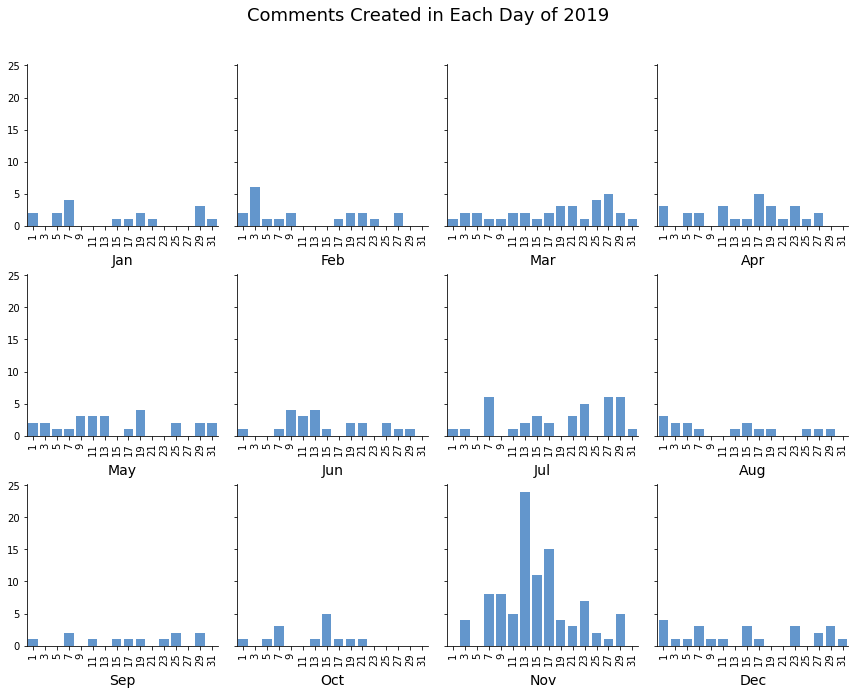

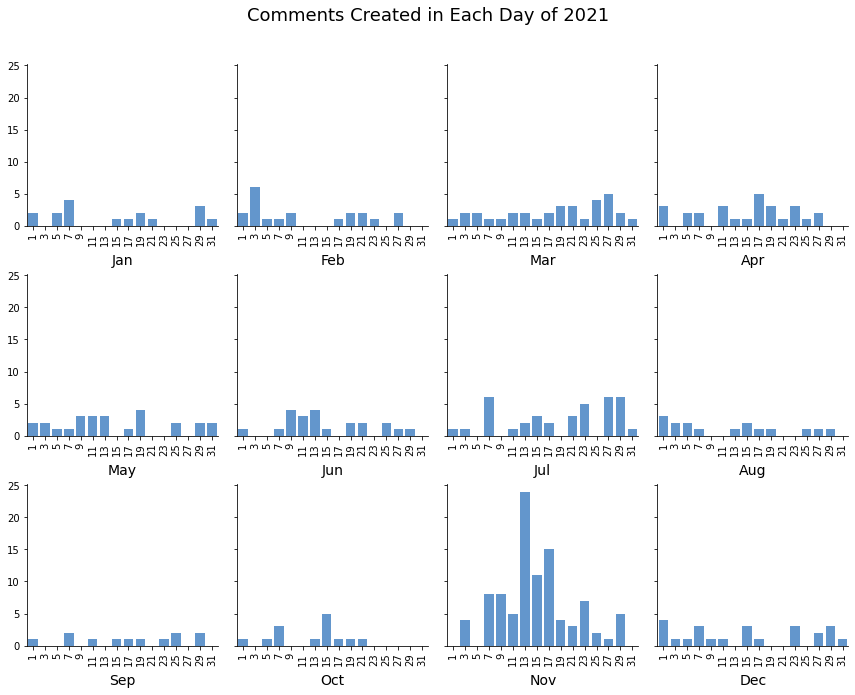

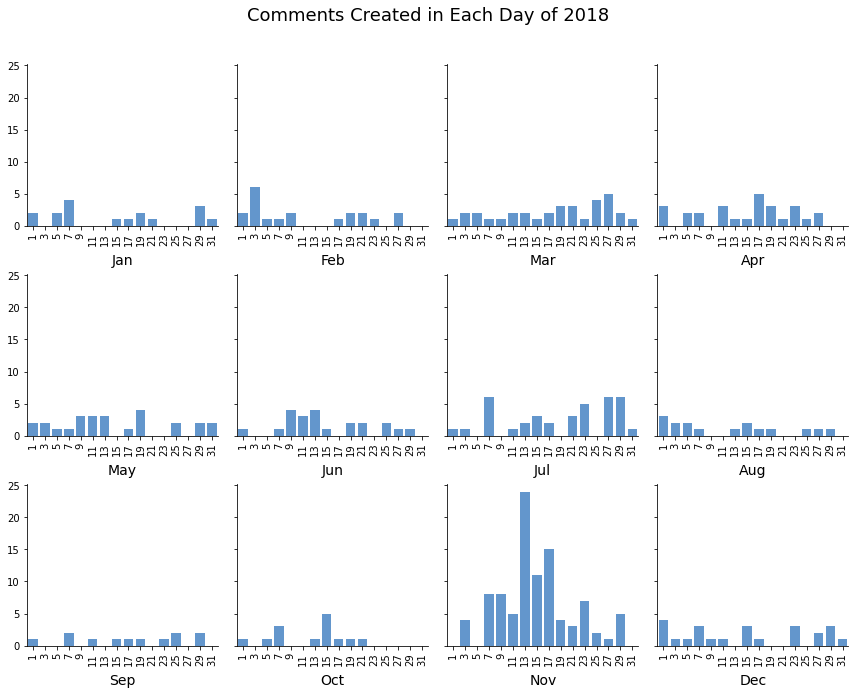

In [167]:
bc.date_info()

In [168]:
bc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
1229089,bitch,2019-03-08 17:26:20,18026222842118680,0.0,0.0,1985099304046877440,n,5939912790,fan_page_johnny_depp_,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:16,0.0,0.0,0.0
501768,bitch,2019-03-08 17:26:37,17977972660210946,0.0,1.0,1985668774775715584,n,5939912790,fan_page_johnny_depp_,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:17,0.0,0.0,0.0
522123,she is very bitch 🖓🖓🖓🖓🖓💩💩💩💩,2020-04-08 01:34:53,17852283517952664,0.0,0.0,2282245534171745536,n,17436168751,troll.juve,False,...,she is very bitch,{'bitch'},"{'neg': 0.577, 'neu': 0.423, 'pos': 0.0, 'comp...",0.577,0.423,0.0,0 days 00:00:15,0.0,0.0,0.0
487558,bitch,2020-05-16 03:22:55,17865379399808328,0.0,0.0,2309988291977200128,n,6888785154,adamelsharkawy_bigz,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:39,0.0,0.0,0.0
651021,bitch,2020-08-06 20:14:50,17890045375612116,0.0,0.0,2367574519165341696,n,16846227655,lazy.star.arts,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:08,0.0,0.0,0.0
1137802,she’s a bitch,2020-11-08 21:39:57,17872490417046656,0.0,0.0,2437740775658571776,n,8450281000,kiranstauch,False,...,she’s a bitch,{'bitch'},"{'neg': 0.792, 'neu': 0.208, 'pos': 0.0, 'comp...",0.792,0.208,0.0,0 days 00:00:32,0.0,0.0,0.0
330085,bitch,2020-11-10 17:34:48,17877023923958774,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:03,0.0,0.0,0.0
330086,bitch,2020-11-10 17:34:49,17914249486492694,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:01,0.0,0.0,0.0
330087,bitch,2020-11-10 17:34:51,17868838523068712,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:02,0.0,0.0,0.0
330088,bitch,2020-11-10 17:34:53,18016508680288180,0.0,0.0,2437721879497038336,n,2926711002,florachirico,False,...,bitch,{'bitch'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:02,0.0,0.0,0.0


In [169]:
len(bc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

9

In [170]:
bc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

florachirico             8
fan_page_johnny_depp_    2
mattnash8506             1
troll.juve               1
hamidreza66_.rezapoor    1
adamelsharkawy_bigz      1
kiranstauch              1
kudzmaboss               1
lazy.star.arts           1
Name: username, dtype: int64

In [171]:
bc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-10    8
2019-03-08    2
2020-11-13    1
2020-08-06    1
2020-11-14    1
2021-01-06    1
2020-11-08    1
2020-04-08    1
2020-05-16    1
Name: date, dtype: int64

In [172]:
list(bc.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['florachirico',
 'fan_page_johnny_depp_',
 'mattnash8506',
 'troll.juve',
 'hamidreza66_.rezapoor',
 'adamelsharkawy_bigz',
 'kiranstauch',
 'kudzmaboss',
 'lazy.star.arts']

<a id='abuser'></a>
### abuser
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [173]:
ab = SameText(df_comments, "{'abuser'}")

In [174]:
ab.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
449,abuser,2020-06-02 03:33:14,17855522417019074,0.0,0.0,2314639163877400576,n,33874114164,rashidrazarr,False,...,Jun,2,2020-06-02,3,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0
634,abuser,2021-01-20 00:04:36,17927162719491116,0.0,0.0,2489954445721169408,n,479691086,theashwindsor,False,...,Jan,20,2021-01-20,0,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0


In [175]:
ab.n_commnets_unique()

This comment appeared in 202 shape


In [176]:
ab.shapes(15)

abuser              346
she is an abuser     21
she’s an abuser      20
abuser.              20
#abuser              15
she's an abuser      12
abuser 🤮              7
she’s an abuser.      6
abuser 👎🏿             6
abuser💕               6
abuser!               6
the abuser            5
abuser 🤢              4
an abuser             4
she is a abuser       4
Name: message, dtype: int64

In [177]:
ab.dates()

2020-11-12    18
2020-11-11    14
2020-02-20    13
2020-02-09    11
2020-11-15     9
              ..
2019-05-09     1
2019-04-11     1
2020-02-29     1
2020-02-25     1
2019-03-17     1
Name: date, Length: 326, dtype: int64

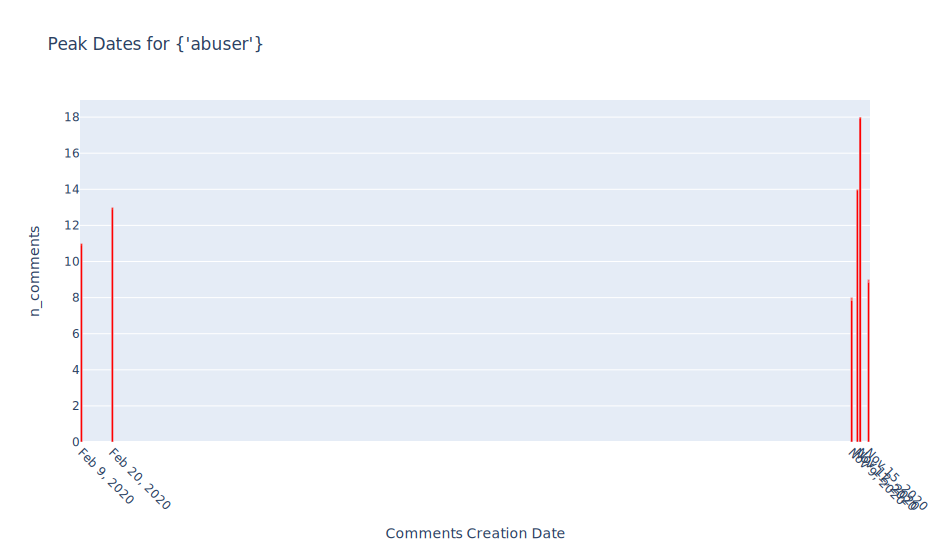

In [178]:
ab.peak(6)

The commentes were made between 2018-08-01 and  2021-08-27
      n_comments
year            
2018           4
2019          39
2020         469
2021         179


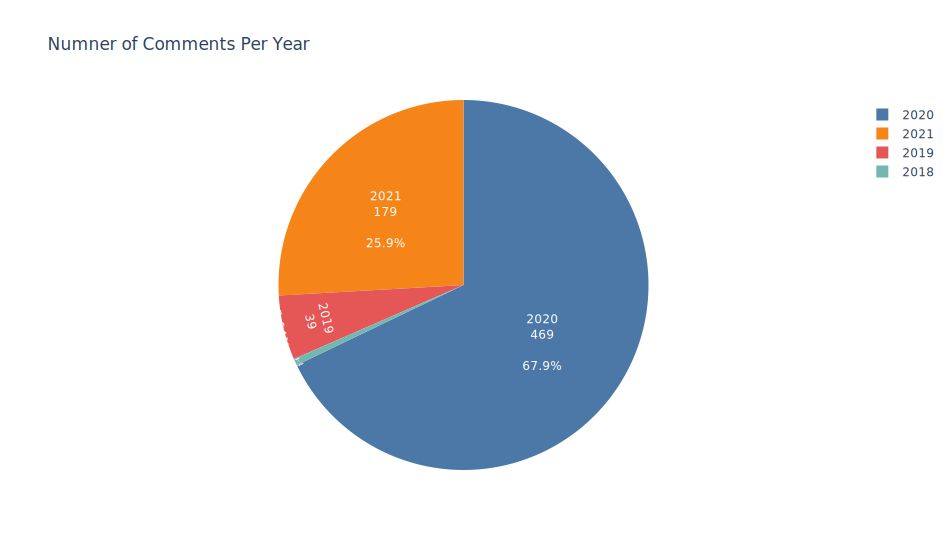

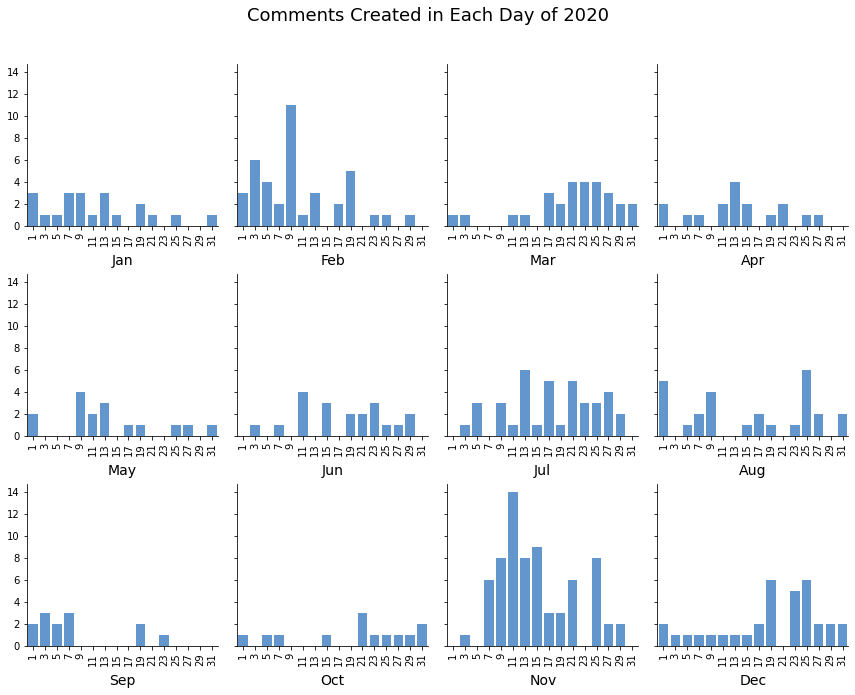

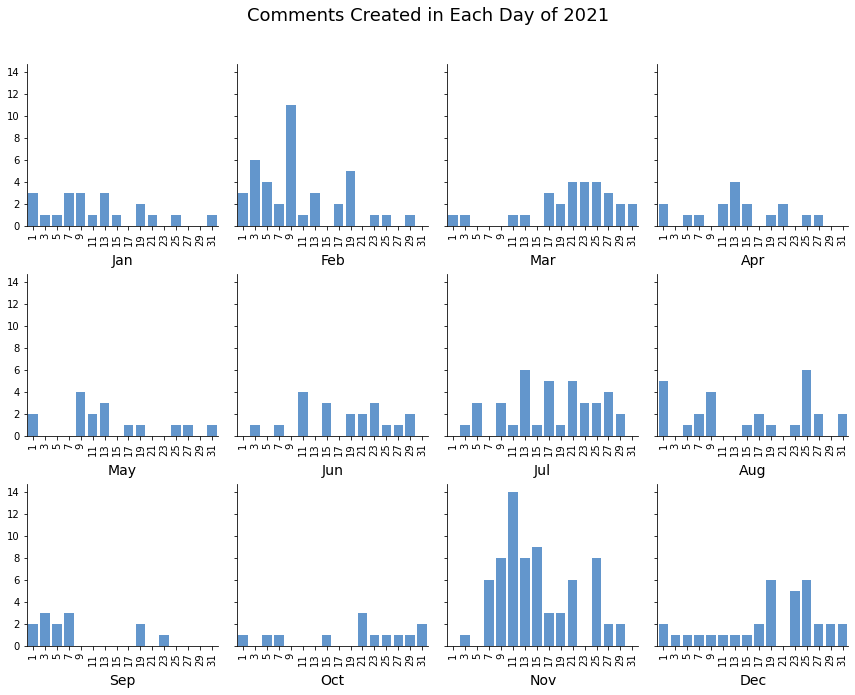

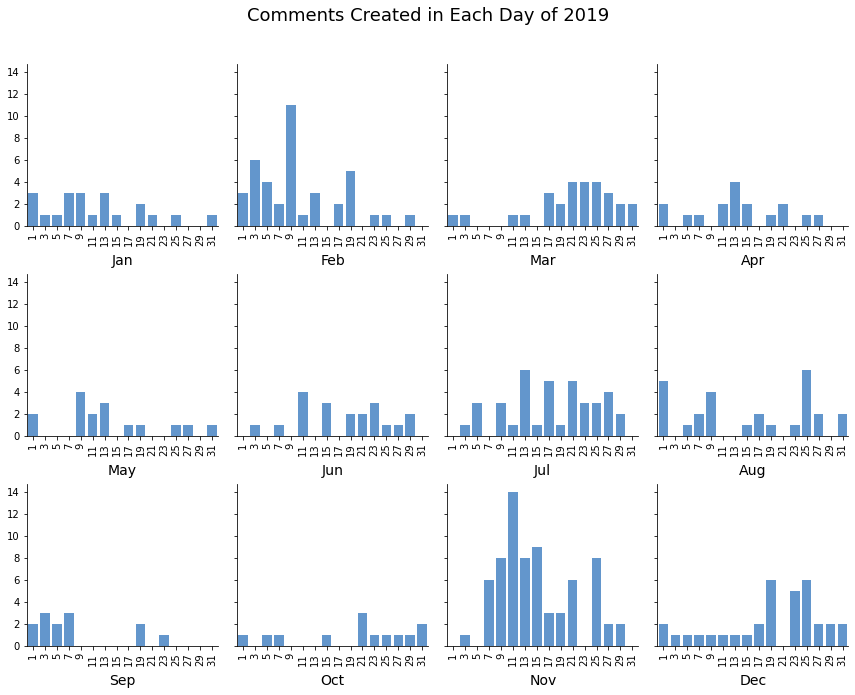

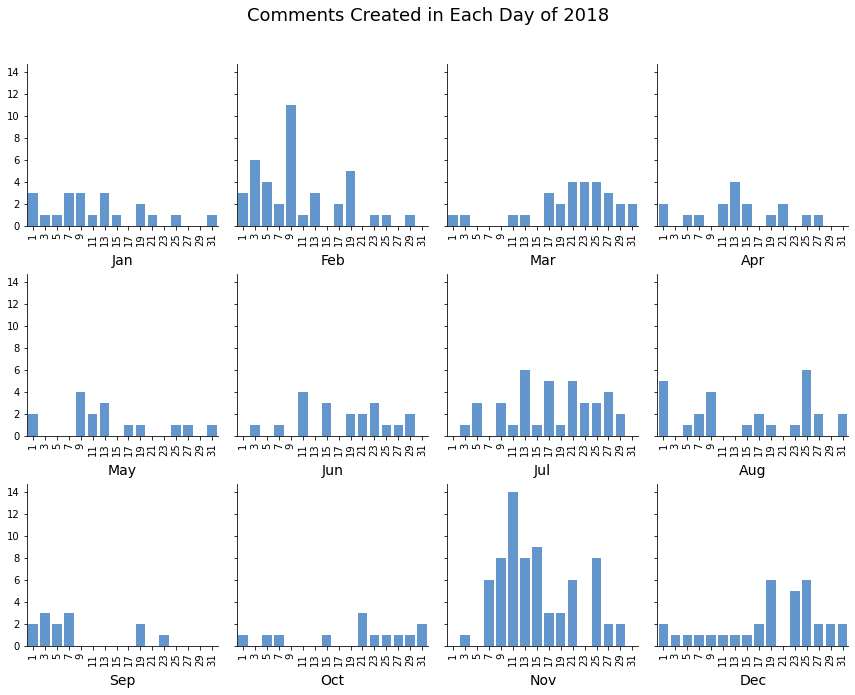

In [179]:
ab.date_info()

In [180]:
ab.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
961414,@ya_itsbianca she’s an abuser,2019-11-10 02:09:35,17882053750444878,NaN,2.0,2172733325314526464,18042982330202736,5638405846,jov4lyfe,True,...,@ya_itsbianca she’s an abuser,{'abuser'},"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",0.545,0.455,0.0,0 days 00:00:28,0.0,0.0,0.0
961399,@roman_reigns4234 she’s an abuser,2019-11-10 02:10:58,17853600715645996,NaN,2.0,2172733325314526464,18080094295189332,5638405846,jov4lyfe,True,...,@roman_reigns4234 she’s an abuser,{'abuser'},"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",0.545,0.455,0.0,0 days 00:00:05,0.0,0.0,0.0
961339,@peppered__ she’s an abuser,2019-11-10 02:11:24,17849732134710176,NaN,0.0,2172733325314526464,18080785786142088,5638405846,jov4lyfe,True,...,@peppered__ she’s an abuser,{'abuser'},"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...",0.545,0.455,0.0,0 days 00:00:26,0.0,0.0,0.0
1219184,#abuser,2020-02-02 09:03:38,17870008615589434,0.0,1.0,2234783109899626752,n,10450781962,gravesveraniego,False,...,#abuser,{'abuser'},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0,0 days 00:00:04,0.0,0.0,0.0
107195,abuser,2020-02-06 10:41:05,17844359917945592,0.0,0.0,2237716588123688704,n,4137159689,gentlyhands,False,...,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:02,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76576,abuser 👎🏿,2021-06-10 21:11:23,17877183389399918,0.0,0.0,2581080313982604288,n,47047202725,marymagdalene_27,False,...,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:37,0.0,0.0,0.0
298765,abuser 👎🏿,2021-06-10 21:11:36,17910745402863866,0.0,0.0,2581236137986890752,n,47047202725,marymagdalene_27,False,...,abuser,{'abuser'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0,0 days 00:00:13,0.0,0.0,0.0
139561,abuser 🙅🏽‍♀️,2021-06-11 23:30:24,17901408518000848,0.0,0.0,2593008441506973696,n,47047202725,marymagdalene_27,False,...,abuser ‍♀,{'abuser'},"{'neg': 0.783, 'neu': 0.217, 'pos': 0.0, 'comp...",0.783,0.217,0.0,0 days 00:00:27,0.0,0.0,0.0
1254521,she’s an abuser.,2021-07-21 00:30:02,17935419472570474,0.0,2.0,2622202537958978560,n,47897666763,jem.weaver,False,...,she’s an abuser.,{'abuser'},"{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp...",0.643,0.357,0.0,0 days 00:00:34,0.0,0.0,0.0


In [181]:
len(ab.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

34

In [182]:
ab.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

arielapisces                10
lisa_lavaleebaby             6
marymagdalene_27             5
nerheeiram                   3
jov4lyfe                     3
andre_skywalker2005          3
jared_m716                   2
gentlyhands                  2
skseeha                      2
reid.wilks                   2
bby.rona                     2
liloandstitches_             2
beancat42                    2
mvgkg._                      1
shifftychameleon             1
jklockk                      1
jem.weaver                   1
want.it.now.clothing         1
obeymichyydollie             1
amndme                       1
multi.fandoom.aesthetics     1
conor_longley_               1
catartresse                  1
babygirltashx                1
jdjazmin12                   1
timv777                      1
mxhaliaa                     1
lina.pulatova                1
macthamenace                 1
gravesveraniego              1
georgebouaoun                1
marie_kennedyxx              1
archknig

In [183]:
ab.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-02-20    10
2020-11-12     8
2021-06-10     4
2020-11-13     3
2020-12-10     3
2019-11-10     3
2020-11-11     3
2021-01-12     2
2020-12-25     2
2020-12-14     2
2020-09-07     2
2020-03-04     2
2020-02-06     2
2020-02-14     1
2021-01-09     1
2020-11-10     1
2020-02-09     1
2020-11-21     1
2020-08-09     1
2021-06-11     1
2020-11-15     1
2020-09-19     1
2020-08-25     1
2021-07-26     1
2020-11-28     1
2020-11-29     1
2020-02-02     1
2021-01-20     1
2020-12-23     1
2020-11-20     1
2021-01-01     1
2021-07-21     1
Name: date, dtype: int64

In [184]:
list(ab.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['arielapisces',
 'lisa_lavaleebaby',
 'marymagdalene_27',
 'nerheeiram',
 'jov4lyfe',
 'andre_skywalker2005',
 'jared_m716',
 'gentlyhands',
 'skseeha',
 'reid.wilks',
 'bby.rona',
 'liloandstitches_',
 'beancat42',
 'mvgkg._',
 'shifftychameleon',
 'jklockk',
 'jem.weaver',
 'want.it.now.clothing',
 'obeymichyydollie',
 'amndme',
 'multi.fandoom.aesthetics',
 'conor_longley_',
 'catartresse',
 'babygirltashx',
 'jdjazmin12',
 'timv777',
 'mxhaliaa',
 'lina.pulatova',
 'macthamenace',
 'gravesveraniego',
 'georgebouaoun',
 'marie_kennedyxx',
 'archknightt',
 'afh.zl']

<a id='wtf'></a>
### wtf
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [185]:
w = SameText(df_comments, "{'wtf'}")

In [186]:
w.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
9183,😑😑😑😑😑wtf???????,2021-05-09 19:31:53,17908488682836946,0.0,0.0,2563367255981664256,n,7498992576,nafis_shj,False,...,May,9,2021-05-09,19,wtf???????,{'wtf'},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.0
12589,@momod.134 wtf??,2021-07-20 22:53:04,17894931428232308,NaN,0.0,2620379275249191936,17893982873221364,48504197208,ldaking007,True,...,Jul,20,2021-07-20,22,@momod.134 wtf??,{'wtf'},"{'neg': 0.806, 'neu': 0.194, 'pos': 0.0, 'comp...",0.806,0.194,0.0


In [187]:
w.n_commnets_unique()

This comment appeared in 225 shape


In [188]:
w.shapes(15)

wtf             217
wtf?             18
wtf no            6
wtf!              5
wtf😂              5
wtf is this       5
wtf????           4
wtf 😂             4
no wtf            4
wtf...            4
wtf is that?      3
yo wtf            3
wtf?????          3
wtf!!             3
wtf 😐             2
Name: message, dtype: int64

In [189]:
w.dates()

2020-11-02    12
2020-12-26     9
2020-11-14     8
2021-07-02     8
2020-11-13     7
              ..
2021-01-08     1
2019-10-24     1
2019-04-16     1
2018-11-15     1
2020-12-29     1
Name: date, Length: 327, dtype: int64

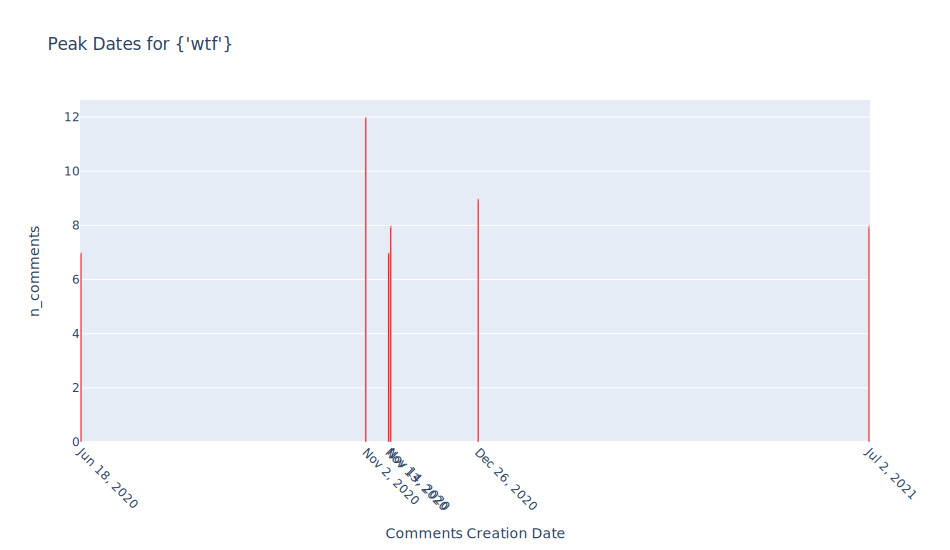

In [190]:
w.peak(6)

The commentes were made between 2018-03-15 and  2021-08-19
      n_comments
year            
2018          66
2019          97
2020         250
2021         102


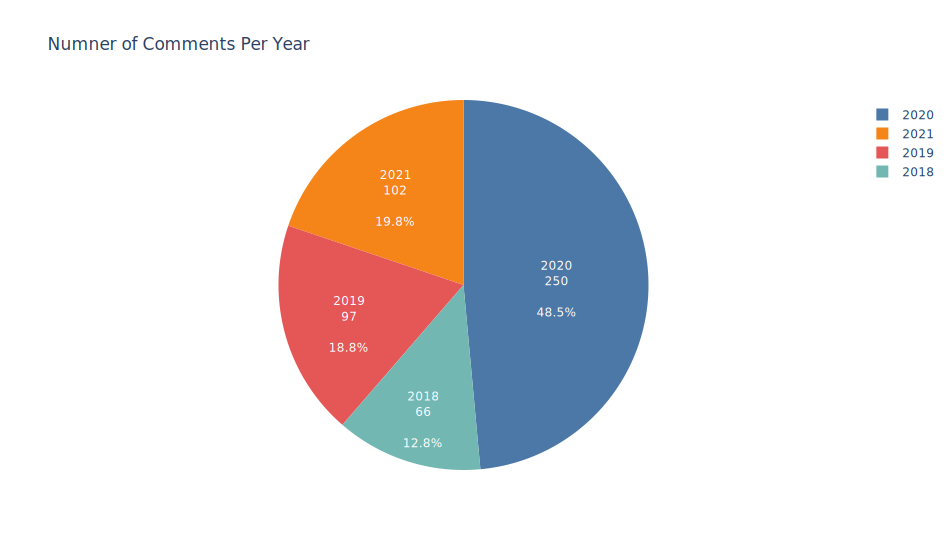

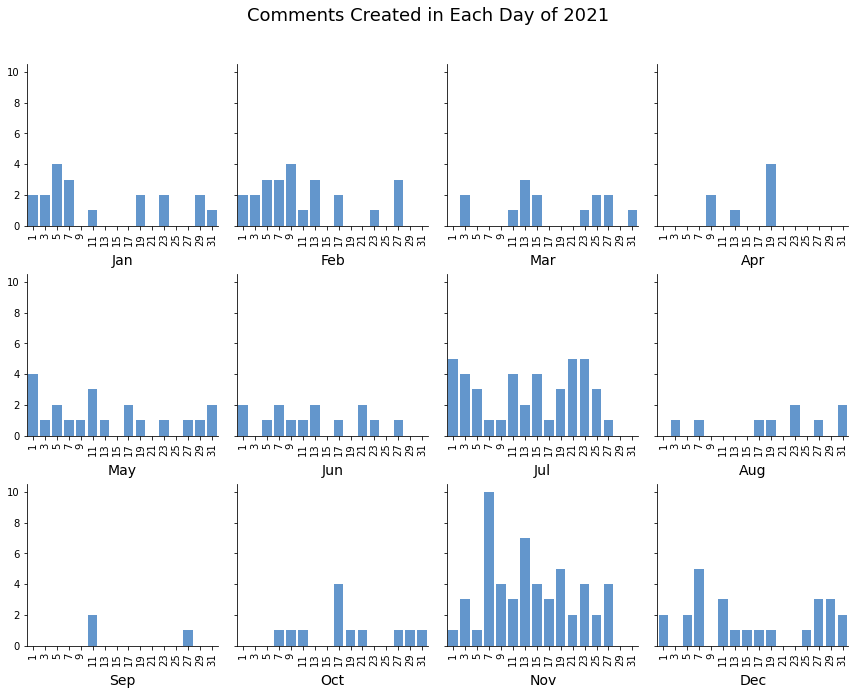

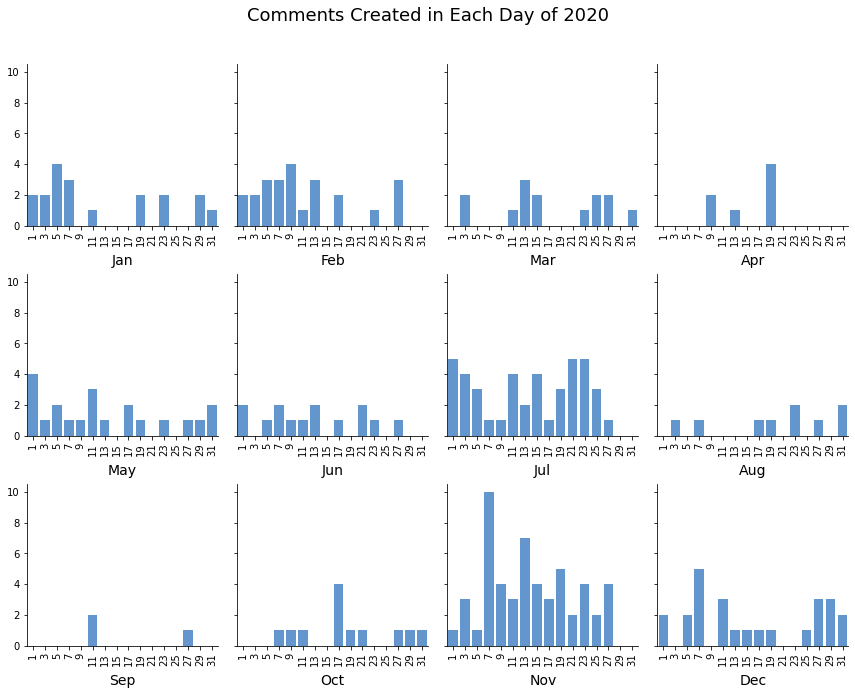

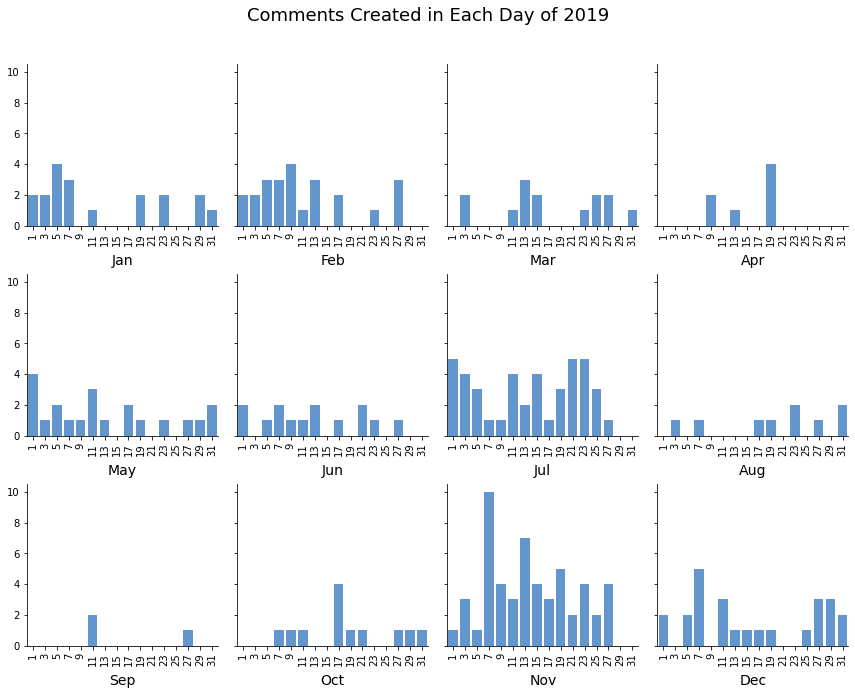

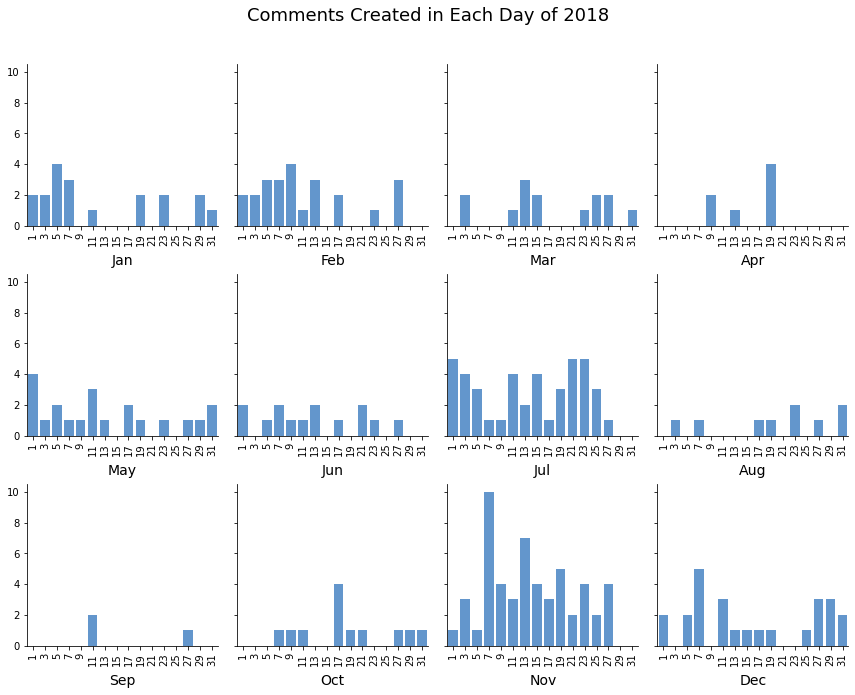

In [191]:
w.date_info()

In [192]:
w.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
787956,wtf no no,2019-06-16 21:52:46,18033707893168544,0.0,0.0,2067454555286460928,n,8089936216,matty_ice_508_00,False,...,wtf no no,{'wtf'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:05,0.0,0.0,0.0
77565,wtf,2020-06-18 20:25:00,17842501544257908,0.0,0.0,2333807462626791424,n,316297308,elenalorentelpz,False,...,wtf,{'wtf'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:10,0.0,0.0,0.0
525957,wtf,2020-11-13 05:49:05,17886452545826744,0.0,0.0,2441135219233616384,n,6323565155,sainivarun712,False,...,wtf,{'wtf'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:06,0.0,0.0,0.0
856421,@lol.but.did.i.ask *wtf*,2020-12-07 22:46:43,17935694743431576,NaN,0.0,2459142448661064704,18137593753122304,10801897026,watchdog172,True,...,@lol.but.did.i.ask *wtf*,{'wtf'},"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0 days 00:00:36,0.0,0.0,0.0
410252,😂wtf??,2020-12-18 09:54:19,18041712997284576,0.0,6.0,2465971400333239808,n,28909281479,zrw_.1,False,...,wtf??,{'wtf'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:59,0.0,0.0,0.0


In [193]:
len(w.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

5

In [194]:
w.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

elenalorentelpz     1
sainivarun712       1
matty_ice_508_00    1
watchdog172         1
zrw_.1              1
Name: username, dtype: int64

In [195]:
w.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-11-13    1
2020-06-18    1
2020-12-18    1
2019-06-16    1
2020-12-07    1
Name: date, dtype: int64

In [196]:
list(w.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['elenalorentelpz',
 'sainivarun712',
 'matty_ice_508_00',
 'watchdog172',
 'zrw_.1']

<a id='disgusting'></a>
### disgusting
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [197]:
disgusting = SameText(df_comments, "{'disgusting'}")

In [198]:
disgusting.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
5695,so disgusting 😞,2020-07-23 10:58:05,18030023413272760,0.0,0.0,2359499954300361728,n,3256736758,jamie.chaney,False,...,Jul,23,2020-07-23,10,so disgusting,{'disgusting'},"{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'comp...",0.787,0.213,0.0
9864,disgusting,2020-11-20 10:34:40,17907201775545868,0.0,3.0,2446384521006547968,n,8482654567,owen.hawk,False,...,Nov,20,2020-11-20,10,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0


In [199]:
w.n_commnets_unique()

This comment appeared in 225 shape


In [200]:
disgusting.shapes(15)

disgusting              131
disgusting.              11
she is disgusting        11
she's disgusting          8
she’s disgusting          8
disgusting 🤮              6
this is disgusting        4
that’s disgusting         3
she’s disgusting.         2
she is so disgusting      2
she's disgusting.         2
so disgusting             2
disgusting!               2
disgusting 🤢              2
she is disgusting.        1
Name: message, dtype: int64

In [201]:
disgusting.dates()

2020-11-15    5
2020-11-07    5
2020-11-12    5
2020-07-16    5
2021-06-15    4
             ..
2019-04-19    1
2020-07-13    1
2019-12-15    1
2021-06-05    1
2020-09-15    1
Name: date, Length: 169, dtype: int64

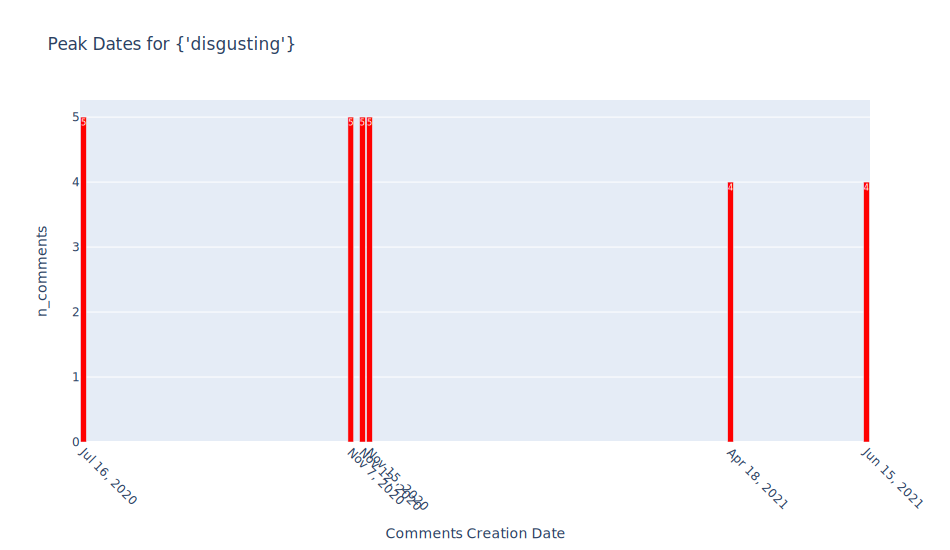

In [202]:
disgusting.peak(6)

The commentes were made between 2018-04-12 and  2021-08-05
      n_comments
year            
2018           6
2019          18
2020         160
2021          67


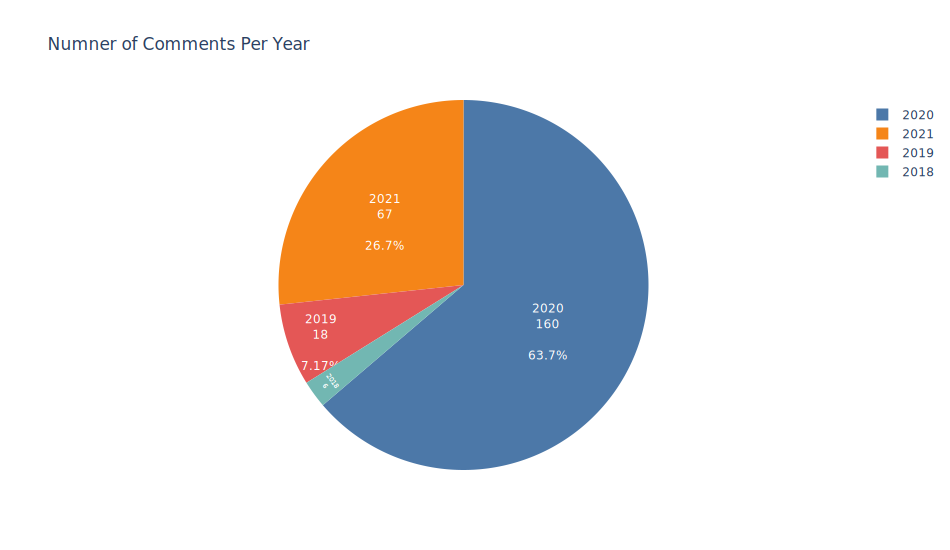

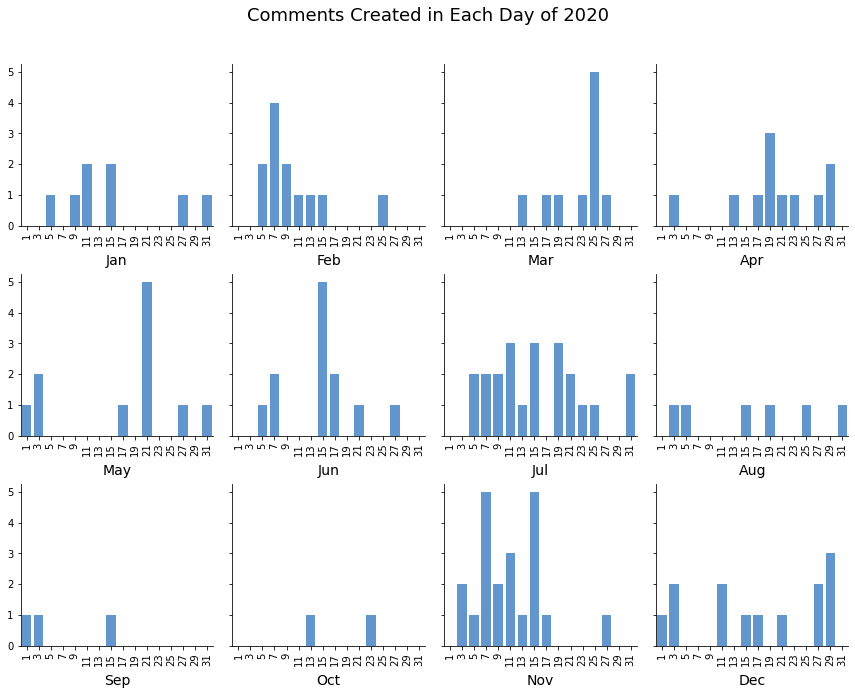

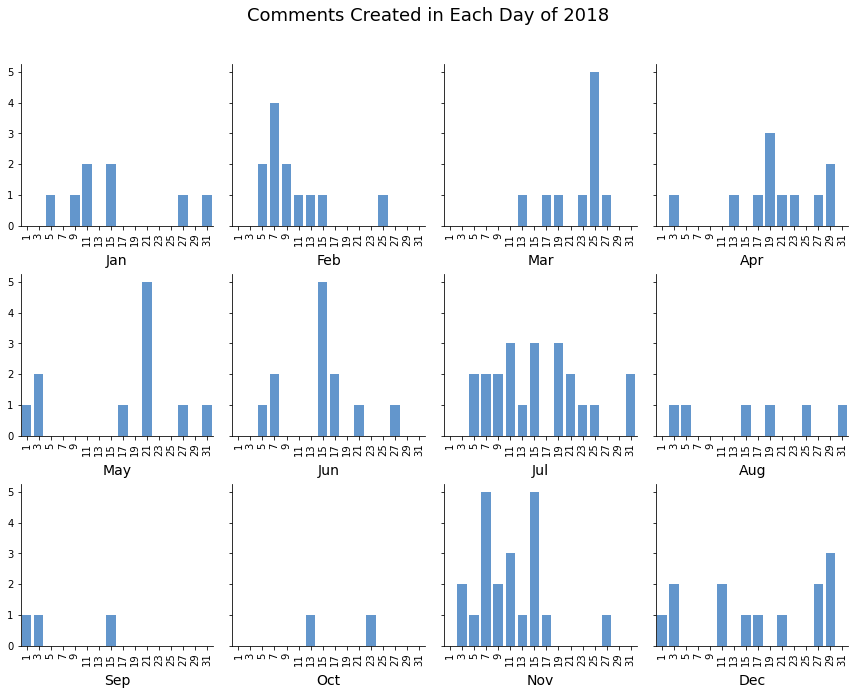

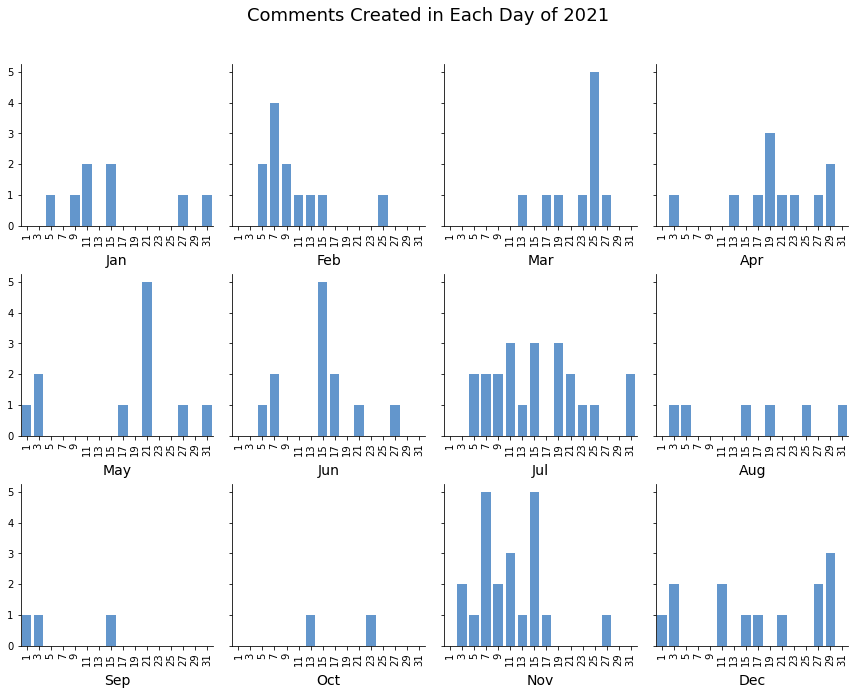

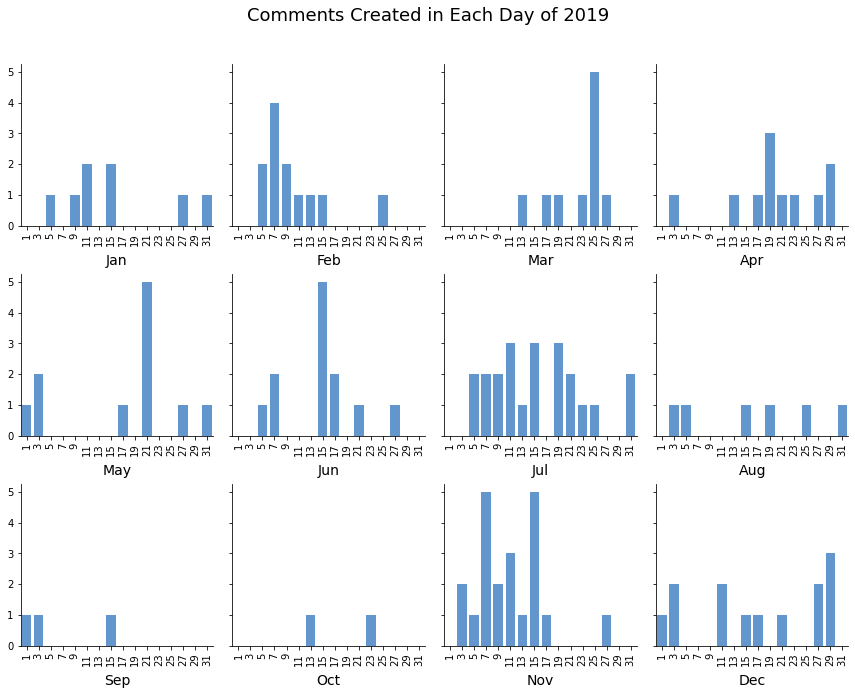

In [203]:
disgusting.date_info()

In [204]:
disgusting.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
45928,disgusting,2020-07-16 17:30:41,17858255723064062,0.0,0.0,2354445349753355776,n,501744657,annie.b3lle,False,...,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:24,0.0,0.0,0.0
1096881,disgusting,2020-07-16 17:30:54,17930183908392214,0.0,0.0,2354612260277358080,n,501744657,annie.b3lle,False,...,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:13,0.0,0.0,0.0
158065,disgusting,2020-12-03 10:10:23,17866785524177736,0.0,0.0,2448943921932178432,n,1223342623,jaeger907,False,...,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:13,0.0,0.0,0.0
778500,disgusting,2020-12-28 21:01:41,17905130587627670,0.0,1.0,2473503516281042432,n,1638349043,gamma_ipnosis,False,...,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:08,0.0,0.0,0.0
531523,disgusting,2021-04-18 00:46:49,17999809900323096,0.0,16.0,2554156424582472192,n,32329526842,gagaciccone,False,...,disgusting,{'disgusting'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:26,0.0,0.0,0.0


In [205]:
len(disgusting.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

4

In [206]:
disgusting.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

annie.b3lle      2
jaeger907        1
gagaciccone      1
gamma_ipnosis    1
Name: username, dtype: int64

In [207]:
disgusting.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-07-16    2
2020-12-03    1
2020-12-28    1
2021-04-18    1
Name: date, dtype: int64

In [208]:
list(disgusting.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['annie.b3lle', 'jaeger907', 'gagaciccone', 'gamma_ipnosis']

<a id='hell'></a>
### hell
<ul>
<li><a href="#fuck">f*ck</a></li>
<li><a href="#damn">damn</a></li>
<li><a href="#bitch">b*tch</a></li>
<li><a href="#abuser">abuser</a></li>
<li><a href="#wtf">wtf</a></li>
<li><a href="#disgusting">disgusting</a></li>
<li><a href="#hell">hell</a></li>
</ul>

In [210]:
hell = SameText(df_comments, "{'hell'}")

In [211]:
hell.head(2)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,month,dayofmonth,date,hour,clean_text,tokens,nltk,neg,neu,pos
22556,hell no!,2020-06-03 06:57:24,17882259223615316,0.0,0.0,2319465984035038208,n,321431179,fernandocallo,False,...,Jun,3,2020-06-03,6,hell no!,{'hell'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.000,0.000,0.0
22594,@ale_x305 hell no,2020-06-05 01:11:26,17848255790143876,NaN,1.0,2319465984035038208,17898360916501316,4133854014,monkey790,True,...,Jun,5,2020-06-05,1,@ale_x305 hell no,{'hell'},"{'neg': 0.872, 'neu': 0.128, 'pos': 0.0, 'comp...",0.872,0.128,0.0


In [212]:
hell.n_commnets_unique()

This comment appeared in 119 shape


In [213]:
hell.shapes(15)

hell no              74
hell nah             10
what the hell         6
hell ya               5
hell no!              4
what the hell?        4
hell no.              3
hell no 😡😡😡           3
hell no 😮             2
from hell             2
what the hell????     2
hell na               2
what the hell...      2
hell no 😡😡🤬🤬          1
hell to the no        1
Name: message, dtype: int64

In [214]:
hell.dates()

2020-11-22    14
2018-03-14    11
2020-11-14     6
2020-12-22     6
2020-11-13     5
              ..
2021-04-01     1
2018-07-29     1
2020-02-04     1
2020-11-26     1
2020-04-26     1
Name: date, Length: 160, dtype: int64

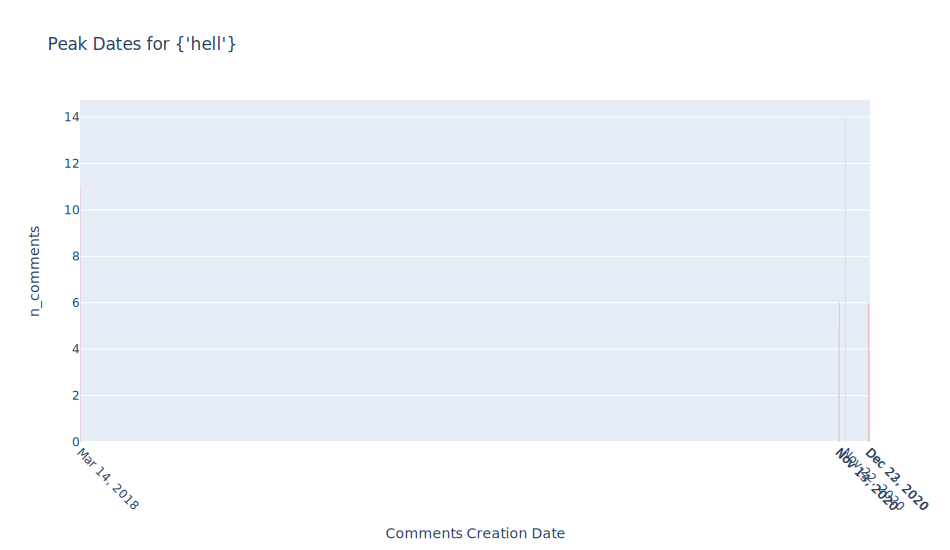

In [215]:
hell.peak(6)

The commentes were made between 2018-03-14 and  2021-07-18
      n_comments
year            
2018          52
2019          27
2020         124
2021          22


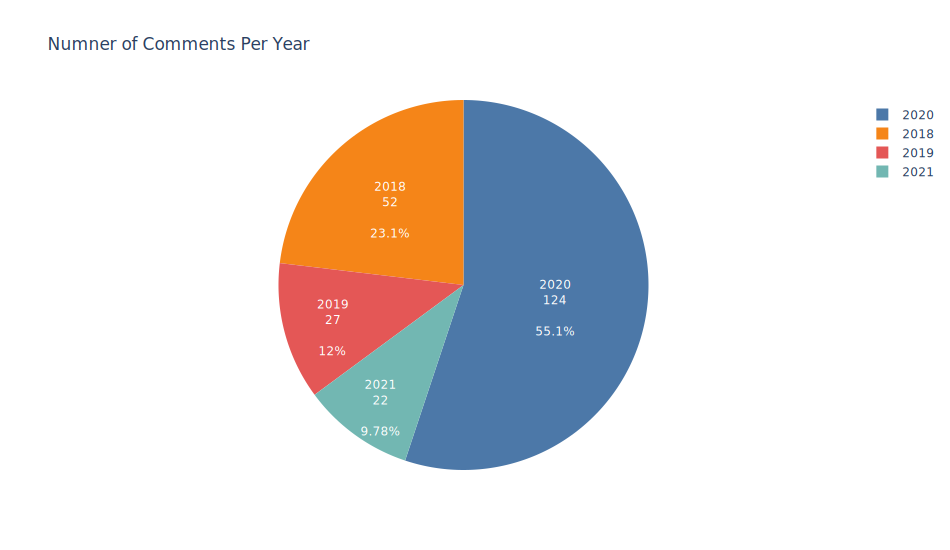

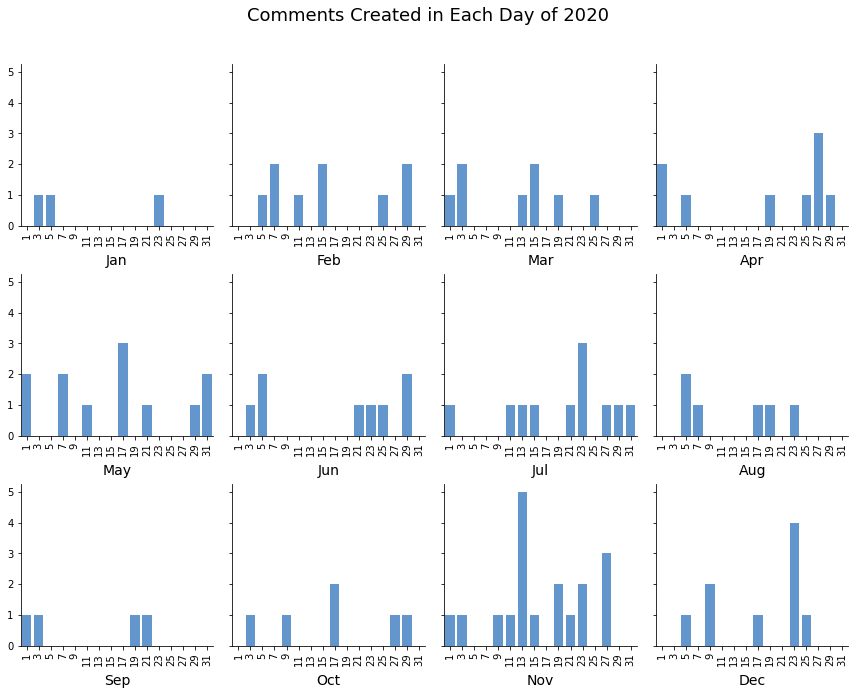

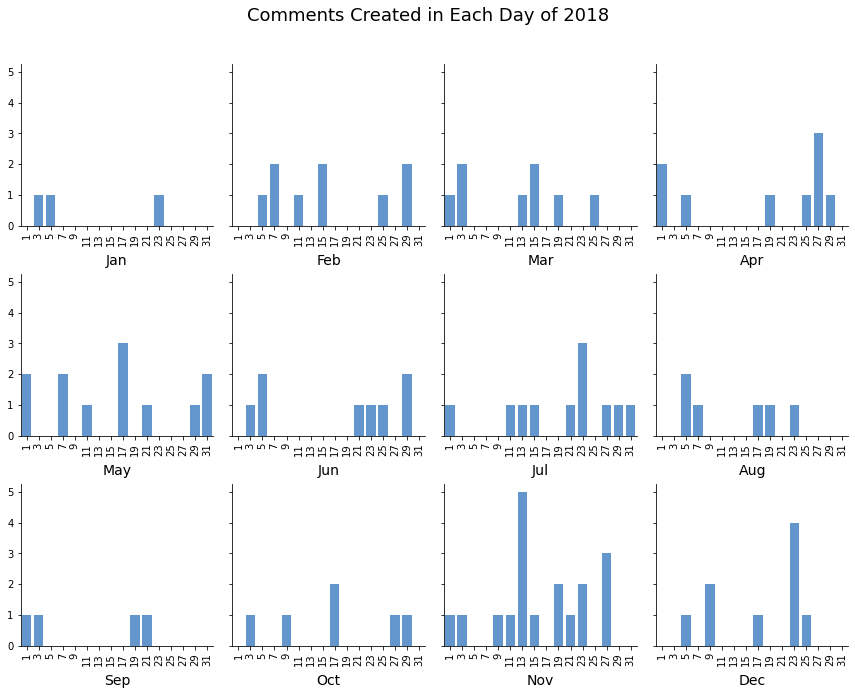

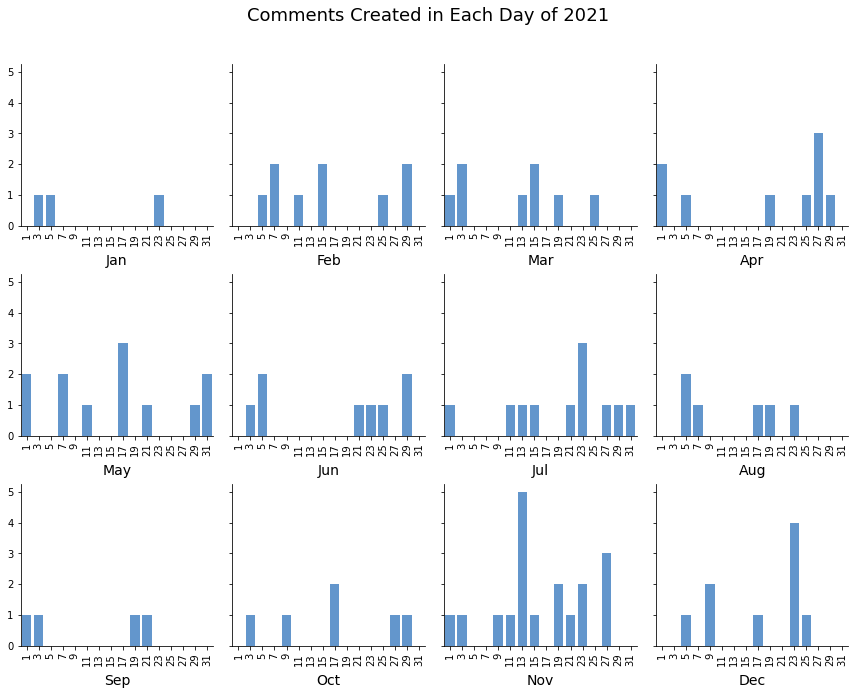

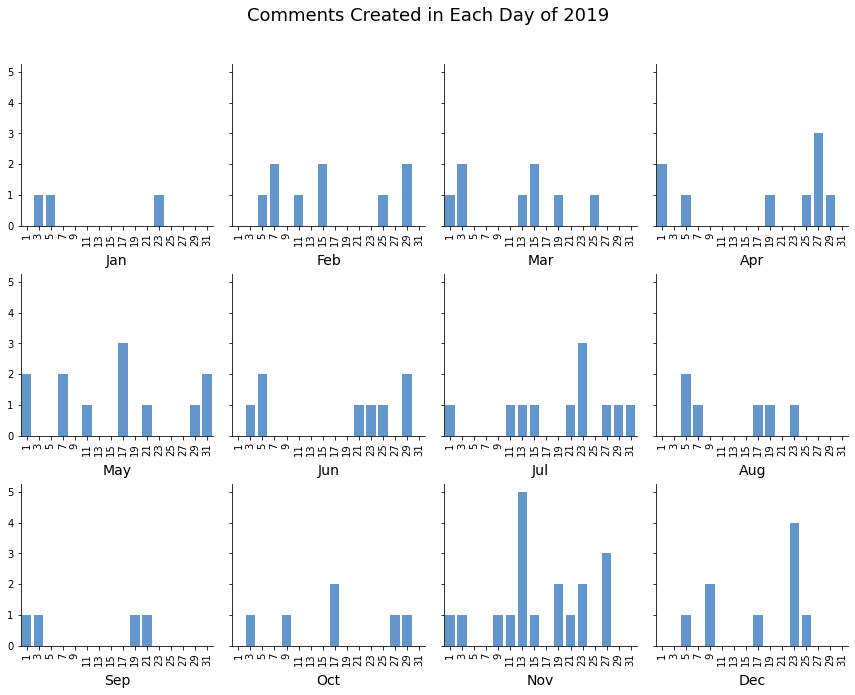

In [216]:
hell.date_info()

In [217]:
hell.df_timing().query(' days == 0  and  hours == 0  and minutes == 0')

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,...,clean_text,tokens,nltk,neg,neu,pos,diff,days,hours,minutes
786257,hell no,2020-02-29 19:11:04,17846684485970828,0.0,0.0,2253645276383040000,n,10140121962,cameron_aka_cj,False,...,hell no,{'hell'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:31,0.0,0.0,0.0
736266,hell no 😮,2020-04-02 10:39:54,17875148863599312,0.0,5.0,2277897900535355648,n,2306171211,sasan_izadi_,False,...,hell no,{'hell'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:30,0.0,0.0,0.0
1112045,hell no,2020-12-22 16:47:19,18049621222276764,0.0,1.0,2469437270010088448,n,502529948,_kierandonnelly_,False,...,hell no,{'hell'},"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",1.0,0.0,0.0,0 days 00:00:49,0.0,0.0,0.0


In [218]:
len(hell.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

3

In [219]:
hell.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts()

sasan_izadi_        1
cameron_aka_cj      1
_kierandonnelly_    1
Name: username, dtype: int64

In [220]:
hell.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').date.value_counts()

2020-04-02    1
2020-02-29    1
2020-12-22    1
Name: date, dtype: int64

In [221]:
list(hell.df_timing().query(' days == 0  and  hours == 0  and minutes == 0').username.value_counts().index)

['sasan_izadi_', 'cameron_aka_cj', '_kierandonnelly_']